# Separate classes are treated separately but higher rho is allowed

Schools that have one class or classes cannot be separated are included here. 

Extended, more dense results. New way of finding QS state. This way if a simmulation goes into paradise it may still be useful. 

Even more dense results. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import lines
import pandas as pd
import scipy.special
from pathlib import Path
from statsmodels.graphics.tsaplots import plot_acf
import os

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

from analyze_simulations_funs import *

In [2]:
# outputs_dir = Path("../../outputs/LtdReal/outputs/bitcoin-alpha-rhoinits-triads-reps/")
outputs_dir = Path("../../outputs/LtdReal/outputs/spanish-highschools-classes-controldown-processed")
outputs_dir_single = Path("../../outputs/LtdReal/outputs/spanish-highschools-controldown-processed")
# outputs_dir_classes = Path("../../outputs/LtdReal/outputs/spanish-highschools-classes")
# outputs_dir_single = Path("../../outputs/LtdReal/outputs/bitcoin-alpha-rhoinits-triads/")

specific_schools = ["t11_10", "t11_9", "t11_8", "t11_7", "t11_6", "t11_5", "t11_4", "t11_3", "t11_2", "t11_1", "t1", "t2", "t6"]

# Checking simulations

In [3]:
# paths = []
# datanames = []

# for school in specific_schools:
#     i = 1
#     # added = False
#     while True:
#         filename = "df_rho_" + school + "_" + str(i) + ".h5"
#         if os.path.exists(outputs_dir.joinpath(filename)):
#             paths.append(outputs_dir.joinpath(filename))
#             datanames.append(school + "_" + str(i))
#             added = True
#             i += 1
#         else:
#             break
#     # if not added:
#     #     filename = "df_rho_" + school + ".h5"
#     #     paths.append(outputs_dir.joinpath(filename))
#     #     datanames.append(school)

# # paths = [outputs_dir.joinpath("df_rho_" + school + ".h5") for school in specific_schools]

# df_rhos = [pd.read_hdf(path, key = "df_rho") for path in paths]
# df_files_all = [pd.read_hdf(path, key = "df_files") for path in paths]

# print([len(df_rho.index) for df_rho in df_rhos])
# df_rhos[0].head(5)
    

# Read real data

In [4]:
# realnet_path = Path('../../../triad-statistics/results_realnet2.h5')
# results_realnet = pd.read_hdf(realnet_path)
# results_realnet

realnet2_path = Path('../../../triad-statistics/results_realnet_spanish.h5')
realnet2_class_path = Path('../../../triad-statistics/results_realnet_spanish_class.h5')

results_realnet2 = pd.read_hdf(realnet2_path, key = 'results_realnet2')
results_realnet2

# wikielections

tr0       tr1       tr2       tr3       tr4       tr5       tr6  \
school                                                                         
t11_10  0.065105  0.172812  0.030826  0.053156  0.065080  0.056241  0.080236   
t11_9   0.025062  0.079288  0.018043  0.051607  0.030351  0.048245  0.072664   
t11_8   0.007097  0.037092  0.010712  0.044055  0.022228  0.042046  0.074317   
t11_7   0.015603  0.117812  0.019109  0.049965  0.036466  0.053471  0.069425   
t11_6   0.006301  0.030546  0.013564  0.057033  0.024672  0.050518  0.075937   
t11_5   0.023246  0.093529  0.025012  0.058116  0.046004  0.057573  0.069875   
t11_4   0.035819  0.105468  0.082367  0.074234  0.117927  0.064631  0.081762   
t11_3   0.107908  0.217629  0.057409  0.058973  0.081799  0.060129  0.073419   
t11_2   0.045516  0.120235  0.028543  0.051624  0.043321  0.046268  0.084970   
t11_1   0.032136  0.093450  0.029939  0.059585  0.036120  0.054049  0.084281   
t1      0.009113  0.082714  0.008479  0.042373  0.012150  0.040887  0.049891   
t2      0.002586  0.040550  0.004556  0.048964  0.009850  0.043300  0.050523   
t6      0.008315  0.051093  0.014073  0.065844  0.025896  0.059429  0.052260   

             tr7         T   L_plus        L       rho     Tr0     Tr1  \
school                                                                   
t11_10  0.476544   40842.0   4116.0   6116.0  0.672989  2659.0  7058.0   
t11_9   0.674740   20230.0   3039.0   3863.0  0.786694   507.0  1604.0   
t11_8   0.762453    7468.0   1561.0   1831.0  0.852540    53.0   277.0   
t11_7   0.638149    5704.0    789.0   1040.0  0.758654    89.0   672.0   
t11_6   0.741429    9363.0   1354.0   1637.0  0.827123    59.0   286.0   
t11_5   0.626646   36823.0   2894.0   3767.0  0.768251   856.0  3444.0   
t11_4   0.437792   11558.0    956.0   1436.0  0.665738   414.0  1219.0   
t11_3   0.342735   31981.0   1853.0   3101.0  0.597549  3451.0  6960.0   
t11_2   0.579522   65164.0   6624.0   8909.0  0.743518  2966.0  7835.0   
t11_1   0.610441   34136.0   3183.0   4186.0  0.760392  1097.0  3190.0   
t1      0.754392   45760.0   5061.0   5894.0  0.858670   417.0  3785.0   
t2      0.799672   24365.0   2717.0   3011.0  0.902358    63.0   988.0   
t6      0.723091  143112.0  10993.0  12777.0  0.860374  1190.0  7312.0   

           Tr2     Tr3     Tr4     Tr5     Tr6       Tr7  
school                                                    
t11_10  1259.0  2171.0  2658.0  2297.0  3277.0   19463.0  
t11_9    365.0  1044.0   614.0   976.0  1470.0   13650.0  
t11_8     80.0   329.0   166.0   314.0   555.0    5694.0  
t11_7    109.0   285.0   208.0   305.0   396.0    3640.0  
t11_6    127.0   534.0   231.0   473.0   711.0    6942.0  
t11_5    921.0  2140.0  1694.0  2120.0  2573.0   23075.0  
t11_4    952.0   858.0  1363.0   747.0   945.0    5060.0  
t11_3   1836.0  1886.0  2616.0  1923.0  2348.0   10961.0  
t11_2   1860.0  3364.0  2823.0  3015.0  5537.0   37764.0  
t11_1   1022.0  2034.0  1233.0  1845.0  2877.0   20838.0  
t1       388.0  1939.0   556.0  1871.0  2283.0   34521.0  
t2       111.0  1193.0   240.0  1055.0  1231.0   19484.0  
t6      2014.0  9423.0  3706.0  8505.0  7479.0  103483.0

In [5]:
results_realnet_class = pd.read_hdf(realnet2_class_path, key = 'results_realnet2')
results_realnet_class

tr0       tr1       tr2       tr3       tr4       tr5  \
school_class                                                               
t11_10_1      0.017712  0.073244  0.016983  0.065222  0.039071  0.056574   
t11_10_2      0.074722  0.193853  0.035317  0.054420  0.075708  0.071620   
t11_10_3      0.105604  0.256378  0.041092  0.052175  0.062526  0.050293   
t11_10_4      0.055911  0.153856  0.026955  0.036563  0.081532  0.034294   
t11_9_1       0.010484  0.037934  0.014678  0.047846  0.024400  0.060999   
t11_9_2       0.029462  0.084423  0.030255  0.062360  0.035408  0.054565   
t11_9_3       0.065827  0.201575  0.013228  0.052283  0.043465  0.040945   
t11_9_4       0.004717  0.029717  0.004009  0.036557  0.018868  0.026651   
t11_8_1       0.003891  0.026265  0.005512  0.036641  0.011997  0.040856   
t11_8_2       0.004971  0.049254  0.010845  0.029372  0.023949  0.044736   
t11_8_3       0.022491  0.068339  0.024221  0.097751  0.053633  0.047578   
t11_8_4       0.003941  0.007882  0.010837  0.037438  0.013793  0.033498   
t11_5_1       0.030424  0.114521  0.037864  0.083964  0.042514  0.074133   
t11_5_2       0.018455  0.058967  0.018815  0.039701  0.029078  0.041772   
t11_5_3       0.028992  0.141572  0.020315  0.046768  0.073537  0.049942   
t11_5_4       0.016939  0.067414  0.026897  0.071535  0.040746  0.071649   
t11_4_1       0.046077  0.119552  0.102740  0.089041  0.110523  0.088418   
t11_4_2       0.030542  0.120853  0.076093  0.080305  0.091101  0.062401   
t11_4_3       0.041299  0.083544  0.078499  0.046028  0.168663  0.043506   
t11_4_4       0.013808  0.080669  0.061047  0.087936  0.092297  0.063953   
t11_3_1       0.135713  0.269189  0.040739  0.053739  0.064751  0.058541   
t11_3_2       0.091037  0.186344  0.067524  0.062148  0.092142  0.061093   
t11_2_1       0.009050  0.043568  0.016031  0.044344  0.032191  0.037492   
t11_2_2       0.056886  0.135963  0.030613  0.055679  0.044957  0.051079   
t11_2_3       0.051129  0.127223  0.043312  0.046901  0.055914  0.047380   
t11_2_4       0.027319  0.116104  0.012670  0.049094  0.030585  0.035039   
t11_1_1       0.018011  0.042776  0.017746  0.044497  0.032578  0.043835   
t11_1_2       0.036148  0.107843  0.033402  0.063871  0.037126  0.056949   

                   tr6       tr7        T  L_plus       L       rho     Tr0  \
school_class                                                                  
t11_10_1      0.100438  0.630756   9598.0  1169.0  1486.0  0.786676   170.0   
t11_10_2      0.093684  0.400677  14186.0  1134.0  1760.0  0.644318  1060.0   
t11_10_3      0.056880  0.375052   9564.0   927.0  1545.0  0.600000  1010.0   
t11_10_4      0.058714  0.552175   7494.0   886.0  1325.0  0.668679   419.0   
t11_9_1       0.074914  0.728746   5246.0   689.0   838.0  0.822196    55.0   
t11_9_2       0.091822  0.611706   7569.0   989.0  1309.0  0.755539   223.0   
t11_9_3       0.070236  0.512441   3175.0   544.0   782.0  0.695652   209.0   
t11_9_4       0.037500  0.841981   4240.0   817.0   934.0  0.874732    20.0   
t11_8_1       0.088197  0.786641   3084.0   500.0   568.0  0.880282    12.0   
t11_8_2       0.061455  0.775418   2213.0   503.0   599.0  0.839733    11.0   
t11_8_3       0.072664  0.613322   1156.0   280.0   356.0  0.786517    26.0   
t11_8_4       0.062069  0.830542   1015.0   278.0   308.0  0.902597     4.0   
t11_5_1       0.091006  0.525575   7527.0   599.0   799.0  0.749687   229.0   
t11_5_2       0.061127  0.732085  11108.0   885.0  1093.0  0.809698   205.0   
t11_5_3       0.049624  0.589250   9451.0   692.0   957.0  0.723093   274.0   
t11_5_4       0.084697  0.620121   8737.0   718.0   918.0  0.782135   148.0   
t11_4_1       0.122665  0.320984   3212.0   243.0   394.0  0.616751   148.0   
t11_4_2       0.068457  0.470247   3798.0   271.0   396.0  0.684343   116.0   
t11_4_3       0.055170  0.483291   3172.0   245.0   377.0  0.649867   131.0   
t11_4_4       0.084302  0.515988   1376.0   197.0   269.0  0.732342    19.0   


In [6]:


real_datasets = [pd.DataFrame(results_realnet2.loc[school]).transpose() for school in specific_schools]
real_datasets_cl = [pd.DataFrame(results_realnet_class.loc[school]).transpose() for school in results_realnet_class.index]

# Error functions

That are used in finding parameters closest to real network stats. 

In [7]:

n2_triads = ["tr1", "tr2", "tr4"]
n1_triads = ["tr3", "tr5", "tr6"]
deg_triads = [*n1_triads, *n2_triads]
all_triads = ["tr" + str(i) for i in range(8)]

# def normalize(data):
#     triads = ["tr" + str(i) for i in range(8)]
#     if data.shape[0] > 1:
#         if data.shape[1] > 1:
#             return data[triads].values.transpose() / np.sum(data[triads], axis=1).values
#     return ValueError("Not implemented")

def transform_data(data, triads = None, triads_groups = None):
    if triads_groups is None:
        T = len(triads)
        if data.shape[0] > 1:
            if data.shape[1] > 1:
                return data[triads].values.transpose() / np.sum(data[triads], axis=1).values - 1/T
            else:
                return data[triads] / np.sum(data[triads]) - 1/T
        else:
            return data[triads] / np.sum(data[triads], axis=1).values[0] - 1/T
    else:
        if type(data) == pd.DataFrame:
            df = data.copy(deep=True)
            for triads in triads_groups:
                nn = transform_data(data, triads)
                
                if np.where(np.array(nn.shape) == 3)[0][0] == 0:
                    nn = nn.transpose()

                new_df = pd.DataFrame(nn, index = data.index, columns=triads)
                df.update(new_df)
            df = df.drop(columns=['tr0', 'tr7'])
            return df
        else:
            ValueError("Not implemented")

def closest_to_six_triads(original_data, model_data):
    if type(original_data) == pd.DataFrame:
        if type(model_data) == np.ndarray:
            err = np.sum((model_data[deg_triads].transpose() - original_data[deg_triads].values)**2, axis=1)
            return err
        elif type(model_data) == pd.DataFrame:
            err = (model_data[deg_triads].subtract(original_data[deg_triads].values)**2).sum(axis=1, min_count=1)
            return err
    
    if any(np.isnan(original_data[deg_triads])):
        return np.nan
    
    err = 0
    for triad in deg_triads:
        err += (original_data[triad] - model_data[triad])**2
    return err

def closest_to_six_triads_transformed(original_data, model_data, is_data_transformed = False):
    if is_data_transformed:
        return closest_to_six_triads(original_data, model_data)
    
    
    if type(original_data) == pd.DataFrame:
        if type(model_data) == np.ndarray:
            raise ValueError("Not implemented")
        elif type(model_data) == pd.DataFrame:
            original_data_trans = transform_data(original_data, triads_groups=(n1_triads, n2_triads))
            model_data_trans = transform_data(model_data, triads_groups=(n1_triads, n2_triads))
    
            return closest_to_six_triads(original_data_trans, model_data_trans)
    
    # model    
    p1_r = transform_data(original_data, n1_triads)
    p1_m = transform_data(model_data, n1_triads)
    # p1_m = pd.DataFrame(p1_m.transpose(), columns = n1_triads)
    p2_r = transform_data(original_data, n2_triads)
    p2_m = transform_data(model_data, n2_triads)
    # p2_m = pd.DataFrame(p2_m.transpose(), columns = n1_triads)
    
    
    err = np.sum((p1_r - p1_m)**2, axis = 1).values[0]
    err += np.sum((p2_r - p2_m)**2, axis = 1).values[0]
    
    return err

def closest_to_four_triads(original_data, model_data):
    triads = ["tr1", "tr2", "tr5", "tr6"]
    
    if type(original_data) == pd.DataFrame:
        if type(model_data) == np.ndarray:
            err = np.sum((model_data[triads].transpose() - original_data[triads].values)**2, axis=1)
            return err
        elif type(model_data) == pd.DataFrame:
            err = (model_data[triads].subtract(original_data[triads].values)**2).sum(min_count=1, axis=1)
            return err
    
    if any(np.isnan(original_data[triads])):
        return np.nan
    
    err = np.sum((original_data[triads] - model_data[triads])**2, axis = 1).values[0]
    return err

def closest_to_four_triads_transformed(original_data, model_data, is_data_transformed = False):
    if is_data_transformed:
        return closest_to_four_triads(original_data, model_data)
    
    if type(original_data) == pd.DataFrame:
        if type(model_data) == np.ndarray:
            raise ValueError("Not implemented")
        elif type(model_data) == pd.DataFrame:
            original_data_trans = transform_data(original_data, triads_groups=(n1_triads, n2_triads))
            model_data_trans = transform_data(model_data, triads_groups=(n1_triads, n2_triads))
    
            return closest_to_four_triads(original_data_trans, model_data_trans)
    
    
    p1_r = transform_data(original_data, n1_triads)
    p1_m = transform_data(model_data, n1_triads)
    p2_r = transform_data(original_data, n2_triads)
    p2_m = transform_data(model_data, n2_triads)
    
    triads2 = ["tr1", "tr2"]
    triads1 = ["tr5", "tr6"]
    
    err = np.sum((p1_r[triads1] - p1_m[triads1])**2, axis = 1).values[0]
    err += np.sum((p2_r[triads2] - p2_m[triads2])**2, axis = 1).values[0]
    
    return err

def closest_to_high_underrepresentation(original_data, model_data):
    triads = ["tr2"]
    
    if type(original_data) == pd.DataFrame:
        if type(model_data) == np.ndarray:
            err = np.sum((model_data[triads].transpose() - original_data[triads].values)**2, axis=1)
            return err
        elif type(model_data) == pd.DataFrame:
            err = (model_data[triads].subtract(original_data[triads].values)**2).sum(min_count=1, axis=1)
            return err
    
    if any(np.isnan(original_data[triads])):
        return np.nan
    
    err = 0
    err += (original_data["tr2"] - model_data["tr2"])**2
    return err

def closest_to_high_underrepresentation_transformed(original_data, model_data, is_data_transformed = False):
    if is_data_transformed:
        return closest_to_high_underrepresentation(original_data, model_data)
    
    # p1_r = transform_data(original_data, n1_triads)
    # p1_m = transform_data(model_data, n1_triads)
    p2_r = transform_data(original_data, n2_triads)
    p2_m = transform_data(model_data, n2_triads)
    
    if any(np.isnan(p2_r[["tr2"]])):
        return np.nan
    
    err = 0
    err += np.sum((p2_r["tr2"] - p2_m["tr2"])**2)
    return err

def closest_to_rho(original_data, model_data):
    if type(original_data) == pd.DataFrame:
        if type(model_data) == pd.DataFrame:
            err = model_data["rho"].subtract(original_data["rho"].values[0])**2
            return err
    
    err = 0
    err += (original_data["rho"] - model_data["rho"])**2
    return err

"""New error functions"""

"""Assuming we must have proper sign of deviations. """

def closest_to_six_triads_corrdevs_transformed(original_data, model_data, is_data_transformed = False):
    if is_data_transformed:
        
        err = closest_to_four_triads(original_data, model_data)
        err += np.sum(model_data[deg_triads] * (original_data[deg_triads].values)  > 0, axis = 1) != 6
        return err
    
    raise ValueError("Not implemented")

    p1_r = transform_data(original_data, n1_triads)
    p1_m = transform_data(model_data, n1_triads)
    p2_r = transform_data(original_data, n2_triads)
    p2_m = transform_data(model_data, n2_triads)
    
    err = np.sum((p1_r - p1_m)**2, axis = 1).values[0]
    err += np.sum((p2_r - p2_m)**2, axis = 1).values[0]
    
    return err

def closest_to_four_triads_corrdevs_transformed(original_data, model_data, is_data_transformed = False):
    if is_data_transformed:
        triads = ["tr1", "tr2", "tr5", "tr6"]
        err = closest_to_four_triads(original_data, model_data)
        err += np.sum(model_data[triads] * (original_data[triads].values)  > 0, axis = 1) != 4
        return err
    
    raise ValueError("Not implemented")
    
    p1_r = transform_data(original_data, n1_triads)
    p1_m = transform_data(model_data, n1_triads)
    p2_r = transform_data(original_data, n2_triads)
    p2_m = transform_data(model_data, n2_triads)
    
    triads2 = ["tr1", "tr2"]
    triads1 = ["tr5", "tr6"]
    
    err = np.sum((p1_r[triads1] - p1_m[triads1])**2, axis = 1).values[0]
    err += np.sum((p2_r[triads2] - p2_m[triads2])**2, axis = 1).values[0]
    
    return err


"""Combination of triad densities and rho"""

def closest_to_six_triads_rho(original_data, model_data, rho_factor = 5):
    return closest_to_six_triads(original_data, model_data) + closest_to_rho(original_data, model_data) * rho_factor

def closest_to_six_triads_rho_transformed(original_data, model_data, is_data_transformed = False, rho_factor = 5):
    return closest_to_six_triads_transformed(original_data, model_data, is_data_transformed) + closest_to_rho(original_data, model_data) * rho_factor

def closest_to_four_triads_rho(original_data, model_data, rho_factor = 5):
    return closest_to_four_triads(original_data, model_data) + closest_to_rho(original_data, model_data) * rho_factor

def closest_to_four_triads_rho_transformed(original_data, model_data, is_data_transformed = False, rho_factor = 5):
    return closest_to_four_triads_transformed(original_data, model_data, is_data_transformed) + closest_to_rho(original_data, model_data) * rho_factor

"""Not MSE, but relative error. In this way differences for different triads will weight the same. """
def closest_to_six_triads_relative(original_data, model_data):
    if type(original_data) == pd.DataFrame:
        if type(model_data) == np.ndarray:
            err = np.sum(np.abs((model_data[deg_triads].transpose() - original_data[deg_triads].values)/ original_data[deg_triads].values), axis=1)
            return err
        elif type(model_data) == pd.DataFrame:
            # err = np.sum(np.abs(model_data[deg_triads].subtract(original_data[deg_triads].values) / original_data[deg_triads].values), axis=1)
            err = (np.abs(model_data[deg_triads].subtract(original_data[deg_triads].values) / original_data[deg_triads].values)).sum(min_count=1, axis=1)
            return err
    
    if any(np.isnan(original_data[deg_triads])):
        return np.nan
    
    err = 0
    for triad in deg_triads:
        err += (np.abs((original_data[triad] - model_data[triad]) / original_data[triad])).values[0]
    return err

"""Not MSE, but relative error. In this way differences for different triads will weight the same. """
def closest_to_four_triads_relative(original_data, model_data):
    triads = ["tr1", "tr2", "tr5", "tr6"]

    if type(original_data) == pd.DataFrame:
        if type(model_data) == np.ndarray:
            err = np.sum(np.abs((model_data[triads].transpose() - original_data[triads].values)/ original_data[triads].values), axis=1)
            return err
        elif type(model_data) == pd.DataFrame:
            # err = np.sum(np.abs(model_data[deg_triads].subtract(original_data[deg_triads].values) / original_data[deg_triads].values), axis=1)
            err = (np.abs(model_data[triads].subtract(original_data[triads].values) / original_data[triads].values)).sum(min_count=1, axis=1)
            return err
    
    if any(np.isnan(original_data[triads])):
        return np.nan
    
    err = 0
    for triad in triads:
        err += (np.abs((original_data[triad] - model_data[triad]) / original_data[triad])).values[0]
    return err

error_functions = [closest_to_rho, closest_to_high_underrepresentation, closest_to_high_underrepresentation_transformed, 
                   closest_to_four_triads, closest_to_four_triads_transformed, closest_to_six_triads, closest_to_six_triads_transformed]
error_functions.extend([closest_to_six_triads_corrdevs_transformed, closest_to_four_triads_corrdevs_transformed, 
                        closest_to_six_triads_rho, closest_to_six_triads_rho_transformed, closest_to_four_triads_rho, closest_to_four_triads_rho_transformed,
                        closest_to_six_triads_relative, closest_to_four_triads_relative])



# error_functions = [closest_to_rho, closest_to_high_underrepresentation, closest_to_high_underrepresentation_transformed, 
#                    closest_to_four_triads, closest_to_four_triads_transformed, closest_to_six_triads, closest_to_six_triads_transformed]

In [8]:
error_functions_all = error_functions

error_functions = [closest_to_six_triads_transformed, closest_to_six_triads_rho_transformed, closest_to_six_triads, closest_to_six_triads_relative]

In [9]:
real_datasets_trans = [transform_data(real_data, triads_groups=(n1_triads, n2_triads)) for real_data in real_datasets]
real_datasets_cl_trans = [transform_data(real_data, triads_groups=(n1_triads, n2_triads)) for real_data in real_datasets_cl]


# Finding simulations closest to real-world data results

In [10]:
n1_triads = ['tr3', 'tr5', 'tr6']
n1_nohierarchical = 'tr5'
n2_triads = ['tr1', 'tr2', 'tr4']
n2_nonhierarchical = 'tr2'

triad_names_map={
    'tr7': 'BH0',
    'tr4': 'BH1',
    'tr1': 'BH2',
    'tr2': 'BN1',
    'tr0': 'UH2',
    'tr3': 'UH1',
    'tr5': 'UN1',
    'tr6': 'UH0',
}
triad_names_map.update({value: key for key, value in triad_names_map.items()})


## Finding quasi-stationary level

In [11]:
paths = []
datanames = []

for school in [specific_schools[0]]:
    i = 1
    added = False
    while True:
        filename = "df2_rho_2_" + school + "_" + str(i) + ".h5"
        if os.path.exists(outputs_dir.joinpath(filename)):
            paths.append(outputs_dir.joinpath(filename))
            datanames.append(school + "_" + str(i))
            added = True
            i += 1
        else:
            filename = "df2_rho_" + school + "_" + str(i) + ".h5"
            if os.path.exists(outputs_dir.joinpath(filename)):
                paths.append(outputs_dir.joinpath(filename))
                datanames.append(school + "_" + str(i))
                added = True
                i += 1
            else:
                break
    if not added:
        filename = "df2_rho_2_" + school + ".h5"
        if os.path.exists(outputs_dir.joinpath(filename)):
            paths.append(outputs_dir_single.joinpath(filename))
        else:
            filename = "df2_rho_" + school + ".h5"
            paths.append(outputs_dir_single.joinpath(filename))

# paths = [outputs_dir.joinpath("df2_rho_" + school + ".h5") for school in specific_schools]
# Path("../../outputs/LtdReal/outputs/epinions-rhoinits-triads/df2_rho.h5")
df2_rhos = [pd.read_hdf(path, key = "df2_rho") for path in paths]

print(len(datanames))
print([len(df2_rho.index) for df2_rho in df2_rhos])
df2_rhos[0].head(5)
    

4
[9500, 875, 1763, 1732]


index      q    p    ps  rho_init  steps  \
0      0  0.875  0.1  0.65       0.9   1000   
1      0  0.925  1.0  0.05       0.9   1000   
2      0  0.500  0.5  0.20       0.9   1000   
3      0  0.600  0.8  0.90       0.9   1000   
4      1  0.600  0.8  0.90       0.5   1000   

                                           cur_steps  \
0                    [0, 10, 20, 30, 40, 50, 60, 70]   
1                                            [0, 10]   
2                                            [0, 10]   
3  [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...   
4  [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...   

                                                 rho  \
0  [0.8930013458950202, 0.753028263795424, 0.7072...   
1           [0.8862718707940781, 0.6164199192462988]   
2            [0.901749663526245, 0.6164199192462988]   
3  [0.8815612382234186, 0.9912516823687753, 0.995...   
4  [0.5127860026917901, 0.949528936742934, 0.9818...   

                                                 tr0  \
0  [0.0015628255886643051, 0.023234007084809334, ...   
1       [0.0011460720983538237, 0.08282975619920817]   
2        [0.000937695353198583, 0.06303396540946031]   
3  [0.001875390706397166, 0.00010418837257762034,...   
4  [0.11700354240466763, 0.000625130235465722, 0....   

                                                 tr1  ... tr6_qs4_m tr6_qs4_s  \
0  [0.00916857678683059, 0.06563867472390081, 0.0...  ...       NaN       NaN   
1         [0.00948114190456345, 0.10720983538237133]  ...       NaN       NaN   
2        [0.008751823296520108, 0.09158157949572827]  ...       NaN       NaN   
3  [0.00916857678683059, 0.0005209418628881017, 0...  ...  0.002789  0.001190   
4  [0.12315065638674724, 0.005626172119191498, 0....  ...  0.011827  0.002333   

   tr7_qs_m  tr7_qs_s tr7_qs2_m tr7_qs2_s tr7_qs3_m  tr7_qs3_s  tr7_qs4_m  \
0       NaN       NaN       NaN       NaN       NaN        NaN        NaN   
1       NaN       NaN       NaN       NaN       NaN        NaN        NaN   
2       NaN       NaN       NaN       NaN       NaN        NaN        NaN   
3  0.992943  0.004162  0.993107  0.003868  0.993005   0.004174   0.993005   
4  0.971142  0.007557  0.970819  0.007927  0.971142   0.007557   0.971142   

   tr7_qs4_s  
0        NaN  
1        NaN  
2        NaN  
3   0.004174  
4   0.007557  

[5 rows x 97 columns]

In [12]:
paths

[PosixPath('../../outputs/LtdReal/outputs/spanish-highschools-classes-controldown-processed/df2_rho_t11_10_1.h5'),
 PosixPath('../../outputs/LtdReal/outputs/spanish-highschools-classes-controldown-processed/df2_rho_2_t11_10_2.h5'),
 PosixPath('../../outputs/LtdReal/outputs/spanish-highschools-classes-controldown-processed/df2_rho_2_t11_10_3.h5'),
 PosixPath('../../outputs/LtdReal/outputs/spanish-highschools-classes-controldown-processed/df2_rho_2_t11_10_4.h5')]

In [13]:
for df2_rho in df2_rhos:
    df2_rho.reset_index(inplace=True, drop=True)
    df2_rho.drop(columns="index", inplace=True)

    print([len(df2_rho.index.values), len(np.unique(df2_rho.index.values))])

[9500, 9500]
[875, 875]
[1763, 1763]
[1732, 1732]


### Correcting numerical errors in parameter values

It happens that ps is 0.7 or 0.700000001 etc. It causes problems in later `group` method. 

In [14]:
# df2_rho_old = df2_rho.copy(deep=True)

for df2_rho in df2_rhos:
    for ind, row in df2_rho.iterrows():
        q = round(row.q, 5)
        psbt = round(row.p, 5)
        pst = round(row.ps, 5)
        rho_init = round(row.rho_init, 5)
        
        df2_rho.at[ind, "q"] = q
        df2_rho.at[ind, "p"] = psbt
        df2_rho.at[ind, "ps"] = pst
        df2_rho.at[ind, "rho_init"] = rho_init

df2_rhos[0].head(5)

q    p    ps  rho_init  steps  \
0  0.875  0.1  0.65       0.9   1000   
1  0.925  1.0  0.05       0.9   1000   
2  0.500  0.5  0.20       0.9   1000   
3  0.600  0.8  0.90       0.9   1000   
4  0.600  0.8  0.90       0.5   1000   

                                           cur_steps  \
0                    [0, 10, 20, 30, 40, 50, 60, 70]   
1                                            [0, 10]   
2                                            [0, 10]   
3  [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...   
4  [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...   

                                                 rho  \
0  [0.8930013458950202, 0.753028263795424, 0.7072...   
1           [0.8862718707940781, 0.6164199192462988]   
2            [0.901749663526245, 0.6164199192462988]   
3  [0.8815612382234186, 0.9912516823687753, 0.995...   
4  [0.5127860026917901, 0.949528936742934, 0.9818...   

                                                 tr0  \
0  [0.0015628255886643051, 0.023234007084809334, ...   
1       [0.0011460720983538237, 0.08282975619920817]   
2        [0.000937695353198583, 0.06303396540946031]   
3  [0.001875390706397166, 0.00010418837257762034,...   
4  [0.11700354240466763, 0.000625130235465722, 0....   

                                                 tr1  \
0  [0.00916857678683059, 0.06563867472390081, 0.0...   
1         [0.00948114190456345, 0.10720983538237133]   
2        [0.008751823296520108, 0.09158157949572827]   
3  [0.00916857678683059, 0.0005209418628881017, 0...   
4  [0.12315065638674724, 0.005626172119191498, 0....   

                                                 tr2  ... tr6_qs4_m tr6_qs4_s  \
0  [0.010314648885184413, 0.03719524901021046, 0....  ...       NaN       NaN   
1         [0.012815169827047302, 0.0558449677016045]  ...       NaN       NaN   
2        [0.008230881433632006, 0.08085017712023339]  ...       NaN       NaN   
3  [0.010002083767451552, 0.00020837674515524068,...  ...  0.002789  0.001190   
4  [0.12460929360283392, 0.004063346530527193, 0....  ...  0.011827  0.002333   

   tr7_qs_m  tr7_qs_s tr7_qs2_m tr7_qs2_s  tr7_qs3_m  tr7_qs3_s  tr7_qs4_m  \
0       NaN       NaN       NaN       NaN        NaN        NaN        NaN   
1       NaN       NaN       NaN       NaN        NaN        NaN        NaN   
2       NaN       NaN       NaN       NaN        NaN        NaN        NaN   
3  0.992943  0.004162  0.993107  0.003868   0.993005   0.004174   0.993005   
4  0.971142  0.007557  0.970819  0.007927   0.971142   0.007557   0.971142   

   tr7_qs4_s  
0        NaN  
1        NaN  
2        NaN  
3   0.004174  
4   0.007557  

[5 rows x 96 columns]

In [14]:
chosen_cols = ['q', 'p', 'ps', 'rho_qs_m',
       'rho_qs_s', 'rho_qs_b', 'rho_qs_f', 'rho_qs2_m', 'rho_qs2_s',
       'rho_qs2_b', 'rho_qs2_f']

df2_rho[['q', 'p', 'ps', 'rho_qs_m',
       'rho_qs_s', 'rho_qs_b', 'rho_qs_f', 'rho_qs3_m', 'rho_qs3_s',
       'rho_qs3_b', 'rho_qs3_f']]

q    p   ps  rho_qs_m  rho_qs_s  rho_qs_b  rho_qs_f  rho_qs3_m  \
0     0.5  0.1  0.9       NaN       NaN       NaN       NaN        NaN   
1     0.8  0.0  1.0  0.960913  0.011707      50.0      99.0   0.953454   
2     0.8  0.0  1.0  0.975337  0.009005      58.0      99.0   0.985575   
3     0.8  0.0  1.0  0.951114  0.012374      51.0     101.0   0.950772   
4     0.3  0.5  0.1       NaN       NaN       NaN       NaN        NaN   
...   ...  ...  ...       ...       ...       ...       ...        ...   
1976  0.9  0.9  0.6  0.991186  0.002722      50.0      93.0   0.985996   
1977  0.9  0.9  0.6  0.982881  0.004910      50.0     101.0   0.982881   
1978  0.7  0.3  0.8  0.727520  0.019242      50.0     101.0   0.727520   
1979  0.7  0.3  0.8  0.727133  0.016024      50.0     100.0   0.726459   
1980  0.7  0.3  0.8  0.721410  0.016942      51.0     100.0   0.720343   

      rho_qs3_s  rho_qs3_b  rho_qs3_f  
0           NaN        NaN        NaN  
1      0.009119       73.0      101.0  
2      0.003957       87.0      101.0  
3      0.012489       50.0      101.0  
4           NaN        NaN        NaN  
...         ...        ...        ...  
1976   0.002769       89.0      101.0  
1977   0.004910       50.0      101.0  
1978   0.019242       50.0      101.0  
1979   0.016567       50.0      101.0  
1980   0.017485       50.0      101.0  

[1981 rows x 11 columns]

In [15]:
# inds = [row.cur_steps[-1] == row.steps for ind,row in df2_rho.iterrows()]

df2_rho_corrects = [df2_rho.iloc[[row.cur_steps[-1] == row.steps for ind,row in df2_rho.iterrows()]] for df2_rho in df2_rhos ]

df2_rho_corrects[0].head(5)

q    p    ps  rho_init  steps  \
3  0.6  0.8  0.90       0.9   1000   
4  0.6  0.8  0.90       0.5   1000   
5  0.6  0.8  0.90       0.0   1000   
6  0.9  0.8  0.65       0.9   1000   
7  0.9  0.8  0.65       0.5   1000   

                                           cur_steps  \
3  [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...   
4  [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...   
5  [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...   
6  [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...   
7  [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...   

                                                 rho  \
3  [0.8815612382234186, 0.9912516823687753, 0.995...   
4  [0.5127860026917901, 0.949528936742934, 0.9818...   
5  [0.0006729475100942127, 0.8358008075370121, 0....   
6  [0.9064602960969045, 0.9730820995962315, 0.984...   
7  [0.5013458950201884, 0.8142664872139973, 0.889...   

                                                 tr0  \
3  [0.001875390706397166, 0.00010418837257762034,...   
4  [0.11700354240466763, 0.000625130235465722, 0....   
5  [0.9986455511564909, 0.0062513023546572205, 0....   
6  [0.00041675349031048136, 0.0002083767451552406...   
7  [0.1280475098978954, 0.0122942279641592, 0.004...   

                                                 tr1  \
3  [0.00916857678683059, 0.0005209418628881017, 0...   
4  [0.12315065638674724, 0.005626172119191498, 0....   
5  [0.000625130235465722, 0.035944988539279014, 0...   
6  [0.006563867472390081, 0.0030214628047509897, ...   
7  [0.1245051052302563, 0.04730152115023963, 0.02...   

                                                 tr2  ... tr6_qs4_m tr6_qs4_s  \
3  [0.010002083767451552, 0.00020837674515524068,...  ...  0.002789  0.001190   
4  [0.12460929360283392, 0.004063346530527193, 0....  ...  0.011827  0.002333   
5  [0.000625130235465722, 0.02125442800583455, 0....  ...  0.022619  0.003033   
6  [0.00937695353198583, 0.000312565117732861, 0....  ...  0.006700  0.003746   
7  [0.12617211919149823, 0.016461762867264012, 0....  ...  0.008580  0.002567   

   tr7_qs_m  tr7_qs_s tr7_qs2_m tr7_qs2_s  tr7_qs3_m  tr7_qs3_s  tr7_qs4_m  \
3  0.992943  0.004162  0.993107  0.003868   0.993005   0.004174   0.993005   
4  0.971142  0.007557  0.970819  0.007927   0.971142   0.007557   0.971142   
5  0.941279  0.011135  0.941259  0.011044   0.941279   0.011135   0.941279   
6  0.989522  0.010141  0.995705  0.004588   0.994862   0.006062   0.984343   
7  0.980461  0.009136  0.979414  0.010440   0.980017   0.009252   0.980443   

   tr7_qs4_s  
3   0.004174  
4   0.007557  
5   0.011135  
6   0.010811  
7   0.009070  

[5 rows x 96 columns]

In [16]:
print([len(cor.index) for cor in df2_rho_corrects])

[1118, 1542, 1785, 1425, 1078, 1222, 1366, 968, 911, 956, 947, 810, 1138, 1078, 1207, 1109, 1390, 1172, 1265, 1011, 1783, 1791, 1032, 1337, 1364, 1203, 1093, 1289]


In [31]:
df2_rho_correct_gs = [group_quasilevels2(df2_rho_correct, cols = ['q', 'p', 'ps', 'rho_init']) for df2_rho_correct in df2_rho_corrects]
df2_rho_correct_gs[0]

/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/pgorski/.local/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/pgorski/Desktop/programming/toolbox/complex-system-toolbox/experiments/phase_transit

KeyboardInterrupt: 

### Saving and reading obtained results 

In [32]:
outputs_dir

PosixPath('../../outputs/LtdReal/outputs/spanish-highschools-classes-controldown-processed')

In [16]:
try:
    if df2_rhos:
        pass
    for df2_rho_correct_g, school in zip(df2_rho_correct_gs, datanames):
        path = outputs_dir.joinpath("df2_rho_correct_g_" + school + ".h5")
        df2_rho_correct_g.to_hdf(path, key = 'df2_rho_correct_g', mode = "w")
except NameError:
    
    datanames = []
    paths = []
    single_data = []
    
    for school in specific_schools:
        i = 1
        added = False
        while True:
            filename2 = "df2_rho_g_3_" + school + "_" + str(i) + ".h5"
            filename1 = "df2_rho_g_" + school + "_" + str(i) + ".h5"
            if os.path.exists(outputs_dir.joinpath(filename2)):
                paths.append(outputs_dir.joinpath(filename2))
                datanames.append(school + "_" + str(i))
                single_data.append(False)
                added = True
                i += 1
            elif os.path.exists(outputs_dir.joinpath(filename1)):
                paths.append(outputs_dir.joinpath(filename1))
                datanames.append(school + "_" + str(i))
                single_data.append(False)
                added = True
                i += 1
            else:
                break
        
        if not added:
            filename2 = "df2_rho_g_3_" + school + ".h5"
            filename1 = "df2_rho_g_" + school + ".h5"
            if os.path.exists(outputs_dir_single.joinpath(filename2)):
                paths.append(outputs_dir_single.joinpath(filename2))
            elif os.path.exists(outputs_dir_single.joinpath(filename1)):
                paths.append(outputs_dir_single.joinpath(filename1))
            else:
                raise FileNotFoundError(filename1)
            datanames.append(school)
            single_data.append(True)
    
    df2_rho_gs = [pd.read_hdf(path, key = "df2_rho_g") for path in paths]
    

In [34]:
paths

[PosixPath('../../outputs/LtdReal/outputs/spanish-highschools-classes-controldown-processed/df2_rho_g_3_t11_10_1.h5'),
 PosixPath('../../outputs/LtdReal/outputs/spanish-highschools-classes-controldown-processed/df2_rho_g_3_t11_10_2.h5'),
 PosixPath('../../outputs/LtdReal/outputs/spanish-highschools-classes-controldown-processed/df2_rho_g_3_t11_10_3.h5'),
 PosixPath('../../outputs/LtdReal/outputs/spanish-highschools-classes-controldown-processed/df2_rho_g_3_t11_10_4.h5'),
 PosixPath('../../outputs/LtdReal/outputs/spanish-highschools-classes-controldown-processed/df2_rho_g_3_t11_9_1.h5'),
 PosixPath('../../outputs/LtdReal/outputs/spanish-highschools-classes-controldown-processed/df2_rho_g_3_t11_9_2.h5'),
 PosixPath('../../outputs/LtdReal/outputs/spanish-highschools-classes-controldown-processed/df2_rho_g_3_t11_9_3.h5'),
 PosixPath('../../outputs/LtdReal/outputs/spanish-highschools-classes-controldown-processed/df2_rho_g_3_t11_9_4.h5'),
 PosixPath('../../outputs/LtdReal/outputs/spanish-hi

In [17]:
def get_inds(df, sets):
    """Finds inds looking for indexes but not exact values
    """
    inds = []
    for set_ in sets:
        q, p, ps, rho_init = set_
        ind_p = np.where((np.abs(df.q - q) < 1e-8) & (np.abs(df.p - p) < 1e-8) & 
                         (np.abs(df.ps - ps) < 1e-8) & (np.abs(df.rho_init - rho_init) < 1e-8) )
        if len(ind_p[0]) == 0:
            print("No index for " + set_)
        else:
            if len(ind_p[0]) > 1:
                print("Multiple points for " + str(set_))
            inds.extend(ind_p[0])
    return inds

In [14]:
df2_rho_gs[0][['q', 'p', 'ps', 'rho_init', 'rho_lvl', 'rho_lvl2', 'rho_lvl3', 'rho_lvl4', 'repetitions', 'rho_lvl_valid', 'rho_lvl2_valid', 'rho_lvl3_valid', 'rho_lvl4_valid']]

q    p   ps  rho_init   rho_lvl  rho_lvl2  rho_lvl3  \
0.1 0.7 0.2 0.9  0.1  0.7  0.2       0.9  0.682032  0.722813       NaN   
        0.3 0.9  0.1  0.7  0.3       0.9  0.699893  0.694876  0.692774   
        0.4 0.5  0.1  0.7  0.4       0.5  0.699399  0.699650  0.695155   
            0.9  0.1  0.7  0.4       0.9  0.709921  0.711036  0.709415   
        0.5 0.5  0.1  0.7  0.5       0.5  0.693136  0.689173  0.690062   
...              ...  ...  ...       ...       ...       ...       ...   
1.0 0.8 0.5 0.9  1.0  0.8  0.5       0.9  0.847156  0.813846  0.845952   
    0.9 0.5 0.5  1.0  0.9  0.5       0.5       NaN  0.468540       NaN   
            0.9  1.0  0.9  0.5       0.9  0.823962  0.827241  0.872388   
    1.0 0.5 0.5  1.0  1.0  0.5       0.5       NaN  0.518674       NaN   
            0.9  1.0  1.0  0.5       0.9  0.855731  0.854800  0.852159   

                 rho_lvl4  repetitions  rho_lvl_valid  rho_lvl2_valid  \
0.1 0.7 0.2 0.9       NaN            2              1               1   
        0.3 0.9  0.695899            2              2               2   
        0.4 0.5  0.700049            1              1               1   
            0.9  0.709415            2              2               2   
        0.5 0.5  0.693794            2              1               2   
...                   ...          ...            ...             ...   
1.0 0.8 0.5 0.9  0.845952            2              2               1   
    0.9 0.5 0.5       NaN            2              0               2   
            0.9  0.867996            2              1               1   
    1.0 0.5 0.5       NaN            2              0               2   
            0.9  0.856724            2              2               2   

                 rho_lvl3_valid  rho_lvl4_valid  
0.1 0.7 0.2 0.9               0               0  
        0.3 0.9               1               2  
        0.4 0.5               1               1  
            0.9               2               2  
        0.5 0.5               1               1  
...                         ...             ...  
1.0 0.8 0.5 0.9               2               2  
    0.9 0.5 0.5               0               0  
            0.9               2               2  
    1.0 0.5 0.5               0               0  
            0.9               2               2  

[4881 rows x 13 columns]

In [14]:
[all(df2_rho_g.repetitions == 1) for df2_rho_g in df2_rho_gs]

[np.unique(df2_rho_g.repetitions) for df2_rho_g in df2_rho_gs]

[array([1, 2, 3]),
 array([1, 2, 3]),
 array([1, 2, 3]),
 array([1, 2, 3]),
 array([1, 2, 3, 4]),
 array([1, 2, 3, 4]),
 array([1, 2, 3]),
 array([1, 2, 3]),
 array([1, 2, 3]),
 array([1, 2, 3]),
 array([1, 2, 3, 4]),
 array([1, 2, 3]),
 array([1, 2]),
 array([1, 2]),
 array([1, 2, 3, 4]),
 array([1, 2, 3, 4]),
 array([1, 2, 3]),
 array([1, 2, 3]),
 array([1, 2, 3, 4]),
 array([1, 2, 3, 4]),
 array([1, 2, 3]),
 array([1, 2, 3]),
 array([1, 2, 3]),
 array([1, 2, 3]),
 array([1, 2, 3]),
 array([1, 2, 3]),
 array([1, 2, 3]),
 array([1, 2, 3]),
 array([1, 2, 3]),
 array([1, 2, 3]),
 array([1, 2]),
 array([1, 2, 3]),
 array([1, 2, 3])]

In [15]:
inds = np.isnan(df2_rho_gs[0].rho_lvl3)
df2_rho_gs[0].loc[inds]
# inds

q    p   ps  rho_init  repetitions   rho_lvl  rho_lvl_std  \
0.1 0.7 0.2 0.9  0.1  0.7  0.2       0.9            2  0.682032          0.0   
0.2 0.7 0.5 0.0  0.2  0.7  0.5       0.0            1       NaN          NaN   
    1.0 0.5 0.9  0.2  1.0  0.5       0.9            2       NaN          NaN   
0.3 0.6 0.8 0.5  0.3  0.6  0.8       0.5            2  0.694930          0.0   
0.4 0.6 0.7 0.9  0.4  0.6  0.7       0.9            2  0.645357          0.0   
...              ...  ...  ...       ...          ...       ...          ...   
1.0 0.5 0.4 0.9  1.0  0.5  0.4       0.9            1  0.617429          0.0   
        0.5 0.5  1.0  0.5  0.5       0.5            2  0.520381          0.0   
    0.8 0.5 0.5  1.0  0.8  0.5       0.5            2  0.520525          0.0   
    0.9 0.5 0.5  1.0  0.9  0.5       0.5            2       NaN          NaN   
    1.0 0.5 0.5  1.0  1.0  0.5       0.5            2       NaN          NaN   

                 rho_lvl_valid  rho_sim_std  rho_lvl2  ...  tr4_sim_std4  \
0.1 0.7 0.2 0.9              1     0.001428  0.722813  ...           NaN   
0.2 0.7 0.5 0.0              0          NaN  0.636440  ...           NaN   
    1.0 0.5 0.9              0          NaN       NaN  ...           NaN   
0.3 0.6 0.8 0.5              1     0.021554  0.669140  ...      0.008764   
0.4 0.6 0.7 0.9              1     0.040923  0.699857  ...           NaN   
...                        ...          ...       ...  ...           ...   
1.0 0.5 0.4 0.9              1     0.001428       NaN  ...           NaN   
        0.5 0.5              1     0.002256  0.505552  ...           NaN   
    0.8 0.5 0.5              1     0.001428  0.531498  ...           NaN   
    0.9 0.5 0.5              0          NaN  0.468540  ...           NaN   
    1.0 0.5 0.5              0          NaN  0.518674  ...           NaN   

                 tr5_lvl4  tr5_lvl4_std  tr5_sim_std4  tr6_lvl4  tr6_lvl4_std  \
0.1 0.7 0.2 0.9       NaN           NaN           NaN       NaN           NaN   
0.2 0.7 0.5 0.0       NaN           NaN           NaN       NaN           NaN   
    1.0 0.5 0.9       NaN           NaN           NaN       NaN           NaN   
0.3 0.6 0.8 0.5  0.131569           0.0      0.004145  0.137049           0.0   
0.4 0.6 0.7 0.9       NaN           NaN           NaN       NaN           NaN   
...                   ...           ...           ...       ...           ...   
1.0 0.5 0.4 0.9       NaN           NaN           NaN       NaN           NaN   
        0.5 0.5       NaN           NaN           NaN       NaN           NaN   
    0.8 0.5 0.5       NaN           NaN           NaN       NaN           NaN   
    0.9 0.5 0.5       NaN           NaN           NaN       NaN           NaN   
    1.0 0.5 0.5       NaN           NaN           NaN       NaN           NaN   

                 tr6_sim_std4  tr7_lvl4  tr7_lvl4_std  tr7_sim_std4  
0.1 0.7 0.2 0.9           NaN       NaN           NaN           NaN  
0.2 0.7 0.5 0.0           NaN       NaN           NaN           NaN  
    1.0 0.5 0.9           NaN       NaN           NaN           NaN  
0.3 0.6 0.8 0.5      0.004381  0.363232           0.0      0.037209  
0.4 0.6 0.7 0.9           NaN       NaN           NaN           NaN  
...                       ...       ...           ...           ...  
1.0 0.5 0.4 0.9           NaN       NaN           NaN           NaN  
        0.5 0.5           NaN       NaN           NaN           NaN  
    0.8 0.5 0.5           NaN       NaN           NaN           NaN  
    0.9 0.5 0.5           NaN       NaN           NaN           NaN  
    1.0 0.5 0.5           NaN       NaN           NaN           NaN  

[171 rows x 94 columns]

In [16]:
[np.sum(np.isnan(df2_rho_g.rho_lvl3)) for df2_rho_g in df2_rho_gs]


[171,
 406,
 125,
 145,
 488,
 305,
 150,
 298,
 654,
 438,
 708,
 993,
 935,
 316,
 1379,
 4762,
 1095,
 1403,
 1930,
 4946,
 6249,
 5879,
 870,
 1282,
 170,
 192,
 265,
 111,
 229,
 241,
 66,
 181,
 98]

In [17]:
q = 0.8
[np.sum((np.isnan(df2_rho_g.rho_lvl3) & (np.abs(df2_rho_g.q - q) < 1e-5))) for df2_rho_g in df2_rho_gs]


[17,
 31,
 13,
 14,
 13,
 22,
 12,
 32,
 68,
 40,
 31,
 29,
 55,
 27,
 113,
 453,
 115,
 78,
 40,
 476,
 101,
 123,
 74,
 123,
 16,
 16,
 20,
 10,
 17,
 17,
 2,
 5,
 2]

In [18]:
inds = np.isnan(df2_rho_gs[-2].rho_lvl3)
df2_rho_gs[-2].loc[inds]
# inds

q     p    ps  rho_init  repetitions   rho_lvl  \
0.10 0.70 0.80 0.9  0.10  0.70  0.80       0.9            1  0.764032   
     0.90 0.00 0.9  0.10  0.90  0.00       0.9            1       NaN   
     1.00 0.10 0.9  0.10  1.00  0.10       0.9            1       NaN   
0.20 0.70 0.60 0.9  0.20  0.70  0.60       0.9            1  0.755397   
          0.70 0.0  0.20  0.70  0.70       0.0            1       NaN   
...                  ...   ...   ...       ...          ...       ...   
0.95 0.85 0.50 0.9  0.95  0.85  0.50       0.9            1  0.828914   
     0.90 0.50 0.5  0.95  0.90  0.50       0.5            1  0.841998   
          0.75 0.9  0.95  0.90  0.75       0.9            1       NaN   
     0.95 0.50 0.5  0.95  0.95  0.50       0.5            1  0.897661   
          1.00 0.9  0.95  0.95  1.00       0.9            1       NaN   

                    rho_lvl_std  rho_lvl_valid  rho_sim_std  rho_lvl2  ...  \
0.10 0.70 0.80 0.9          0.0              1     0.003523       NaN  ...   
     0.90 0.00 0.9          NaN              0     0.000000       NaN  ...   
     1.00 0.10 0.9          NaN              0     0.000000       NaN  ...   
0.20 0.70 0.60 0.9          0.0              1     0.007280       NaN  ...   
          0.70 0.0          NaN              0     0.000000  0.722209  ...   
...                         ...            ...          ...       ...  ...   
0.95 0.85 0.50 0.9          0.0              1     0.139878  0.832801  ...   
     0.90 0.50 0.5          0.0              1     0.103331  0.890100  ...   
          0.75 0.9          NaN              0     0.000000       NaN  ...   
     0.95 0.50 0.5          0.0              1     0.161767  0.918238  ...   
          1.00 0.9          NaN              0     0.000000       NaN  ...   

                    tr4_sim_std4  tr5_lvl4  tr5_lvl4_std  tr5_sim_std4  \
0.10 0.70 0.80 0.9      0.000000       NaN           NaN      0.000000   
     0.90 0.00 0.9      0.000000       NaN           NaN      0.000000   
     1.00 0.10 0.9      0.000000       NaN           NaN      0.000000   
0.20 0.70 0.60 0.9      0.000000       NaN           NaN      0.000000   
          0.70 0.0      0.000000       NaN           NaN      0.000000   
...                          ...       ...           ...           ...   
0.95 0.85 0.50 0.9      0.058971  0.055191           0.0      0.032044   
     0.90 0.50 0.5      0.063232  0.050893           0.0      0.042086   
          0.75 0.9      0.000000       NaN           NaN      0.000000   
     0.95 0.50 0.5      0.015067  0.028564           0.0      0.044760   
          1.00 0.9      0.000000       NaN           NaN      0.000000   

                    tr6_lvl4  tr6_lvl4_std  tr6_sim_std4  tr7_lvl4  \
0.10 0.70 0.80 0.9       NaN           NaN      0.000000       NaN   
     0.90 0.00 0.9       NaN           NaN      0.000000       NaN   
     1.00 0.10 0.9       NaN           NaN      0.000000       NaN   
0.20 0.70 0.60 0.9       NaN           NaN      0.000000       NaN   
          0.70 0.0       NaN           NaN      0.000000       NaN   
...                      ...           ...           ...       ...   
0.95 0.85 0.50 0.9  0.121356           0.0      0.070886  0.580629   
     0.90 0.50 0.5  0.113817           0.0      0.058117  0.614276   
          0.75 0.9       NaN           NaN      0.000000       NaN   
     0.95 0.50 0.5  0.062142           0.0      0.084796  0.811350   
          1.00 0.9       NaN           NaN      0.000000       NaN   

                    tr7_lvl4_std  tr7_sim_std4  
0.10 0.70 0.80 0.9           NaN      0.000000  
     0.90 0.00 0.9           NaN      0.000000  
     1.00 0.10 0.9           NaN      0.000000  
0.20 0.70 0.60 0.9           NaN      0.000000  
          0.70 0.0           NaN      0.000000  
...                          ...           ...  
0.95 0.85 0.50 0.9           0.0      0.304754  
     0.90 0.50 0.5           0.0      0.281501  
          0.75 0.9           NaN      

In [19]:
q = 0.9
inds = np.isnan(df2_rho_gs[-2].rho_lvl3) & (np.abs(df2_rho_gs[-2].q - q) < 1e-5)
df2_rho_gs[-2].loc[inds]

q     p    ps  rho_init  repetitions   rho_lvl  \
0.9 0.00 0.70 0.0  0.9  0.00  0.70       0.0            1  0.789572   
    0.10 0.65 0.9  0.9  0.10  0.65       0.9            2       NaN   
    0.55 0.55 0.9  0.9  0.55  0.55       0.9            2  0.774778   
    0.80 0.50 0.5  0.9  0.80  0.50       0.5            2       NaN   

                   rho_lvl_std  rho_lvl_valid  rho_sim_std  rho_lvl2  ...  \
0.9 0.00 0.70 0.0          0.0              1     0.053172  0.781999  ...   
    0.10 0.65 0.9          NaN              0     0.000000  0.752633  ...   
    0.55 0.55 0.9          0.0              1     0.023434  0.775482  ...   
    0.80 0.50 0.5          NaN              0     0.000000  0.723277  ...   

                   tr4_sim_std4  tr5_lvl4  tr5_lvl4_std  tr5_sim_std4  \
0.9 0.00 0.70 0.0      0.013561  0.062569           0.0      0.017476   
    0.10 0.65 0.9      0.000000       NaN           NaN      0.000000   
    0.55 0.55 0.9      0.016631  0.077574           0.0      0.015949   
    0.80 0.50 0.5      0.000000       NaN           NaN      0.000000   

                   tr6_lvl4  tr6_lvl4_std  tr6_sim_std4  tr7_lvl4  \
0.9 0.00 0.70 0.0  0.113606           0.0      0.036992  0.607334   
    0.10 0.65 0.9       NaN           NaN      0.000000       NaN   
    0.55 0.55 0.9  0.123654           0.0      0.031328  0.502546   
    0.80 0.50 0.5       NaN           NaN      0.000000       NaN   

                   tr7_lvl4_std  tr7_sim_std4  
0.9 0.00 0.70 0.0           0.0      0.118751  
    0.10 0.65 0.9           NaN      0.000000  
    0.55 0.55 0.9           0.0      0.107434  
    0.80 0.50 0.5           NaN      0.000000  

[4 rows x 94 columns]

In [56]:
school_id = np.where(np.array(datanames) == "t11_5_4")[0][0]


In [90]:
inds_gs = get_inds(df2_rho_gs[school_id], [(q, p, ps, rho_init)])
df2_rho_gs[school_id].iloc[inds_gs][["rho", "tr6"]]

rho       tr6
0.9 0.8 0.6 0.9  0.996578  0.002591

1


Text(0.5, 1.0, 'q, psbt, pst = 0.9, 0.0, 0.75')

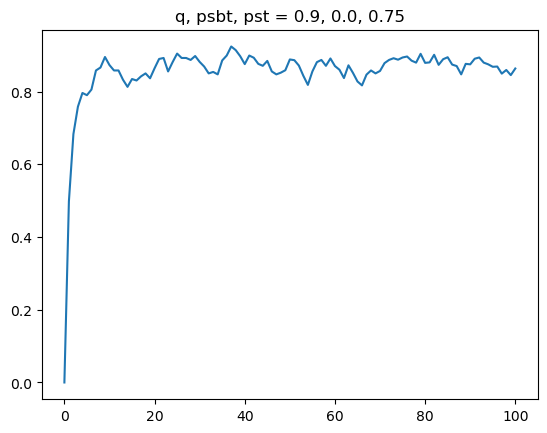

In [40]:
school_id = 0



df_temp = df2_rho_corrects

q = 0.9
p = 0.0
ps = 0.75
rho_init = 0.

inds = get_inds(df_temp[school_id], [(q, p, ps, rho_init)])

ind_t = inds
# ind_t = np.where( (np.abs(df2_rho_corrects[0].q - q) < 1e-5) & (np.abs(df2_rho_corrects[0].p - p ) < 1e-5) & (np.abs(df2_rho_corrects[0].rho_init - rho_init) < 1e-5) & (np.abs(df2_rho_corrects[0].ps - ps) < 1e-5))[0]

print(len(ind_t))
# df_one = df102.iloc[0].rho
df_one = df_temp[school_id].iloc[ind_t[0]].rho
# q = df_w1000.iloc[108].q
# p = df_w1000.iloc[108].p
# ps = df_w1000.iloc[108].ps
df_one
plt.plot(df_one[0:])
plt.title('q, psbt, pst = ' + str(q) + ', ' + str(p) + ', ' + str(ps))

In [37]:
all_triads

['tr0', 'tr1', 'tr2', 'tr3', 'tr4', 'tr5', 'tr6', 'tr7']

In [41]:
df_temp[school_id].columns
cols_m = [triad + "_qs4_m" for triad in all_triads]
cols_s = [triad + "_qs4_s" for triad in all_triads]
df_temp[school_id].iloc[ind_t[0]][['rho_qs4_m', 'rho_qs4_s', 'rho_qs4_b', 'rho_qs4_f', *cols_m, *cols_s]]

rho_qs4_m     0.87386
rho_qs4_s    0.021034
rho_qs4_b        20.0
rho_qs4_f       101.0
tr0_qs4_m     0.00458
tr1_qs4_m       0.027
tr2_qs4_m    0.007756
tr3_qs4_m    0.062953
tr4_qs4_m    0.014008
tr5_qs4_m    0.046471
tr6_qs4_m    0.086226
tr7_qs4_m    0.751007
tr0_qs4_s    0.002023
tr1_qs4_s    0.008118
tr2_qs4_s    0.002708
tr3_qs4_s    0.013946
tr4_qs4_s    0.004499
tr5_qs4_s    0.009069
tr6_qs4_s    0.014697
tr7_qs4_s     0.04844
Name: 4795, dtype: object

Text(0.5, 1.0, 'q, psbt, pst = 0.9, 0.0, 0.75')

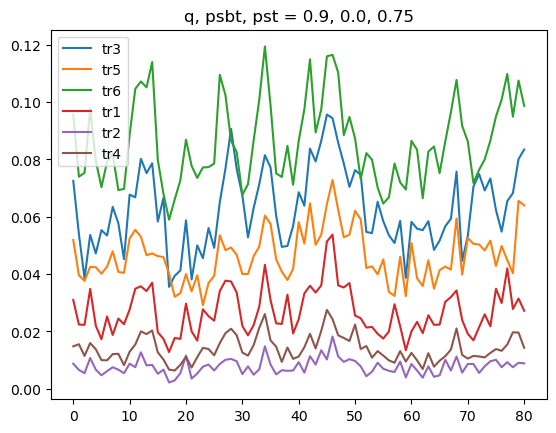

In [42]:
# df_one = df_w2.iloc[0].rho
# df_one
# plt.plot(df_one)

# plt.plot()

for triad in deg_triads:
    plt.plot(df_temp[school_id].iloc[ind_t[0]][triad][20:])
    
plt.legend(deg_triads)
# plt.xscale('log')

plt.title('q, psbt, pst = ' + str(q) + ', ' + str(p) + ', ' + str(ps))

In [43]:
for triad in deg_triads:
    m = np.mean(df_temp[school_id].iloc[ind_t[0]][triad][28:89])
    s = np.std(df_temp[school_id].iloc[ind_t[0]][triad][28:89])
    print(triad,m,s)

tr3 0.06329187433174262 0.014433702249341014
tr5 0.04621181325344418 0.009454641544112685
tr6 0.08575557066192067 0.01541855532317145
tr1 0.027391293951267173 0.008497261894274204
tr2 0.00776459576619446 0.0029510925379199436
tr4 0.01420719480492862 0.004889381017056097


## Applying error functions to QS results

In [37]:
df2_rho_gs[0]

q    p   ps  rho_init  repetitions   rho_lvl  rho_lvl_std  \
0.1 0.7 0.2 0.9  0.1  0.7  0.2       0.9            2  0.682032     0.000000   
        0.3 0.9  0.1  0.7  0.3       0.9            2  0.699893     0.002787   
        0.4 0.5  0.1  0.7  0.4       0.5            1  0.699399     0.000000   
            0.9  0.1  0.7  0.4       0.9            2  0.709921     0.002662   
        0.5 0.5  0.1  0.7  0.5       0.5            2  0.693136     0.000000   
...              ...  ...  ...       ...          ...       ...          ...   
1.0 0.8 0.5 0.9  1.0  0.8  0.5       0.9            2  0.847156     0.033310   
    0.9 0.5 0.5  1.0  0.9  0.5       0.5            2       NaN          NaN   
            0.9  1.0  0.9  0.5       0.9            2  0.823962     0.000000   
    1.0 0.5 0.5  1.0  1.0  0.5       0.5            2       NaN          NaN   
            0.9  1.0  1.0  0.5       0.9            2  0.855731     0.028821   

                 rho_lvl_valid  rho_sim_std  rho_lvl2  ...  tr4_sim_std4  \
0.1 0.7 0.2 0.9              1     0.001428  0.722813  ...           NaN   
        0.3 0.9              2     0.012552  0.694876  ...      0.004860   
        0.4 0.5              1     0.023995  0.699650  ...      0.009321   
            0.9              2     0.012510  0.711036  ...      0.004648   
        0.5 0.5              1     0.022672  0.689173  ...      0.009118   
...                        ...          ...       ...  ...           ...   
1.0 0.8 0.5 0.9              2     0.001129  0.813846  ...      0.000076   
    0.9 0.5 0.5              0          NaN  0.468540  ...           NaN   
            0.9              1     0.005384  0.827241  ...      0.000698   
    1.0 0.5 0.5              0          NaN  0.518674  ...           NaN   
            0.9              2     0.005554  0.854800  ...      0.001039   

                 tr5_lvl4  tr5_lvl4_std  tr5_sim_std4  tr6_lvl4  tr6_lvl4_std  \
0.1 0.7 0.2 0.9       NaN           NaN           NaN       NaN           NaN   
        0.3 0.9  0.131858      0.002068      0.003118  0.133053      0.000499   
        0.4 0.5  0.131747      0.000000      0.005541  0.133970      0.000000   
            0.9  0.129895      0.000058      0.002604  0.132586      0.000051   
        0.5 0.5  0.131642      0.000000      0.004536  0.136142      0.000000   
...                   ...           ...           ...       ...           ...   
1.0 0.8 0.5 0.9  0.000051      0.000049      0.000136  0.121394      0.020554   
    0.9 0.5 0.5       NaN           NaN           NaN       NaN           NaN   
            0.9  0.001826      0.001816      0.001336  0.113890      0.027199   
    1.0 0.5 0.5       NaN           NaN           NaN       NaN           NaN   
            0.9  0.010266      0.003260      0.001247  0.125046      0.021291   

                 tr6_sim_std4  tr7_lvl4  tr7_lvl4_std  tr7_sim_std4  
0.1 0.7 0.2 0.9           NaN       NaN           NaN           NaN  
        0.3 0.9      0.003680  0.354267      0.002362      0.022690  
        0.4 0.5      0.006242  0.367884      0.000000      0.043096  
            0.9      0.003235  0.376531      0.003606      0.020742  
        0.5 0.5      0.007448  0.357835      0.000000      0.034067  
...                       ...       ...           ...           ...  
1.0 0.8 0.5 0.9      0.000096  0.686314      0.061672      0.000195  
    0.9 0.5 0.5           NaN       NaN           NaN           NaN  
            0.9      0.000614  0.738571      0.110011      0.004508  
    1.0 0.5 0.5           NaN       NaN           NaN           NaN  
            0.9      0.001835  0.690335      0.090731      0.007142  

[4881 rows x 94 columns]

In [18]:
"""Adjusting col names"""

for df2_rho_g in df2_rho_gs:
    for col in df2_rho_g.columns:
        if col.endswith("_lvl4"):
            new_col = col.split("_lvl4")[0]
            df2_rho_g[new_col] = df2_rho_g[col]


In [40]:
df2_rho_gs[0][["rho_lvl", "rho_lvl2", "rho_lvl3", "rho"]]

rho_lvl  rho_lvl2  rho_lvl3       rho
0.1 0.7 0.2 0.9  0.682032  0.722813       NaN       NaN
        0.3 0.9  0.699893  0.694876  0.692774  0.695899
        0.4 0.5  0.699399  0.699650  0.695155  0.700049
            0.9  0.709921  0.711036  0.709415  0.709415
        0.5 0.5  0.693136  0.689173  0.690062  0.693794
...                   ...       ...       ...       ...
1.0 0.8 0.5 0.9  0.847156  0.813846  0.845952  0.845952
    0.9 0.5 0.5       NaN  0.468540       NaN       NaN
            0.9  0.823962  0.827241  0.872388  0.867996
    1.0 0.5 0.5       NaN  0.518674       NaN       NaN
            0.9  0.855731  0.854800  0.852159  0.856724

[4881 rows x 4 columns]

In [19]:
df2_rho_gs_trans = [transform_data(df2_rho_g, triads_groups = (n1_triads, n2_triads)) for df2_rho_g in df2_rho_gs]
df2_rho_gs_trans[0]

/tmp/ipykernel_435173/3785191646.py:18: RuntimeWarning: invalid value encountered in true_divide
  return data[triads].values.transpose() / np.sum(data[triads], axis=1).values - 1/T


q    p   ps  rho_init  repetitions   rho_lvl  rho_lvl_std  \
0.1 0.7 0.2 0.9  0.1  0.7  0.2       0.9            2  0.682032     0.000000   
        0.3 0.9  0.1  0.7  0.3       0.9            2  0.699893     0.002787   
        0.4 0.5  0.1  0.7  0.4       0.5            1  0.699399     0.000000   
            0.9  0.1  0.7  0.4       0.9            2  0.709921     0.002662   
        0.5 0.5  0.1  0.7  0.5       0.5            2  0.693136     0.000000   
...              ...  ...  ...       ...          ...       ...          ...   
1.0 0.8 0.5 0.9  1.0  0.8  0.5       0.9            2  0.847156     0.033310   
    0.9 0.5 0.5  1.0  0.9  0.5       0.5            2       NaN          NaN   
            0.9  1.0  0.9  0.5       0.9            2  0.823962     0.000000   
    1.0 0.5 0.5  1.0  1.0  0.5       0.5            2       NaN          NaN   
            0.9  1.0  1.0  0.5       0.9            2  0.855731     0.028821   

                 rho_lvl_valid  rho_sim_std  rho_lvl2  ...  tr7_lvl4  \
0.1 0.7 0.2 0.9              1     0.001428  0.722813  ...       NaN   
        0.3 0.9              2     0.012552  0.694876  ...  0.354267   
        0.4 0.5              1     0.023995  0.699650  ...  0.367884   
            0.9              2     0.012510  0.711036  ...  0.376531   
        0.5 0.5              1     0.022672  0.689173  ...  0.357835   
...                        ...          ...       ...  ...       ...   
1.0 0.8 0.5 0.9              2     0.001129  0.813846  ...  0.686314   
    0.9 0.5 0.5              0          NaN  0.468540  ...       NaN   
            0.9              1     0.005384  0.827241  ...  0.738571   
    1.0 0.5 0.5              0          NaN  0.518674  ...       NaN   
            0.9              2     0.005554  0.854800  ...  0.690335   

                 tr7_lvl4_std  tr7_sim_std4       rho       tr1       tr2  \
0.1 0.7 0.2 0.9           NaN           NaN       NaN       NaN       NaN   
        0.3 0.9      0.002362      0.022690  0.695899  0.012743 -0.010713   
        0.4 0.5      0.000000      0.043096  0.700049  0.004258 -0.012384   
            0.9      0.003606      0.020742  0.709415  0.009131 -0.013048   
        0.5 0.5      0.000000      0.034067  0.693794  0.002441 -0.010782   
...                       ...           ...       ...       ...       ...   
1.0 0.8 0.5 0.9      0.061672      0.000195  0.845952  0.594792 -0.333333   
    0.9 0.5 0.5           NaN           NaN       NaN       NaN       NaN   
            0.9      0.110011      0.004508  0.867996  0.569205 -0.331872   
    1.0 0.5 0.5           NaN           NaN       NaN       NaN       NaN   
            0.9      0.090731      0.007142  0.856724  0.554235 -0.330511   

                      tr3       tr4       tr5       tr6  
0.1 0.7 0.2 0.9       NaN       NaN       NaN       NaN  
        0.3 0.9  0.006779 -0.002030 -0.004878 -0.001901  
        0.4 0.5  0.001135  0.008125 -0.003352  0.002216  
            0.9  0.007611  0.003918 -0.007184 -0.000426  
        0.5 0.5 -0.000141  0.008341 -0.005533  0.005674  
...                   ...       ...       ...       ...  
1.0 0.8 0.5 0.9 -0.193757 -0.261459 -0.332973  0.526730  
    0.9 0.5 0.5       NaN       NaN       NaN       NaN  
            0.9 -0.172136 -0.237333 -0.320094  0.492230  
    1.0 0.5 0.5       NaN       NaN       NaN       NaN  
            0.9 -0.122721 -0.223723 -0.273444  0.396165  

[4881 rows x 101 columns]

In [18]:
# real_datasets_trans[0]

In [20]:
# wiki_trans = transform_data(wiki, triads_groups=(n1_triads, n2_triads))

# df_w1000_trans = transform_data(df_w1000, triads_groups = (n1_triads, n2_triads))
datasets_all = []
real_datasets_all = []
for (dataname, df2_rho_g, df2_rho_g_trans) in zip(datanames, df2_rho_gs, df2_rho_gs_trans):
    datasets = []
    
    if dataname.count("_") == 2:
        real_data = pd.DataFrame(results_realnet_class.loc[dataname]).transpose()
    else:
        real_data = pd.DataFrame(results_realnet2.loc[dataname]).transpose()
    
    real_data_trans = transform_data(real_data, triads_groups=(n1_triads, n2_triads)) 
    
    for error_fun in error_functions:
        if error_fun.__name__.endswith("_transformed"):
            datasets.append((real_data_trans, df2_rho_g_trans, True, 2))
        else:
            datasets.append((real_data, df2_rho_g))
    datasets_all.append(datasets)
    real_datasets_all.append(real_data)

In [21]:
for id, dataname in enumerate(datanames):

    errs = {error_fun.__name__: np.zeros(len(df2_rho_gs[id])) for error_fun in error_functions}

    datasets = datasets_all[id]
    for ind, (dataset, error_fun) in enumerate(zip(datasets, error_functions)):
        # original_data, model_data, is_trans = dataset
        # if is_trans:
        # errs[error_fun.__name__] = error_fun(original_data, model_data)
        # print(ind)
        # dataset2 = dataset[id]
        # print(dataset2)
        # print(len(dataset2))
        try:
            errs[error_fun.__name__] = error_fun(*dataset)
        except TypeError:
            errs[error_fun.__name__] = error_fun(*dataset[:3])
        
        # if len(dataset) > 2:
            

    for error_fun in error_functions:
        df2_rho_gs[id][error_fun.__name__] = errs[error_fun.__name__]

df2_rho_gs[0]

q    p   ps  rho_init  repetitions   rho_lvl  rho_lvl_std  \
0.1 0.7 0.2 0.9  0.1  0.7  0.2       0.9            2  0.682032     0.000000   
        0.3 0.9  0.1  0.7  0.3       0.9            2  0.699893     0.002787   
        0.4 0.5  0.1  0.7  0.4       0.5            1  0.699399     0.000000   
            0.9  0.1  0.7  0.4       0.9            2  0.709921     0.002662   
        0.5 0.5  0.1  0.7  0.5       0.5            2  0.693136     0.000000   
...              ...  ...  ...       ...          ...       ...          ...   
1.0 0.8 0.5 0.9  1.0  0.8  0.5       0.9            2  0.847156     0.033310   
    0.9 0.5 0.5  1.0  0.9  0.5       0.5            2       NaN          NaN   
            0.9  1.0  0.9  0.5       0.9            2  0.823962     0.000000   
    1.0 0.5 0.5  1.0  1.0  0.5       0.5            2       NaN          NaN   
            0.9  1.0  1.0  0.5       0.9            2  0.855731     0.028821   

                 rho_lvl_valid  rho_sim_std  rho_lvl2  ...       tr2  \
0.1 0.7 0.2 0.9              1     0.001428  0.722813  ...       NaN   
        0.3 0.9              2     0.012552  0.694876  ...  0.067949   
        0.4 0.5              1     0.023995  0.699650  ...  0.065028   
            0.9              2     0.012510  0.711036  ...  0.062904   
        0.5 0.5              1     0.022672  0.689173  ...  0.067351   
...                        ...          ...       ...  ...       ...   
1.0 0.8 0.5 0.9              2     0.001129  0.813846  ...  0.000000   
    0.9 0.5 0.5              0          NaN  0.468540  ...       NaN   
            0.9              1     0.005384  0.827241  ...  0.000168   
    1.0 0.5 0.5              0          NaN  0.518674  ...       NaN   
            0.9              2     0.005554  0.854800  ...  0.000365   

                      tr3       tr4       tr5       tr6       tr7  \
0.1 0.7 0.2 0.9       NaN       NaN       NaN       NaN       NaN   
        0.3 0.9  0.136537  0.069777  0.131858  0.133053  0.354267   
        0.4 0.5  0.133538  0.069184  0.131747  0.133970  0.367884   
            0.9  0.135787  0.066236  0.129895  0.132586  0.376531   
        0.5 0.5  0.133807  0.071344  0.131642  0.136142  0.357835   
...                   ...       ...       ...       ...       ...   
1.0 0.8 0.5 0.9  0.019701  0.011717  0.000051  0.121394  0.686314   
    0.9 0.5 0.5       NaN       NaN       NaN       NaN       NaN   
            0.9  0.022238  0.011008  0.001826  0.113890  0.738571   
    1.0 0.5 0.5       NaN       NaN       NaN       NaN       NaN   
            0.9  0.036102  0.014167  0.010266  0.125046  0.690335   

                 closest_to_six_triads_transformed  \
0.1 0.7 0.2 0.9                                NaN   
        0.3 0.9                           0.108169   
        0.4 0.5                           0.110797   
            0.9                           0.108657   
        0.5 0.5                           0.111039   
...                                            ...   
1.0 0.8 0.5 0.9                           0.455949   
    0.9 0.5 0.5                                NaN   
            0.9                           0.387645   
    1.0 0.5 0.5                                NaN   
            0.9                           0.278503   

                 closest_to_six_triads_rho_transformed  closest_to_six_triads  \
0.1 0.7 0.2 0.9                                    NaN                    NaN   
        0.3 0.9                               0.124649               0.015358   
        0.4 0.5                               0.125805               0.014681   
            0.9                               0.120595               0.014271   
        0.5 0.5                               0.128293               0.015202   
...                                                ...                    ...   
1.0 0.8 0.5 0.9                               0.462976               0.012836   
    0.9 0.5 0.5                                    NaN             

In [20]:
df2_rho_g.columns

non_nan_cols = ['rho', 'tr0', 'tr1', 'tr2', 'tr3', 'tr4',
       'tr5', 'tr6', 'tr7']
non_nan_cols = ['rho']

In [50]:
# non_nan_cols2 = [col + "_qs3_m" for col in non_nan_cols]

# sets = [(0.55, 0.45, 1.0, 0.8)]
# ind = get_inds(df2_rho_correct, sets)
# df_temp = df2_rho_correct.iloc[ind][non_nan_cols2]

# proper_inds3 = np.copy(df_temp.index)
# proper_inds3 = [ind for ind in proper_inds3 if not ((np.isnan(df_temp.loc[ind].rho_qs3_m)) | (df_temp.loc[ind].rho_qs3_m == 1)) ]

# for i in range(0,8):
#        tr_name = 'tr' + str(i)

#        col = tr_name + '_qs3_m'
#        proper_inds3 = [ind for ind in proper_inds3 if not ((np.isnan(df_temp.loc[ind][col])) | (df_temp.loc[ind][col] == 1)) ]


# proper_inds3

In [21]:

inds_all = []
for df2_rho_g in df2_rho_gs:
    cnt = 0
    inds = []
    for ind,row in df2_rho_g.iterrows():
        if np.any(np.isnan(row[non_nan_cols].values.flatten().tolist())):
            inds.append(ind)
            cnt += 1
    print([cnt, len(df2_rho_g.index), len(df2_rho_g.index) - cnt])
    inds_all.append(inds)

[159, 4881, 4722]
[396, 6412, 6016]
[103, 6848, 6745]
[121, 6170, 6049]
[468, 8527, 8059]
[293, 6904, 6611]
[125, 5881, 5756]
[286, 4537, 4251]
[641, 4410, 3769]
[419, 4909, 4490]
[666, 7226, 6560]
[967, 4271, 3304]
[906, 9109, 8203]
[298, 6793, 6495]
[1368, 5740, 4372]
[4754, 5616, 862]
[1077, 5095, 4018]
[1391, 7685, 6294]
[1927, 6777, 4850]
[4943, 6225, 1282]
[6249, 8493, 2244]
[5875, 6299, 424]
[851, 6816, 5965]
[1275, 6156, 4881]
[153, 5734, 5581]
[169, 6023, 5854]
[249, 7559, 7310]
[91, 5682, 5591]
[215, 5400, 5185]
[228, 5903, 5675]
[37, 5471, 5434]
[153, 5987, 5834]
[87, 6948, 6861]


In [280]:

df2_temp = df2_rho_gs[school_id]
cnt = 0
inds = []
for ind,row in df2_temp.iterrows():
    if np.any(np.isnan(row[non_nan_cols].values.flatten().tolist())):
        print(ind)
        inds.append(ind)
        cnt += 1
print([cnt, len(df2_temp.index), len(df2_temp.index) - cnt])

(0.1, 0.9, 0.1, 0.9)
(0.1, 0.9, 0.2, 0.8)
(0.1, 0.9, 0.2, 0.9)
(0.1, 0.9, 0.3, 0.9)
(0.1, 0.9, 0.8, 0.9)
(0.1, 0.9, 1.0, 0.9)
(0.1, 1.0, 0.4, 0.8)
(0.1, 1.0, 0.4, 0.9)
(0.1, 1.0, 0.6, 0.8)
(0.1, 1.0, 0.6, 0.9)
(0.1, 1.0, 0.8, 0.8)
(0.1, 1.0, 0.8, 0.9)
(0.2, 0.9, 0.0, 0.9)
(0.2, 0.9, 0.3, 0.9)
(0.2, 0.9, 0.5, 0.9)
(0.2, 0.9, 0.6, 0.9)
(0.2, 0.9, 1.0, 0.9)
(0.2, 1.0, 0.7, 0.9)
(0.3, 0.8, 0.8, 0.9)
(0.3, 0.9, 0.9, 0.9)
(0.3, 1.0, 0.0, 0.9)
(0.3, 1.0, 0.3, 0.9)
(0.3, 1.0, 0.5, 0.9)
(0.3, 1.0, 0.6, 0.9)
(0.3, 1.0, 0.8, 0.9)
(0.3, 1.0, 0.9, 0.9)
(0.4, 0.8, 1.0, 0.9)
(0.4, 0.9, 0.7, 0.9)
(0.4, 0.9, 0.8, 0.8)
(0.4, 0.9, 0.8, 0.9)
(0.4, 1.0, 0.6, 0.9)
(0.4, 1.0, 0.7, 0.9)
(0.4, 1.0, 0.8, 0.9)
(0.4, 1.0, 0.9, 0.9)
(0.5, 0.8, 1.0, 0.9)
(0.5, 0.9, 0.7, 0.9)
(0.5, 0.9, 0.8, 0.9)
(0.5, 0.9, 0.9, 0.9)
(0.5, 0.9, 1.0, 0.8)
(0.5, 0.9, 1.0, 0.9)
(0.5, 1.0, 0.5, 0.9)
(0.5, 1.0, 0.8, 0.9)
(0.5, 1.0, 1.0, 0.8)
(0.5, 1.0, 1.0, 0.9)
(0.6, 0.9, 0.8, 0.9)
(0.6, 1.0, 0.6, 0.9)
(0.6, 1.0, 0.8, 0.9)
(0.6, 1.0, 0.

In [90]:
df2_rho_g.columns

Index(['q', 'p', 'ps', 'rho_init', 'repetitions', 'rho_lvl', 'rho_lvl_std',
       'rho_lvl_valid', 'rho_lvl2', 'rho_lvl2_std', 'rho_lvl2_valid',
       'rho_lvl3', 'rho_lvl3_std', 'rho_lvl3_valid', 'rho_lvl_exp', 'tr_valid',
       'tr0_lvl', 'tr0_lvl_std', 'tr1_lvl', 'tr1_lvl_std', 'tr2_lvl',
       'tr2_lvl_std', 'tr3_lvl', 'tr3_lvl_std', 'tr4_lvl', 'tr4_lvl_std',
       'tr5_lvl', 'tr5_lvl_std', 'tr6_lvl', 'tr6_lvl_std', 'tr7_lvl',
       'tr7_lvl_std', 'tr0_lvl3', 'tr0_lvl3_std', 'tr1_lvl3', 'tr1_lvl3_std',
       'tr2_lvl3', 'tr2_lvl3_std', 'tr3_lvl3', 'tr3_lvl3_std', 'tr4_lvl3',
       'tr4_lvl3_std', 'tr5_lvl3', 'tr5_lvl3_std', 'tr6_lvl3', 'tr6_lvl3_std',
       'tr7_lvl3', 'tr7_lvl3_std', 'rho', 'tr0', 'tr1', 'tr2', 'tr3', 'tr4',
       'tr5', 'tr6', 'tr7', 'closest_to_rho',
       'closest_to_high_underrepresentation',
       'closest_to_high_underrepresentation_transformed',
       'closest_to_four_triads', 'closest_to_four_triads_transformed',
       'closest_to_six_triads'

In [27]:
"""Let us take all good rows """
non_nan_cols = ['rho', 'tr0', 'tr1', 'tr2', 'tr3', 'tr4',
       'tr5', 'tr6', 'tr7']
kmin = 3
inds_gs3 = []
for df2_rho_g in df2_rho_gs:
    inds_g3 = []
    for error_fun in error_functions:
        arr = [row[error_fun.__name__] if ((not np.any(np.isnan(row[non_nan_cols].values.flatten().tolist())))  ) else 100 for ind,row in df2_rho_g.iterrows()]
        inds_p = np.argpartition(arr, kmin)[:kmin]
        inds_g3.extend(inds_p)
    inds_gs3.append(inds_g3)

    print(df2_rho_g.iloc[inds_g3].to_markdown())
        

|                          |     q |    p |   ps |   rho_init |   repetitions |   rho_lvl |   rho_lvl_std |   rho_lvl_valid |   rho_sim_std |   rho_lvl2 |   rho_lvl2_std |   rho_lvl2_valid |   rho_sim_std2 |   rho_lvl3 |   rho_lvl3_std |   rho_lvl3_valid |   rho_sim_std3 |   rho_lvl_exp |   rho_lvl4 |   rho_lvl4_std |   rho_lvl4_valid |   rho_sim_std4 |     tr0_lvl |   tr0_lvl_std |   tr0_sim_std |    tr1_lvl |   tr1_lvl_std |   tr1_sim_std |     tr2_lvl |   tr2_lvl_std |   tr2_sim_std |    tr3_lvl |   tr3_lvl_std |   tr3_sim_std |    tr4_lvl |   tr4_lvl_std |   tr4_sim_std |    tr5_lvl |   tr5_lvl_std |   tr5_sim_std |   tr6_lvl |   tr6_lvl_std |   tr6_sim_std |   tr7_lvl |   tr7_lvl_std |   tr7_sim_std |    tr0_lvl3 |   tr0_lvl3_std |   tr0_sim_std3 |   tr1_lvl3 |   tr1_lvl3_std |   tr1_sim_std3 |    tr2_lvl3 |   tr2_lvl3_std |   tr2_sim_std3 |   tr3_lvl3 |   tr3_lvl3_std |   tr3_sim_std3 |   tr4_lvl3 |   tr4_lvl3_std |   tr4_sim_std3 |   tr5_lvl3 |   tr5_lvl3_std |   tr5_sim_std3 | 

In [233]:

kmin = 10

error_fun = error_functions[1]
arr = [row[error_fun.__name__] if ((not np.any(np.isnan(row[non_nan_cols].values.flatten().tolist()))) & (not np.isnan(row.rho_lvl)) & (row.rho_lvl < 0.92) & (row.rho_lvl > 0.65)) else 100 for ind,row in df2_rho_g.iterrows()]
inds_p = np.argpartition(arr, kmin)[:kmin]


df2_rho_g.iloc[inds_p]
        

q     p    ps  rho_init  repetitions   rho_lvl  \
0.50 0.80 0.50 0.2  0.50  0.80  0.50       0.2            1  0.894514   
0.10 0.80 0.30 0.0  0.10  0.80  0.30       0.0            1  0.897645   
0.55 1.00 0.20 0.4  0.55  1.00  0.20       0.4            5  0.908866   
0.10 0.80 0.20 0.2  0.10  0.80  0.20       0.2            1  0.911267   
0.60 0.95 0.35 0.0  0.60  0.95  0.35       0.0            5  0.888615   
0.55 1.00 0.25 0.0  0.55  1.00  0.25       0.0            5  0.896464   
0.20 0.80 0.50 0.0  0.20  0.80  0.50       0.0            1  0.904538   
0.55 0.95 0.30 0.2  0.55  0.95  0.30       0.2            5  0.907134   
0.60 0.90 0.40 0.2  0.60  0.90  0.40       0.2            6  0.898487   
0.75 1.00 0.40 0.2  0.75  1.00  0.40       0.2            5  0.899112   

                    rho_lvl_std  rho_lvl_valid  rho_lvl2  rho_lvl2_std  ...  \
0.50 0.80 0.50 0.2     0.000000              1  0.894514      0.000000  ...   
0.10 0.80 0.30 0.0     0.000000              1  0.897645      0.000000  ...   
0.55 1.00 0.20 0.4     0.005896              5  0.908866      0.005896  ...   
0.10 0.80 0.20 0.2     0.000000              1  0.911267      0.000000  ...   
0.60 0.95 0.35 0.0     0.002907              5  0.888615      0.002907  ...   
0.55 1.00 0.25 0.0     0.002021              5  0.896464      0.002021  ...   
0.20 0.80 0.50 0.0     0.000000              1  0.904538      0.000000  ...   
0.55 0.95 0.30 0.2     0.004472              5  0.907134      0.004472  ...   
0.60 0.90 0.40 0.2     0.002947              6  0.898487      0.002947  ...   
0.75 1.00 0.40 0.2     0.003159              5  0.899112      0.003159  ...   

                    closest_to_six_triads  closest_to_six_triads_transformed  \
0.50 0.80 0.50 0.2               0.000619                           0.077667   
0.10 0.80 0.30 0.0               0.000403                           0.040644   
0.55 1.00 0.20 0.4               0.000580                           0.096462   
0.10 0.80 0.20 0.2               0.000466                           0.042586   
0.60 0.95 0.35 0.0               0.000589                           0.072608   
0.55 1.00 0.25 0.0               0.000432                           0.058314   
0.20 0.80 0.50 0.0               0.000438                           0.042174   
0.55 0.95 0.30 0.2               0.000496                           0.081744   
0.60 0.90 0.40 0.2               0.000665                           0.095774   
0.75 1.00 0.40 0.2               0.000564                           0.128281   

                    closest_to_six_triads_corrdevs_transformed  \
0.50 0.80 0.50 0.2                                    1.026431   
0.10 0.80 0.30 0.0                                    1.024652   
0.55 1.00 0.20 0.4                                    1.033162   
0.10 0.80 0.20 0.2                                    1.021609   
0.60 0.95 0.35 0.0                                    1.025048   
0.55 1.00 0.25 0.0                                    1.020239   
0.20 0.80 0.50 0.0                                    1.022510   
0.55 0.95 0.30 0.2                                    1.028108   
0.60 0.90 0.40 0.2                                    1.033764   
0.75 1.00 0.40 0.2                                    1.052431   

                    closest_to_four_triads_corrdevs_transformed  \
0.50 0.80 0.50 0.2                                     1.026431   
0.10 0.80 0.30 0.0                                     1.024652   
0.55 1.00 0.20 0.4                                     1.033162   
0.10 0.80 0.20 0.2                                     1.021609   
0.60 0.95 0.35 0.0                                     1.025048   
0.55 1.00 0.25 0.0                                     1.020239   
0.20 0.80 0.50 0.0                                     1.022510   
0.55 0.95 0.30 0.2                                     1.028108   
0.60 0.90 0.40 0.2                                     1.033764   
0.75 1.00 0.40 0.2                                     1.052431   

   

In [21]:
real_datasets_all[0].rho.values[0]

def max_rho(real_rho, dif = 0.2, top = 0.98):
    rho = real_rho + dif
    if rho > top:
        rho = top
    return rho

def min_rho(real_rho, dif = 0.2, bot = 0.):
    rho = real_rho - dif
    if rho < bot:
        rho = bot
    return rho

In [29]:
"""Let us exclude rows that have nan rho outsidethe range"""
non_nan_cols = ['rho', 'tr0', 'tr1', 'tr2', 'tr3', 'tr4',
       'tr5', 'tr6', 'tr7']
non_nan_cols = ['rho']
kmin = 3
inds_gs20 = []
for data_ind, df2_rho_g in enumerate(df2_rho_gs):
    # print(data_ind)
    inds_g4 = []
    for error_fun in error_functions:
        arr = [row[error_fun.__name__] if ((not np.any(np.isnan(row[non_nan_cols].values.flatten().tolist()))) & 
                                            (row.rho < max_rho(real_datasets_all[data_ind].rho.values[0])) & (row.rho > min_rho(real_datasets_all[data_ind].rho.values[0]))  ) else 100 
               for ind,row in df2_rho_g.iterrows()]
        inds_p = np.argpartition(arr, kmin)[:kmin]
        inds_g4.extend(inds_p)
    inds_gs20.append(inds_g4)

    print(df2_rho_g.iloc[inds_g4].to_markdown())
        

|                          |     q |    p |   ps |   rho_init |   repetitions |   rho_lvl |   rho_lvl_std |   rho_lvl_valid |   rho_sim_std |   rho_lvl2 |   rho_lvl2_std |   rho_lvl2_valid |   rho_sim_std2 |   rho_lvl3 |   rho_lvl3_std |   rho_lvl3_valid |   rho_sim_std3 |   rho_lvl_exp |   rho_lvl4 |   rho_lvl4_std |   rho_lvl4_valid |   rho_sim_std4 |     tr0_lvl |   tr0_lvl_std |   tr0_sim_std |    tr1_lvl |   tr1_lvl_std |   tr1_sim_std |     tr2_lvl |   tr2_lvl_std |   tr2_sim_std |   tr3_lvl |   tr3_lvl_std |   tr3_sim_std |    tr4_lvl |   tr4_lvl_std |   tr4_sim_std |   tr5_lvl |   tr5_lvl_std |   tr5_sim_std |   tr6_lvl |   tr6_lvl_std |   tr6_sim_std |   tr7_lvl |   tr7_lvl_std |   tr7_sim_std |      tr0_lvl3 |   tr0_lvl3_std |   tr0_sim_std3 |     tr1_lvl3 |   tr1_lvl3_std |   tr1_sim_std3 |      tr2_lvl3 |   tr2_lvl3_std |   tr2_sim_std3 |    tr3_lvl3 |   tr3_lvl3_std |   tr3_sim_std3 |     tr4_lvl3 |   tr4_lvl3_std |   tr4_sim_std3 |     tr5_lvl3 |   tr5_lvl3_std |   tr5_si

In [30]:
"""Let us exclude rows that have nan rho outsidethe range"""
non_nan_cols = ['rho', 'tr0', 'tr1', 'tr2', 'tr3', 'tr4',
       'tr5', 'tr6', 'tr7']
non_nan_cols = ['rho']
kmin = 3
inds_gs10 = []
for data_ind, df2_rho_g in enumerate(df2_rho_gs):
    # print(data_ind)
    inds_g4 = []
    for error_fun in error_functions:
        arr = [row[error_fun.__name__] if ((not np.any(np.isnan(row[non_nan_cols].values.flatten().tolist()))) & 
                                            (row.rho < max_rho(real_datasets_all[data_ind].rho.values[0], dif = 0.1)) & 
                                            (row.rho > min_rho(real_datasets_all[data_ind].rho.values[0], dif = 0.1))  ) else 100 
               for ind,row in df2_rho_g.iterrows()]
        inds_p = np.argpartition(arr, kmin)[:kmin]
        inds_g4.extend(inds_p)
    inds_gs10.append(inds_g4)

    print(df2_rho_g.iloc[inds_g4].to_markdown())
        

|                          |     q |    p |   ps |   rho_init |   repetitions |   rho_lvl |   rho_lvl_std |   rho_lvl_valid |   rho_sim_std |   rho_lvl2 |   rho_lvl2_std |   rho_lvl2_valid |   rho_sim_std2 |   rho_lvl3 |   rho_lvl3_std |   rho_lvl3_valid |   rho_sim_std3 |   rho_lvl_exp |   rho_lvl4 |   rho_lvl4_std |   rho_lvl4_valid |   rho_sim_std4 |    tr0_lvl |   tr0_lvl_std |   tr0_sim_std |   tr1_lvl |   tr1_lvl_std |   tr1_sim_std |    tr2_lvl |   tr2_lvl_std |   tr2_sim_std |   tr3_lvl |   tr3_lvl_std |   tr3_sim_std |   tr4_lvl |   tr4_lvl_std |   tr4_sim_std |   tr5_lvl |   tr5_lvl_std |   tr5_sim_std |   tr6_lvl |   tr6_lvl_std |   tr6_sim_std |   tr7_lvl |   tr7_lvl_std |   tr7_sim_std |   tr0_lvl3 |   tr0_lvl3_std |   tr0_sim_std3 |   tr1_lvl3 |   tr1_lvl3_std |   tr1_sim_std3 |   tr2_lvl3 |   tr2_lvl3_std |   tr2_sim_std3 |   tr3_lvl3 |   tr3_lvl3_std |   tr3_sim_std3 |   tr4_lvl3 |   tr4_lvl3_std |   tr4_sim_std3 |   tr5_lvl3 |   tr5_lvl3_std |   tr5_sim_std3 |   tr6_lv

In [22]:
def get_best_inds(dfs, error_functions, kmin, non_nan_cols, mins_rho = np.NaN, maxs_rho = np.NaN, verbose = True):
    
    if callable(mins_rho):
        mins_rho = [mins_rho(real_datasets_all[data_ind].rho.values[0]) for data_ind in range(len(dfs))]
    elif np.isnan(mins_rho):
        mins_rho = [0. for _ in range(len(dfs))]
    if callable(maxs_rho):
        maxs_rho = [maxs_rho(real_datasets_all[data_ind].rho.values[0]) for data_ind in range(len(dfs))]
    elif np.isnan(maxs_rho):
        maxs_rho = [1. for _ in range(len(dfs))]
    
    inds_smallests = []
    for data_ind, df in enumerate(dfs):
        # print(data_ind)
        inds_smallest = []
        for error_fun in error_functions:
            arr = [row[error_fun.__name__] if ((not np.any(np.isnan(row[non_nan_cols].values.flatten().tolist()))) & 
                                                (row.rho < maxs_rho[data_ind]) & (row.rho > mins_rho[data_ind])  ) else 100 
                for ind,row in df.iterrows()]
            inds_p = np.argpartition(arr, kmin)[:kmin]
            inds_smallest.extend(inds_p)
        inds_smallests.append(inds_smallest)

        if verbose:
            print(df.iloc[inds_smallest].to_markdown())
    
    return inds_smallests

def get_smallest_inds(dfs, error_functions, non_nan_cols, mins_rho = np.NaN, maxs_rho = np.NaN, verbose = True):
    kmin = 1
    return get_best_inds(dfs, error_functions, kmin, non_nan_cols, mins_rho, maxs_rho, verbose)

def get_closest_to_best_inds(dfs, error_functions, accepted_dif, non_nan_cols, mins_rho = np.NaN, maxs_rho = np.NaN, verbose = True, inds_smallests = []):
    # if np.isempty(inds_smallests):
    #     inds_smallests = get_smallest_inds(df2_rho_correct_gs, error_functions, non_nan_cols, min_rho, max_rho, verbose = False)
    
    if callable(mins_rho):
        mins_rho = [mins_rho(real_datasets_all[data_ind].rho.values[0]) for data_ind in range(len(dfs))]
    elif np.isnan(mins_rho):
        mins_rho = [0. for _ in range(len(dfs))]
    if callable(maxs_rho):
        maxs_rho = [maxs_rho(real_datasets_all[data_ind].rho.values[0]) for data_ind in range(len(dfs))]
    elif np.isnan(maxs_rho):
        maxs_rho = [1. for _ in range(len(dfs))]
    
    inds_closests = []
    inds_closests2 = []
    for data_ind, df in enumerate(dfs):
        # print(data_ind)
        inds_closest = []
        inds_closest2 = []
        for error_fun in error_functions:
            arr = [row[error_fun.__name__] if ((not np.any(np.isnan(row[non_nan_cols].values.flatten().tolist()))) & 
                                                (row.rho < maxs_rho[data_ind]) & (row.rho > mins_rho[data_ind])  ) else 100 
                for ind,row in df.iterrows()]
            
            inds_p = np.where(arr < np.min(arr) * accepted_dif)[0]

            inds_closest.extend(inds_p)
            inds_closest2.append(inds_p)
        inds_closests.append(inds_closest)
        inds_closests2.append(inds_closest2)

        if verbose:
            print(list(map(len, inds_closest2)))
            print(df.iloc[inds_closest].to_markdown())
            # print(df2_rho_correct_gs[data_ind].iloc[np.where(inds)[0]].to_markdown())
    
    return inds_closests, inds_closests2

In [24]:
non_nan_cols = ['rho']
inds_smallests = get_smallest_inds(df2_rho_gs, error_functions, non_nan_cols, min_rho, max_rho)

|                          |     q |    p |   ps |   rho_init |   repetitions |   rho_lvl |   rho_lvl_std |   rho_lvl_valid |   rho_sim_std |   rho_lvl2 |   rho_lvl2_std |   rho_lvl2_valid |   rho_sim_std2 |   rho_lvl3 |   rho_lvl3_std |   rho_lvl3_valid |   rho_sim_std3 |   rho_lvl_exp |   rho_lvl4 |   rho_lvl4_std |   rho_lvl4_valid |   rho_sim_std4 |     tr0_lvl |   tr0_lvl_std |   tr0_sim_std |    tr1_lvl |   tr1_lvl_std |   tr1_sim_std |     tr2_lvl |   tr2_lvl_std |   tr2_sim_std |   tr3_lvl |   tr3_lvl_std |   tr3_sim_std |    tr4_lvl |   tr4_lvl_std |   tr4_sim_std |   tr5_lvl |   tr5_lvl_std |   tr5_sim_std |   tr6_lvl |   tr6_lvl_std |   tr6_sim_std |   tr7_lvl |   tr7_lvl_std |   tr7_sim_std |    tr0_lvl3 |   tr0_lvl3_std |   tr0_sim_std3 |   tr1_lvl3 |   tr1_lvl3_std |   tr1_sim_std3 |    tr2_lvl3 |   tr2_lvl3_std |   tr2_sim_std3 |   tr3_lvl3 |   tr3_lvl3_std |   tr3_sim_std3 |   tr4_lvl3 |   tr4_lvl3_std |   tr4_sim_std3 |   tr5_lvl3 |   tr5_lvl3_std |   tr5_sim_std3 |   

In [23]:
inds_closests, inds_closests2 = get_closest_to_best_inds(df2_rho_gs, error_functions, 1.1, non_nan_cols, min_rho, max_rho)

[1, 1, 3, 9]
|                          |     q |    p |   ps |   rho_init |   repetitions |   rho_lvl |   rho_lvl_std |   rho_lvl_valid |   rho_sim_std |   rho_lvl2 |   rho_lvl2_std |   rho_lvl2_valid |   rho_sim_std2 |   rho_lvl3 |   rho_lvl3_std |   rho_lvl3_valid |   rho_sim_std3 |   rho_lvl_exp |   rho_lvl4 |   rho_lvl4_std |   rho_lvl4_valid |   rho_sim_std4 |     tr0_lvl |   tr0_lvl_std |   tr0_sim_std |    tr1_lvl |   tr1_lvl_std |   tr1_sim_std |     tr2_lvl |   tr2_lvl_std |   tr2_sim_std |   tr3_lvl |   tr3_lvl_std |   tr3_sim_std |    tr4_lvl |   tr4_lvl_std |   tr4_sim_std |   tr5_lvl |   tr5_lvl_std |   tr5_sim_std |   tr6_lvl |   tr6_lvl_std |   tr6_sim_std |   tr7_lvl |   tr7_lvl_std |   tr7_sim_std |    tr0_lvl3 |   tr0_lvl3_std |   tr0_sim_std3 |   tr1_lvl3 |   tr1_lvl3_std |   tr1_sim_std3 |    tr2_lvl3 |   tr2_lvl3_std |   tr2_sim_std3 |   tr3_lvl3 |   tr3_lvl3_std |   tr3_sim_std3 |   tr4_lvl3 |   tr4_lvl3_std |   tr4_sim_std3 |   tr5_lvl3 |   tr5_lvl3_std |   tr5_

In [25]:
def get_min_dev(uni_vals, val):
    
    val_ind = np.where(uni_vals == val)[0][0]
    if val_ind == 0:
        return uni_vals[1] - uni_vals[0]
    elif val_ind == len(uni_vals) - 1:
        return uni_vals[-1] - uni_vals[-2]
    else:
        return (uni_vals[val_ind+1] - uni_vals[val_ind-1])/2

def get_param_range_dev(df, inds_closest2):
    # df_part = df.iloc[[inds_closest2]]
    df_part = df.iloc[inds_closest2]
    
    qs = df_part.q.values
    psbts = df_part.p.values
    psts = df_part.ps.values
    
    all_qs = np.unique(df.q)
    all_psbts = np.unique(df.p)
    all_psts = np.unique(df.ps)
    
    if len(df_part) == 1:
    
        q_dev = get_min_dev(all_qs, qs[0])
        psbt_dev = get_min_dev(all_psbts, psbts[0])
        pst_dev = get_min_dev(all_psts, psts[0])
        
        return qs[0], psbts[0], psts[0], q_dev, psbt_dev, pst_dev
    else:
        q_mean = np.mean(qs)
        q_dev = (np.max(qs) - np.min(qs))/2 + (get_min_dev(all_qs, np.min(qs)) + get_min_dev(all_qs, np.max(qs)))/2
        psbt_mean = np.mean(psbts)
        psbt_dev = (np.max(psbts) - np.min(psbts))/2 + (get_min_dev(all_psbts, np.min(psbts)) + get_min_dev(all_psbts, np.max(psbts)))/2
        pst_mean = np.mean(psts)
        pst_dev = (np.max(psts) - np.min(psts))/2 + (get_min_dev(all_psts, np.min(psts)) + get_min_dev(all_psts, np.max(psts)))/2
        
        return q_mean, psbt_mean, pst_mean, q_dev, psbt_dev, pst_dev

def get_param_ranges_dev(dfs, inds_closests2, error_id = -1):
    if error_id == -1:
        error_ids = range(len(inds_closests2[0]))
    else:
        error_ids = [error_id]
    
    return [[get_param_range_dev(df, inds_closest2[error_id]) for error_id in error_ids] for df, inds_closest2 in zip(dfs, inds_closests2)]

In [86]:
best_params_values = get_param_ranges_dev(df2_rho_gs, inds_closests2, error_id = 0)
best_params_values = [best_param_values[0] for best_param_values in best_params_values]
best_params_values = [[round(value, 10) for value in best_param_values] for best_param_values in best_params_values]
best_params_values[:5]

[[0.9, 0.2, 0.7, 0.1, 0.1, 0.1],
 [0.9, 0.1, 0.7, 0.1, 0.1, 0.1],
 [0.9, 0.2, 0.65, 0.1, 0.3, 0.15],
 [0.9, 0.05, 0.7, 0.1, 0.15, 0.1],
 [0.4, 0.7, 0.7, 0.1, 0.1, 0.1]]

In [100]:
df_bestparams = pd.DataFrame(best_params_values,columns=["q", "psbt", "pst", "dev_q", "dev_psbt", "dev_pst"])
df_bestparams["school"] = datanames
df_bestparams["err20"] = error_vals_min20
df_bestparams.set_index("school", inplace=True, drop = True)
df_bestparams.head(3)
# df_bestparams.set_index(datanames)

q  psbt   pst  dev_q  dev_psbt  dev_pst     err20
school                                                       
t11_10_1  0.9   0.2  0.70    0.1       0.1     0.10  0.001056
t11_10_2  0.9   0.1  0.70    0.1       0.1     0.10  0.031849
t11_10_3  0.9   0.2  0.65    0.1       0.3     0.15  0.058831

In [98]:
fpath = outputs_dir.joinpath("schools_classes_controlup20_bestparams.csv")
df_bestparams.to_csv(fpath)

# Plots

In [22]:


n1_triads = ['tr3', 'tr5', 'tr6']
n1_nonhierarchical = 'tr5'
n2_triads = ['tr1', 'tr2', 'tr4']
n2_nonhierarchical = 'tr2'

triad_names_map={
    'tr7': 'BH0',
    'tr4': 'BH1',
    'tr1': 'BH2',
    'tr2': 'BN1',
    'tr0': 'UH2',
    'tr3': 'UH1',
    'tr5': 'UN1',
    'tr6': 'UH0',
}
triad_names_map.update({value: key for key, value in triad_names_map.items()})


### Heatmaps

In [57]:
df2_srho_correct_g_minerrs = df2_srho_correct_g.groupby(by=["q", "p", "ps"]).min()

In [100]:
df2_srho_correct_g_minerrs[inds2]

rho_init  repetitions   rho_lvl  rho_lvl_std  rho_lvl_valid  \
q   p   ps                                                                 
1.0 0.0 0.5       0.8            1  0.798349          0.0              1   
    0.1 0.5       0.8            1  0.801862          0.0              1   
    0.2 0.5       0.8            1  0.803582          0.0              1   
    0.3 0.5       0.8            1  0.796324          0.0              1   
    0.4 0.5       0.8            1  0.801191          0.0              1   
    0.5 0.5       0.8            1  0.803749          0.0              1   
    0.6 0.5       0.8            1  0.798011          0.0              1   
    0.7 0.5       0.8            1  0.799142          0.0              1   
    0.8 0.5       0.8            1  0.799376          0.0              1   
    0.9 0.5       0.8            1  0.798857          0.0              1   
    1.0 0.5       0.8            1  0.800090          0.0              1   

             rho_lvl2  rho_lvl2_std  rho_lvl2_valid  rho_lvl3  rho_lvl3_std  \
q   p   ps                                                                    
1.0 0.0 0.5  0.798349           0.0               1  0.798505           0.0   
    0.1 0.5  0.801862           0.0               1  0.802332           0.0   
    0.2 0.5  0.803582           0.0               1  0.898565           0.0   
    0.3 0.5  0.796324           0.0               1  0.900420           0.0   
    0.4 0.5  0.801191           0.0               1  0.801141           0.0   
    0.5 0.5  0.803749           0.0               1  0.803969           0.0   
    0.6 0.5  0.798011           0.0               1  0.798029           0.0   
    0.7 0.5  0.799142           0.0               1  0.798795           0.0   
    0.8 0.5  0.799376           0.0               1  0.798953           0.0   
    0.9 0.5  0.798857           0.0               1  0.798789           0.0   
    1.0 0.5  0.800090           0.0               1  0.799906           0.0   

             ...  closest_to_six_triads  closest_to_six_triads_transformed  \
q   p   ps   ...                                                             
1.0 0.0 0.5  ...               0.002123                           0.163376   
    0.1 0.5  ...               0.001550                           0.091367   
    0.2 0.5  ...               0.002551                           0.424042   
    0.3 0.5  ...               0.002340                           0.151687   
    0.4 0.5  ...               0.001221                           0.088714   
    0.5 0.5  ...               0.001461                           0.104103   
    0.6 0.5  ...               0.001607                           0.082542   
    0.7 0.5  ...               0.014484                           0.070702   
    0.8 0.5  ...               0.002411                           0.085677   
    0.9 0.5  ...               0.001803                           0.505481   
    1.0 0.5  ...               0.001695                           0.845452   

             closest_to_six_triads_corrdevs_transformed  \
q   p   ps                                                
1.0 0.0 0.5                                    1.008571   
    0.1 0.5                                    1.001576   
    0.2 0.5                                    1.002874   
    0.3 0.5                                    1.120774   
    0.4 0.5                                    1.080453   
    0.5 0.5                                    1.096486   
    0.6 0.5                                    1.076747   
    0.7 0.5                                    1.065539   
    0.8 0.5                                    1.079072   
    0.9 0.5                                    1.037216   
    1.0 0.5                                    1.000966   

             closest_to_four_triads_corrdevs_transformed  \
q   p   ps                                                 
1.0 0.0 0.5                                     0.133809   
    0.1 0.5                      

In [98]:
def get_index_row(df, which):
    return [ind[which] for ind in df.index]

qs = np.unique(get_index_row(df2_srho_correct_g_minerrs, 0))
# qs = np.unique(get_index_row(df2_joined_correct_g, 3))

i = -1


q = qs[i]

inds2 = np.abs(get_index_row(df2_srho_correct_g_minerrs, 0) - q) < 1e-5
df2_srho_correct_g_minerrs[inds2]

df_temp = df2_srho_correct_g_minerrs[inds2].copy(deep=True)
if q == 0:
    
    try:
        ps_true = np.unique(df_temp.ps)
    except AttributeError:
        ps_true = np.array([ind[2] for ind in df_temp.index])
    
    if len(ps_true) > 1:
        ps_true = 0.5
    
    for ps in np.arange(0,1.1,0.1):
        ps = round(ps, 2)
        if ps == ps_true:
            continue
        # df_temp = df_temp.append(df2_w1000_g[inds2])
        # for i in range(len(df2_w1000_g[inds2])):
        #     df_temp['ps'][-i-1] = ps
        for ind, row in df2_srho_correct_g_minerrs[inds2].iterrows():
            new_ind = (ind[0], ind[1], ps)
            row.ps = ps
            # df_temp[new_ind] = row
            df_temp = df_temp.append(row, ignore_index = True)
            # print(ps)
elif q == 1.:
    
    try:
        ph_true = np.unique(df_temp.p)
    except AttributeError:
        ph_true = np.array([ind[1] for ind in df_temp.index])
    
    if len(ph_true) > 1:
        ph_true = 0.5
        
    for ph in np.arange(0,1.1,0.1):
        ph = round(ph, 2)
        if ph == ph_true:
            continue
        # df_temp = df_temp.append(df2_w1000_g[inds2])
        # for i in range(len(df2_w1000_g[inds2])):
        #     df_temp['ps'][-i-1] = ps
        for ind, row in df2_srho_correct_g_minerrs[inds2].iterrows():
            new_ind = (ind[0], ps, ind[2])
            row.p = ph
            # row.ps = ind[2]
            # df_temp[new_ind] = row
            df_temp = df_temp.append(pd.DataFrame([row],index=[new_ind],columns=df2_srho_correct_g_minerrs.columns))
            
            print(ps)

df_temp

pv = pd.pivot_table(df_temp, values = "closest_to_rho", index = "ps", columns = "p")
pv
# pv = pd.pivot_table(df2_w1000_g[inds2], values = "closest_to_rho", index = "ps", columns = "p")
# pv
# pv["0.6"] = pv["0.5"]
# pv



0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5


p        0.0       0.1       0.2       0.3       0.4       0.5      0.6  \
ps                                                                        
0.5  0.00047  0.000651  0.014821  0.015276  0.000591  0.003158  0.00045   

p         0.7      0.8       0.9       1.0  
ps                                          
0.5  0.000483  0.00049  0.000482  0.000533

/tmp/ipykernel_435173/1355872723.py:44: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0, 0.5, '$\\sin (\\theta)$')

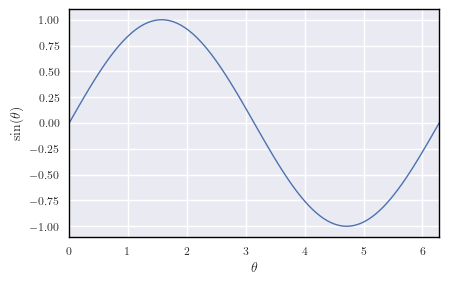

In [23]:
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

import numpy as np
import matplotlib.pyplot as plt

# Using seaborn's style
plt.style.use('seaborn')
width = 345
# width = 1000

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams.update(tex_fonts)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 4

x = np.linspace(0, 2*np.pi, 100)
# Initialise figure instance
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
# Plot
ax.plot(x, np.sin(x))
ax.set_xlim(0, 2 * np.pi)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\sin (\theta)$')



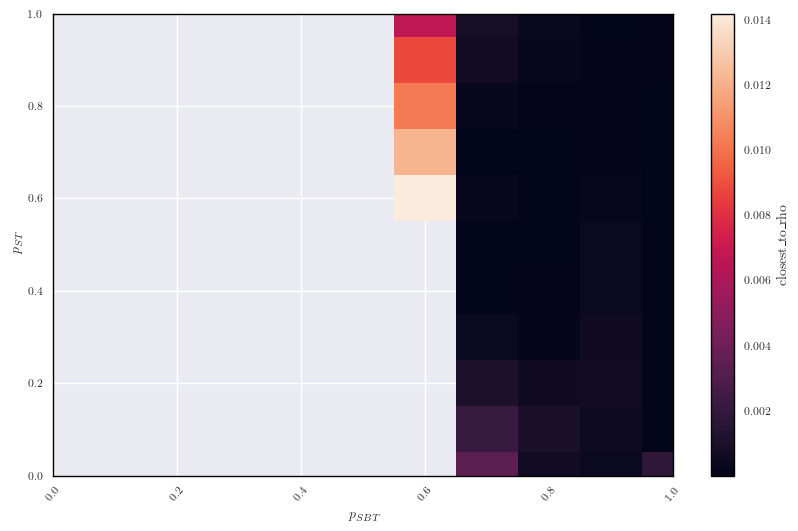

In [67]:
fig, ax = plt.subplots(figsize=(10, 6))

colormesh = ax.pcolormesh(pv.columns, pv.index, pv, cmap=sns.color_palette("rocket", as_cmap=True))

ax.tick_params(axis='x', which='major', rotation=50)
# ax.set_xticks(pv.columns)
# ax.set_yticks(pv.index)

ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

cbar = fig.colorbar(colormesh,ax = ax)

# ax.plot(pbs, rho_crits, color='black')

ax.set_xlabel(r'$p_{SBT}$')
ax.set_ylabel(r'$p_{ST}$')
# ax.set_xlabel('p_SB')

cbar.set_label("closest_to_rho")

Text(0.5, 0.98, ' closest_to_rho ')

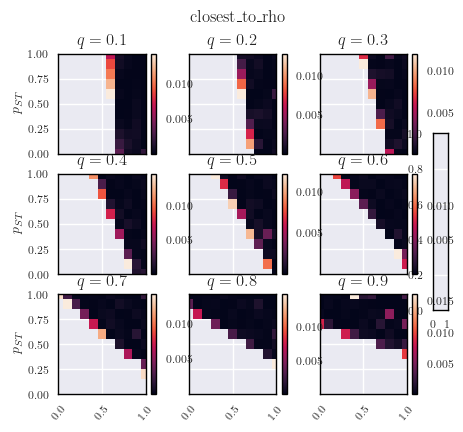

In [101]:

save_ = False

figsize = set_size(width)
figsize = (figsize[0], figsize[1]*1.5)

fig, axs = plt.subplots(3, 3, figsize=figsize, sharey=True, sharex = True)

cbar_ax = fig.add_axes([.91, .3, .03, .4])

qs = np.unique(get_index_row(df2_srho_correct_g_minerrs, 0))

minval = df2_srho_correct_g_minerrs.describe().closest_to_rho["min"]
maxval = df2_srho_correct_g_minerrs.describe().closest_to_rho["max"]

for i, (ax, q) in enumerate(zip(axs.flat, qs)):
    # if i == 11:
    #     continue
    inds2 = np.abs(get_index_row(df2_srho_correct_g_minerrs, 0) - q) < 1e-5
    
    df_temp = df2_srho_correct_g_minerrs[inds2].copy(deep=True)
    if q == 0:
        
        ps_true = np.unique(df_temp.ps)
        
        for ps in np.arange(0,1.1,0.1):
            ps = round(ps, 2)
            if ps == ps_true:
                continue
            # df_temp = df_temp.append(df2_w1000_g[inds2])
            # for i in range(len(df2_w1000_g[inds2])):
            #     df_temp['ps'][-i-1] = ps
            for ind, row in df2_srho_correct_g_minerrs[inds2].iterrows():
                new_ind = (ind[0], ind[1], ps)
                row.ps = ps
                # df_temp[new_ind] = row
                df_temp = df_temp.append(row, ignore_index = True)
                # print(ps)
    elif q == 1.:
        continue
        ph_true = np.unique(df_temp.p)
        
        for ph in np.arange(0,1.1,0.1):
            ph = round(ph, 2)
            if ph == ph_true:
                continue
            # df_temp = df_temp.append(df2_w1000_g[inds2])
            # for i in range(len(df2_w1000_g[inds2])):
            #     df_temp['ps'][-i-1] = ps
            for ind, row in df2_srho_correct_g_minerrs[inds2].iterrows():
                new_ind = (ind[0], ps, ind[2])
                row.p = ph
                # df_temp[new_ind] = row
                df_temp = df_temp.append(row, ignore_index = True)
                # print(ps)

    # df_temp
    
    pv = pd.pivot_table(df_temp, values = "closest_to_rho", index = "ps", columns = "p")
    # print(pv)
    colormesh = ax.pcolormesh(pv.columns, pv.index, pv, cmap=sns.color_palette("rocket", as_cmap=True))

    ax.tick_params(axis='x', which='major', rotation=50)
    # ax.set_xticks(pv.columns)
    # ax.set_yticks(pv.index)
    
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    cbar = fig.colorbar(colormesh,ax = ax)

    # ax.set_xlabel(r'$p_{SBT}$')
    # ax.set_ylabel(r'$p_{ST}$')
    # # ax.set_xlabel('p_SB')

    # cbar.set_label("closest_to_rho")

    ax.set_title(r'$q={q}$'.format(q=round(q, 2)))
    
    # fmt = '{:0.1f}'
    # xticklabels = []
    # for item in ax.get_xticklabels():
    #     item.set_text(fmt.format(float(item.get_text())))
    #     xticklabels += [item]
        
    # if len(ax.get_yticklabels()) > 0:
    #     # print(q)
    #     yticklabels = []
        
    #     for item in ax.get_yticklabels():
    #         item.set_text(fmt.format(float(item.get_text())))
    #         yticklabels += [item]
    # else:
    #     yticklabels2 = []
    #     for item in yticklabels:
    #         item.set_text(fmt.format(float(item.get_text())))
    #         yticklabels2 += [item]
    #     ax.set_yticklabels(yticklabels2)
    
    
    if i%3 == 0:
        # print(yticklabels)
        # ax.set_yticklabels(yticklabels)
        # print(ax.get_yticklabels())
        ax.set_ylabel(r'$p_{ST}$')
    else:
        # print(ax.get_yticklabels())
        ax.set_ylabel('')
        ax.tick_params(left=False)
        # print(yticklabels)
    if i == 10:
        ax.set_xlabel(r'$p_{SBT}$')
    else:
        ax.set_xlabel('')
    if i < 9:
        ax.tick_params(bottom=False)
    # else:
        # ax.set_xticklabels(xticklabels)
    # else: break

# axs.fla

fig.suptitle(' closest_to_rho ')

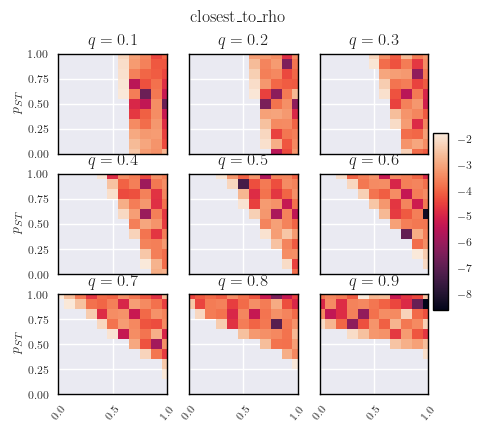

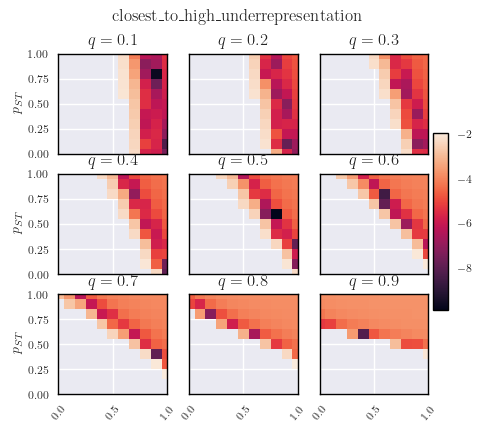

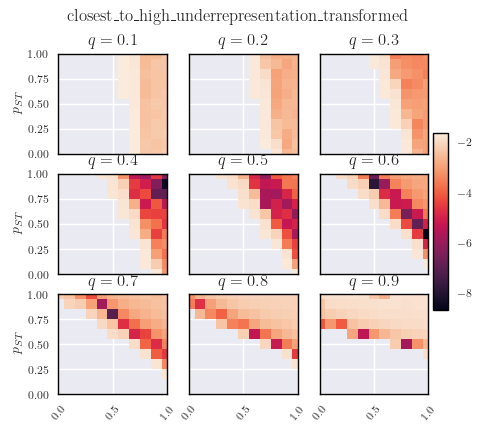

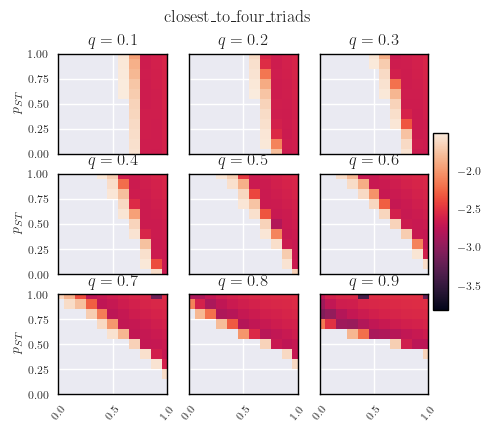

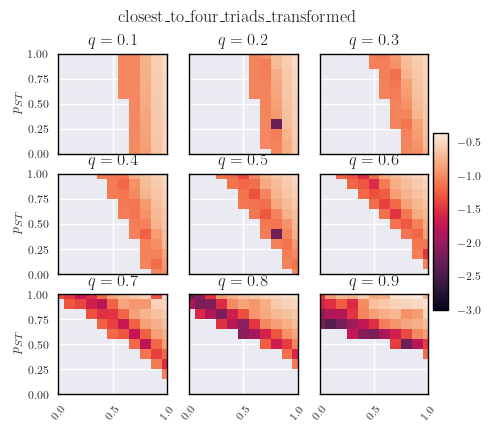

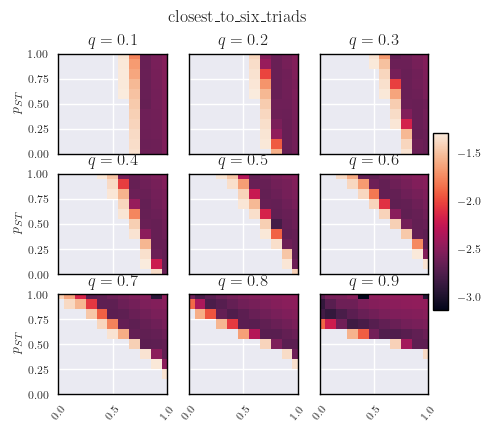

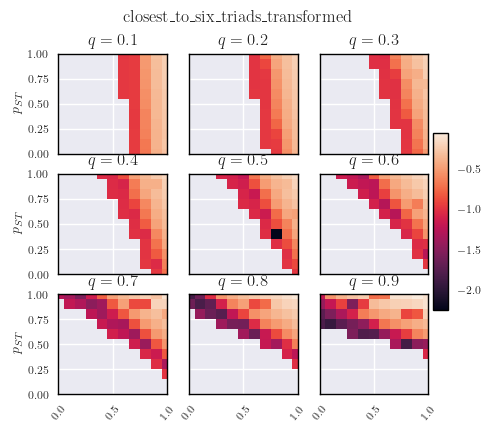

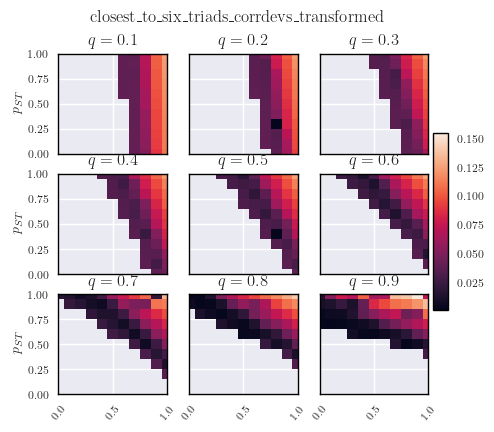

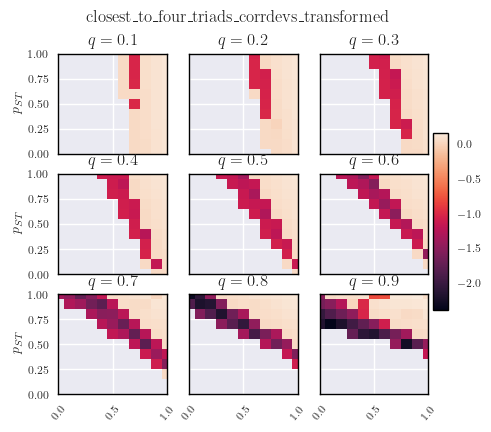

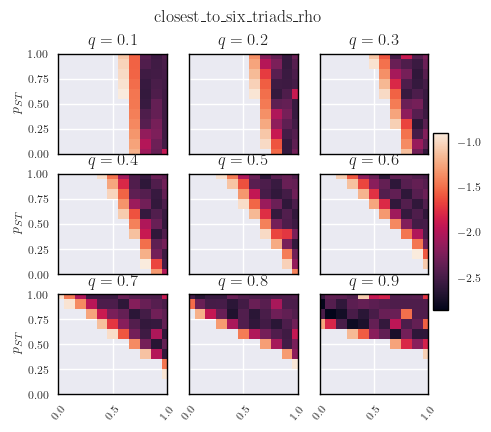

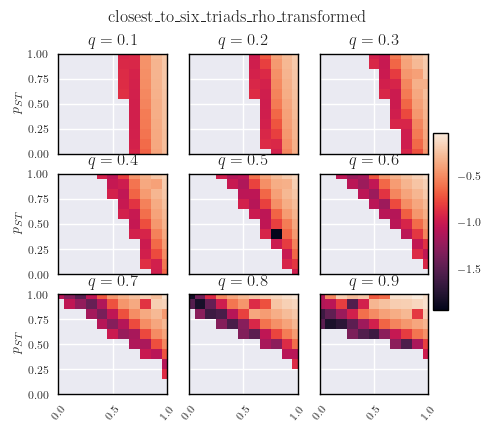

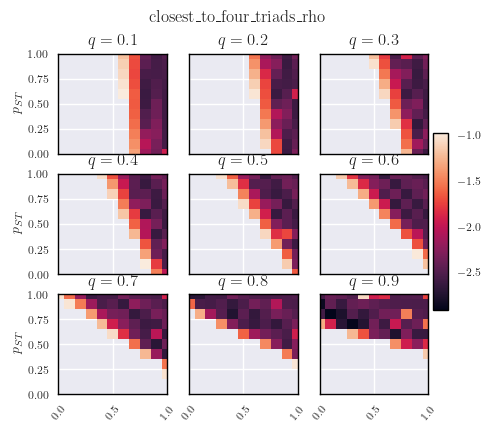

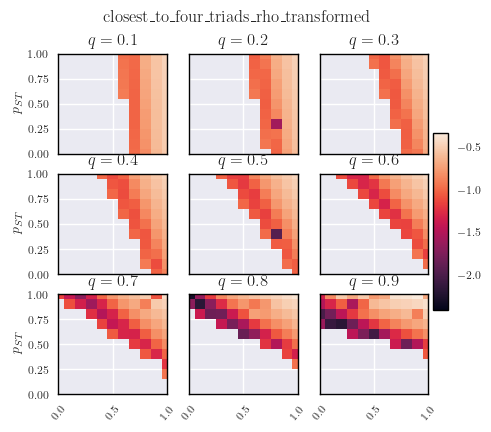

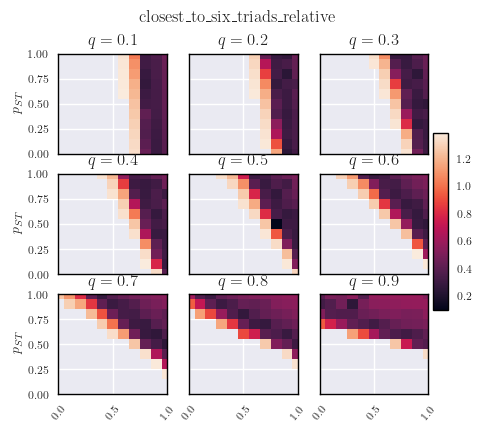

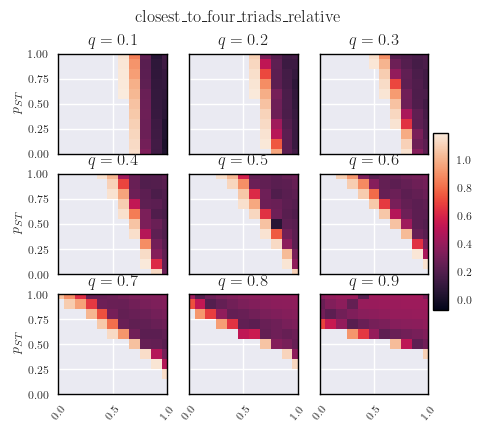

In [102]:

save_ = False
log = True

for error_fun in error_functions:
    error_fun_name = error_fun.__name__

    figsize = set_size(width)
    figsize = (figsize[0], figsize[1]*1.5)

    fig, axs = plt.subplots(3, 3, figsize=figsize, sharey=True, sharex = True)

    cbar_ax = fig.add_axes([.91, .3, .03, .4])

    qs = np.unique(get_index_row(df2_srho_correct_g_minerrs, 0))

    minval = df2_srho_correct_g_minerrs.describe()[error_fun_name]["min"]
    maxval = df2_srho_correct_g_minerrs.describe()[error_fun_name]["max"]
    if log:
        minval = np.log10(minval)
        maxval = np.log10(maxval)
    
    for i, (ax, q) in enumerate(zip(axs.flat, qs)):
        # if i == 11:
        #     continue

        inds2 = np.abs(get_index_row(df2_srho_correct_g_minerrs, 0) - q) < 1e-5
    
        df_temp = df2_srho_correct_g_minerrs[inds2].copy(deep=True)
        if q == 0:
            continue
            ps_true = np.unique(df_temp.ps)
            
            for ps in np.arange(0,1.1,0.1):
                ps = round(ps, 2)
                if ps == ps_true:
                    continue
                # df_temp = df_temp.append(df2_w1000_g[inds2])
                # for i in range(len(df2_w1000_g[inds2])):
                #     df_temp['ps'][-i-1] = ps
                for ind, row in df2_srho_correct_g_minerrs[inds2].iterrows():
                    new_ind = (ind[0], ind[1], ps)
                    row.ps = ps
                    # df_temp[new_ind] = row
                    df_temp = df_temp.append(row, ignore_index = True)
                    # print(ps)
        elif q == 1.:
            continue
            ph_true = np.unique(df_temp.p)
            
            for ph in np.arange(0,1.1,0.1):
                ph = round(ph, 2)
                if ph == ph_true:
                    continue
                # df_temp = df_temp.append(df2_w1000_g[inds2])
                # for i in range(len(df2_w1000_g[inds2])):
                #     df_temp['ps'][-i-1] = ps
                for ind, row in df2_srho_correct_g_minerrs[inds2].iterrows():
                    new_ind = (ind[0], ps, ind[2])
                    row.p = ph
                    # df_temp[new_ind] = row
                    df_temp = df_temp.append(row, ignore_index = True)
                    # print(ps)

        # df_temp
        
        pv = pd.pivot_table(df_temp, values = error_fun_name, index = "ps", columns = "p")
        if log == True:
            pv = np.log10(pv)
        colormesh = ax.pcolormesh(pv.columns, pv.index, pv, cmap=sns.color_palette("rocket", as_cmap=True),
                                  vmin = minval, vmax = maxval)

        ax.tick_params(axis='x', which='major', rotation=50)
        # ax.set_xticks(pv.columns)
        # ax.set_yticks(pv.index)
        
        ax.set_xlim([0,1])
        ax.set_ylim([0,1])

        if i == 0:
            cbar = fig.colorbar(colormesh,cax = cbar_ax)#, fraction=0.046, pad=0.04)#,vmin = minval, vmax = maxval)
        
        
        # sns.heatmap(pv, square = True, ax = ax, cbar_ax = cbar_ax, cbar = i == 0, vmin = minval, vmax = maxval)
        
        ax.set_title(r'$q={q}$'.format(q=round(q, 2)))
        
        # fmt = '{:0.1f}'
        # xticklabels = []
        # for item in ax.get_xticklabels():
        #     item.set_text(fmt.format(float(item.get_text())))
        #     xticklabels += [item]
            
        # if len(ax.get_yticklabels()) > 0:
        #     # print(q)
        #     yticklabels = []
            
        #     for item in ax.get_yticklabels():
        #         item.set_text(fmt.format(float(item.get_text())))
        #         yticklabels += [item]
        # else:
        #     yticklabels2 = []
        #     for item in yticklabels:
        #         item.set_text(fmt.format(float(item.get_text())))
        #         yticklabels2 += [item]
        #     ax.set_yticklabels(yticklabels2)
        
        if i%3 == 0:
            # print(yticklabels)
            # ax.set_yticklabels(yticklabels)
            # print(ax.get_yticklabels())
            ax.set_ylabel(r'$p_{ST}$')
        else:
            # print(ax.get_yticklabels())
            ax.set_ylabel('')
            ax.tick_params(left=False)
            # print(yticklabels)
        if i == 10:
            ax.set_xlabel(r'$p_{SBT}$')
        else:
            ax.set_xlabel('')
        if i < 9:
            ax.tick_params(bottom=False)
        # else:
            # ax.set_xticklabels(xticklabels)
    
    fig.suptitle(error_fun_name)
    
    if save_:
        fname = "maps/map_long2_" + error_fun_name
        # fname = fname + filename_addon
        if log:
            fname = fname + "_log"
        fname = fname + ".pdf"
        
        fig.savefig(fname, format='pdf', bbox_inches='tight') 

## Barplots

In [24]:

def plot_bar_nets(ax, ydata, yerr, triads_set, title, labels, 
                  line_level = 1/3, linewidth = 2, colors=None, 
                  width = 0.15, smallest_edge = False, m = 1,
                  legend_elem = 3, real_net_data = None, additional_label_data = None, real_net_additional_label_data = None):
    n_simulated = ydata.copy()
    if yerr is not None:
        n_err = yerr.copy()
    else:
        n_err = None   
    if real_net_data is not None:
        data_name = real_net_data.columns[0]
        real_data = [val[0] for val in real_net_data.values]
        n_simulated[data_name] = real_data
        if yerr is not None:
            real_data_std = np.full(len(n_simulated.index), np.nan)
            n_err[data_name] = real_data_std
#     width = 0.15
    multiplier = 0
    x = np.arange(len(n_simulated.index))*3-1.5
    for i, col in enumerate(n_simulated.columns):
        offset = multiplier*width*4
        if labels is not None:
            label = labels[i]
        else:
            # label = col
            # print(col)
            if len(col) == 3:
                q, p, ps = col
            elif len(col) == 4:
                _, q, p, ps = col
            elif len(col) == 5:
                _, q, p, ps, step = col
            # elif len(col) == 1:
            #     if real_net_data is not None:
            #     else:
            #         raise ValueError("column contains array with only one value")
            else:
                q, p, ps = col[:3]
            if (i + 1 == len(n_simulated.columns)) and (real_net_data is not None):
                label = col[0]
                if real_net_additional_label_data is not None:
                    # print(real_net_additional_label_data)
                    label += r": $\rho={rho}$".format(rho = round(real_net_additional_label_data, 2))
            elif legend_elem == 3:
                label = r"$q={q},p_{{SBT}}={p},p_{{ST}}={ps}$".format(q=round(q,2),p=round(p,2),ps=round(ps,2))
                if additional_label_data is not None:
                    label += r"$,\rho={rho}$".format(rho = round(additional_label_data[i], 2))
            elif legend_elem == 4:
                rho_init = col[3]
                label = r"$q={q},p_{{SBT}}={p},p_{{ST}}={ps},\rho_{{0}}={rho_init}$".format(q=round(q,2),p=round(p,2),ps=round(ps,2), rho_init=round(rho_init,2))
                if additional_label_data is not None:
                    label += r"$,\rho={rho}$".format(rho = round(additional_label_data[i], 2))
            # print(lab)
        if n_err is not None:
            # print(n_err)
            # print(n_err[i])
            err = n_err[col[:4]]
            if np.any(np.isnan(err)):
                err = None
        else:
            err = None
        
        # print("H")
        if smallest_edge:
            edgecolor = [colors[i] if val else 'none' for ind, val in enumerate(n_simulated[col] < 0.01)]
        else:
            edgecolor = ['none' for ind, val in enumerate(n_simulated[col])]
        # print(n_simulated[col].values)
        # print(colors[i])
        # print(err)
        # print(x+offset)
        # print(label)
        rects = ax.bar(x=x+offset, height=n_simulated[col].values,
                       width=width, label=label, color=colors[i],
                       yerr=err,
                       edgecolor=edgecolor, linewidth=2)
        # ax.bar_label(rects, padding=3)
        # print("D")
        multiplier += m

    # print("F")
    ax.set_ylabel('Relative density')
    ax.set_title(title)
    if linewidth is not None:
        ax.hlines(y=line_level, xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], color='black', linewidth=linewidth, ls='--')
    # ax.legend(loc='best')
    ax.set_xticks(x + width*m+1., triads_set)

def prepare_data4(df_g, triads_set, std_data = None, addon = "_lvl"):
    col_names = triads_set
    if not triads_set[0].endswith(addon):
        if triads_set[0] + addon in df_g.columns:
            col_names = [triad + addon for triad in triads_set]
    # if not triads_set[0].endswith("_lvl"):
    #     col_names = [triad + "_lvl" for triad in triads_set]
    # else:
    #     col_names = triads_set
    ydata = df_g[col_names].copy()
    n_sum = ydata.sum(axis=1)
    for col in ydata.columns:
        ydata[col] = ydata[col] / n_sum.values
    index = [ydata.index]
    if "q" in df_g:
        index.extend([df_g.q, df_g.p, df_g.ps])
    if "step" in df_g:
        index.append(df_g.step)
    ydata = ydata.set_index(index)
    ydata = ydata.transpose()
    if std_data is not None:
        if not isinstance(std_data, pd.DataFrame):
            yerr = std_data.loc[triads_set].copy().div(n_sum)
        else:
            col_names = [triad + addon + "_std" for triad in triads_set]
            yerr = std_data[col_names].copy()
            for col in yerr.columns:
                yerr[col] = yerr[col] / n_sum.values  
            yerr = yerr.transpose()
    else:
        yerr = None
    return ydata, yerr

def prepare_data5(df_g, triads_set, std_data = None, addon = "_lvl"):
    col_names = triads_set
    if not triads_set[0].endswith(addon):
        if triads_set[0] + addon in df_g.columns:
            col_names = [triad + addon for triad in triads_set]
    
    ydata = df_g[col_names].copy()
    n_sum = ydata.sum(axis=1)
    for col in ydata.columns:
        ydata[col] = ydata[col] / n_sum.values - 1/3
    index = [ydata.index]
    if "q" in df_g:
        index.extend([df_g.q, df_g.p, df_g.ps])
    if "step" in df_g:
        index.append(df_g.step)
    ydata = ydata.set_index(index)
    ydata = ydata.transpose()
    if std_data is not None:
        if not isinstance(std_data, pd.DataFrame):
            yerr = std_data.loc[triads_set].copy().div(n_sum)
        else:
            col_names = [triad + addon + "_std" for triad in triads_set]
            # print(col_names)
            yerr = std_data[col_names].copy()
            # print(n_sum.values  )
            for col in yerr.columns:
                yerr[col] = yerr[col] / n_sum.values  
            yerr = yerr.transpose()
    else:
        yerr = None
    return ydata, yerr

def prepare_data3(data, triads_sets_average, triads_set_final, std_data = None, norm_fun = prepare_data4):
    n_datas = [norm_fun(data, triads_set, std_data)[0] for triads_set in triads_sets_average]
    n_data = n_datas[0].append(n_datas[1])
    
    ydata = n_data.loc[triads_set_final]
    ydata = ydata.transpose()
    
    if std_data is not None:
        n_stds = [norm_fun(data, triads_set, std_data)[1] for triads_set in triads_sets_average]
        yerr = n_stds[0].append(n_stds[1])
        
        yerr = yerr.loc[triads_set_final]
        yerr = yerr.transpose()
    else:
        yerr = None
    return ydata, yerr

In [34]:
prepare_data5(df2_rho_gs[0].iloc[[inds_gs3[0][-1]]], n1_triads, addon = "_lvl3")

(              0.95
               0.15
                0.6
                0.5
 q             0.95
 p             0.15
 ps             0.6
 tr3_lvl3  0.008131
 tr5_lvl3 -0.140698
 tr6_lvl3  0.132568,
 None)

In [35]:
prepare_data5(df2_rho_gs[0].iloc[[inds_gs3[0][-1]]], n1_triads)

(             0.95
              0.15
               0.6
               0.5
 q            0.95
 p            0.15
 ps            0.6
 tr3_lvl  0.008053
 tr5_lvl -0.141669
 tr6_lvl  0.133616,
 None)

In [60]:
ydata, yerr = prepare_data5(df2_rho_gs[0].iloc[inds_gs3[0]], n1_triads)
ydata

0.925     0.950     0.875     0.925                         0.950  \
             0.50      0.75      0.25      0.10      0.05      0.40      0.25   
             0.65      0.60      0.80      0.65      0.65      0.60      0.60   
              0.0       0.0       0.9       0.5       0.9       0.5       0.0   
q           0.925     0.950     0.875     0.925     0.925     0.925     0.950   
p            0.50      0.75      0.25      0.10      0.05      0.40      0.25   
ps           0.65      0.60      0.80      0.65      0.65      0.60      0.60   
tr3_lvl -0.035751 -0.040822 -0.033390  0.005557  0.003873 -0.002792 -0.010251   
tr5_lvl -0.089915 -0.096770 -0.087573 -0.125034 -0.118500 -0.102754 -0.135662   
tr6_lvl  0.125666  0.137592  0.120963  0.119477  0.114627  0.105545  0.145913   

                                0.925     0.950            
             0.55      1.00      0.05      0.20      0.15  
             0.55      0.50      0.65      0.60      0.60  
              0.9       0.9       0.9       0.5       0.5  
q           0.950     0.950     0.925     0.950     0.950  
p            0.55      1.00      0.05      0.20      0.15  
ps           0.55      0.50      0.65      0.60      0.60  
tr3_lvl  0.001641 -0.010945  0.003873  0.000744  0.008053  
tr5_lvl -0.138909 -0.115747 -0.118500 -0.146571 -0.141669  
tr6_lvl  0.137268  0.126692  0.114627  0.145827  0.133616

In [61]:

ydata, yerr = prepare_data5(real_datasets[0], n1_triads)
ydata

t11_10
tr3 -0.053023
tr5 -0.036755
tr6  0.089778

/tmp/ipykernel_88913/1355872723.py:44: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0, 0.5, '$\\sin (\\theta)$')

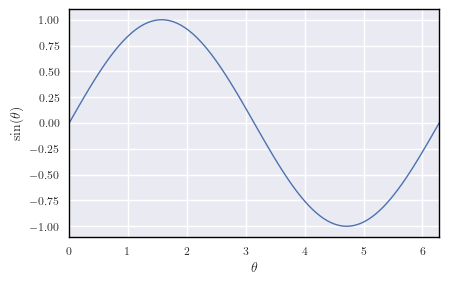

In [141]:
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

import numpy as np
import matplotlib.pyplot as plt

# Using seaborn's style
plt.style.use('seaborn')
width = 345
# width = 1000

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams.update(tex_fonts)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 4

x = np.linspace(0, 2*np.pi, 100)
# Initialise figure instance
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
# Plot
ax.plot(x, np.sin(x))
ax.set_xlim(0, 2 * np.pi)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\sin (\theta)$')



[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7]


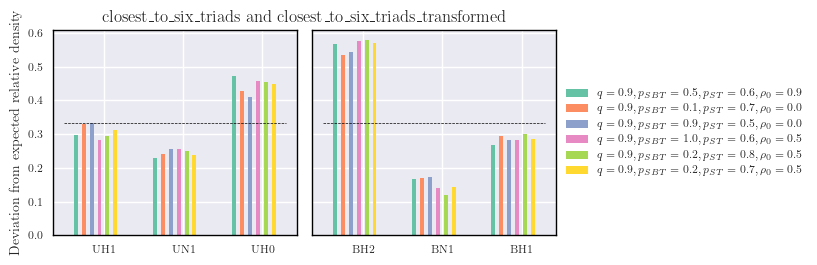

In [49]:
"""Many points
"""


save_ = False
fun_prepare_data = prepare_data4
linewidth = 0.5
orientation = 'h' # 'v' or 'h'
which_ticks = 'zero' #'zero', 'normal'
addon = "_lvl3"
which_group = 0 #there can be `group_size` bars (8 at max). If data has more, which to show
group_size = 6

school_id = 0
inds_g3 = inds_gs3[school_id]

# reverse = True

width = 345
figsize = set_size(width)
# figsize = (figsize[0] * 1.7, figsize[1])

# sim_data = mean_data.copy()
# sim_data_std = std_data.copy()
# real_data = results_realnet.copy()
# if reverse:
#     order = results_realnet.columns.tolist()
#     order.reverse()
#     real_data = results_realnet[order]
    
#     order = mean_data.columns.tolist()
#     order.reverse()
#     sim_data = sim_data[order]
#     std_data_std = std_data[order]

# triads = ['tr2', 'tr6', 'tr5', 'tr1']
all_sets = [n1_triads, n2_triads]

if orientation == 'v':
    figsize = (figsize[0] , figsize[1] * 1.5)
elif orientation == 'h':
    figsize = (figsize[0]*1.8 , figsize[1])

if fun_prepare_data == prepare_data5:
    line_level = 0
else:
    line_level = 1/3


if orientation == 'v':
    fig, axes = plt.subplots(2, 1, figsize=figsize, sharey=True)
elif orientation == 'h':
    fig, axes = plt.subplots(1, 2, figsize=figsize, sharey=True)
# fig, axes = plt.subplots(1, 1, figsize=figsize, sharey=True)

# Simulated nets
colors = sns.color_palette("Set2").as_hex()[:20]
# sim_labels = [r'$q={q:.2f}$'.format(q=q) for q in sim_data.columns.values]
# print(sim_labels)

triads_set = n1_triads
ydata, yerr = fun_prepare_data(df2_rho_gs[school_id].iloc[inds_g3],  triads_set, 
                               std_data = None, addon = addon)

ydata = ydata[ydata.columns[group_size*which_group:group_size*(which_group+1)]]
ydata = ydata.loc[:,~ydata.columns.duplicated()].copy() 
# yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]

title = r'$\Delta_1$'
plot_bar_nets(axes[0], ydata, None, triads_set, None, labels = None, 
              line_level = line_level, linewidth = linewidth, colors=colors, 
              width = 0.15, smallest_edge = True, m = 0.5, legend_elem = 4)
# plot_bar_simulatednets(ax=axes[sim_pos, 1], triads_set=n2_triads, title='n2', labels=sim_labels, colors=colors)
triads_set = n2_triads
ydata, yerr = fun_prepare_data(df2_rho_gs[school_id].iloc[inds_g3],  triads_set, 
                               std_data = None, addon = addon)

ydata = ydata[ydata.columns[group_size*which_group:group_size*(which_group+1)]]
ydata = ydata.loc[:,~ydata.columns.duplicated()].copy()
# yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]

title = r'$\Delta_2$'

plot_bar_nets(axes[1], ydata, None, triads_set, None, 
              labels = None, line_level = line_level, 
              linewidth = linewidth, colors=colors, 
              width = 0.15, smallest_edge = True, m = 0.5, legend_elem = 4)


# fix tick rotations
for ax in axes.flatten():
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)
# fix tick labels
for ax in axes.flatten():
    ax.set_xticklabels([triad_names_map[tick.get_text()] for tick in ax.get_xticklabels()])
# drop double legend
for i in range(2):
#     axes[i, 1].get_legend().remove()
#     axes[i,1].set_ylabel('')
    # set legend to left top corner
    if i==1:
        axes[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axes[i].set_ylabel('')
    
ticks = axes[i].get_yticklabels()
ticks = axes[i].get_yticks()
print(ticks)
if which_ticks == "normal":
    ticks2 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]) - 1/3
    axes[1].set_yticks(ticks2)
    # axes[i,0].set_yticks(ticks - 0.1)
    axes[i].set_yticklabels([r'{tick:.1f}'.format(tick=tick+1/3) for tick in ticks2])
# else:
#     axes[1].set_yticks([-0.2, -0.1, 0, 0.1, 0.2])
    
    
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
# plt.xlabel("common X")
plt.ylabel("Deviation from expected relative density")

try:
    plt.title(error_functions[0 + which_group*2].__name__ + " and " + error_functions[1 + which_group*2].__name__)
except IndexError:
    plt.title(error_functions[0 + which_group*2].__name__)

fname = 'barplots_sim'
fname = fname + "_down"

fname = fname + "_" + orientation
fname = fname + "_" + which_ticks

fname = fname + "_" + str(which_group)

# if reverse is True:
#     fname = fname + "_rev"

if linewidth is None:
    fname = fname + "_noline"

fig.tight_layout()
plt.show()
if save_:
    fname = fname + ".pdf"
    fig.savefig(fname, format='pdf', bbox_inches='tight') 

In [351]:
inds_g3[group_size*which_group:group_size*(which_group+1)]

[168, 164, 165, 127, 164, 67]

In [184]:
real_data

tr0       tr1       tr2       tr3       tr4       tr5       tr6  \
t11_8  0.007097  0.037092  0.010712  0.044055  0.022228  0.042046  0.074317   

            tr7       T  L_plus       L      rho   Tr0    Tr1   Tr2    Tr3  \
t11_8  0.762453  7468.0  1561.0  1831.0  0.85254  53.0  277.0  80.0  329.0   

         Tr4    Tr5    Tr6     Tr7  
t11_8  166.0  314.0  555.0  5694.0

In [187]:
real_datasets_trans[school_id]

tr1       tr2       tr3      tr4       tr5       tr6       T  \
t11_7  0.346141 -0.223121 -0.044287 -0.12302 -0.024003  0.068289  5704.0   

       L_plus       L       rho   Tr0    Tr1    Tr2    Tr3    Tr4    Tr5  \
t11_7   789.0  1040.0  0.758654  89.0  672.0  109.0  285.0  208.0  305.0   

         Tr6     Tr7  
t11_7  396.0  3640.0

In [188]:
real_datasets[school_id]

tr0       tr1       tr2       tr3       tr4       tr5       tr6  \
t11_7  0.015603  0.117812  0.019109  0.049965  0.036466  0.053471  0.069425   

            tr7       T  L_plus       L       rho   Tr0    Tr1    Tr2    Tr3  \
t11_7  0.638149  5704.0   789.0  1040.0  0.758654  89.0  672.0  109.0  285.0   

         Tr4    Tr5    Tr6     Tr7  
t11_7  208.0  305.0  396.0  3640.0

### Notes 

#### t11_10

* I like $q=0.9$, $p_{SBT} = 0.3$, $p_{ST} = 0.6$, $\rho_0=0.4$ (good discrepancies for Delta 2, weak for Delta1; best in closest to rho, 6 triads rho, 4 triads rho, )
* I like $q=0.9$, $p_{SBT} = 0.0$, $p_{ST} = 0.7$, $\rho_0=0.0$ (good discrepancies for Delta 2, weak for Delta1; best in closest to high underrep trans, 6 triads trans, 6 triads rel, )
* I like $q=0.9$, $p_{SBT} = 0.8$, $p_{ST} = 0.5$, $\rho_0=0.9$ (very good discrepancies for Delta 2, weak for Delta1; best in closest to high underrep, , 4 triads trans, 4 triads corrdev trans, 6 triads rho trans, 4 triads rho trans, 4 triads rel)
* I like $q=0.9$, $p_{SBT} = 0.8$, $p_{ST} = 0.5$, $\rho_0=0.8$ (very good discrepancies for Delta 2, weak for Delta1; best in closest to high underrep, 4 triads trans, 6 triads trans, 4 triads corrdev trans, 6 triads rho trans, 4 triads rel)
* I like $q=0.9$, $p_{SBT} = 0.4$, $p_{ST} = 0.6$, $\rho_0=0.0$ (very good discrepancies for Delta 2, weak for Delta1; best in closest to high underrep, 6 triads rel)
* I like $q=0.9$, $p_{SBT} = 0.4$, $p_{ST} = 0.6$, $\rho_0=0.2$ (very good discrepancies for Delta 2, weak for Delta1; best in closest to high underrep trans, 4 triads rho trans, 6 triads rel, 4 triads rel )
* I like $q=0.9$, $p_{SBT} = 0.4$, $p_{ST} = 0.6$, $\rho_0=0.4$ (very good discrepancies for Delta 2, weak for Delta1; best in closest to high underrep trans, , 4 triads trans, 6 triads trans, 4 triads corrdev trans, 6 triads rho trans, 4 triads rho trans, )

#### t11_9

* I like $q=0.7$, $p_{SBT} = 0.3$, $p_{ST} = 0.9$, $\rho_0=0.4$ (good discrepancies for Delta 2, quite good for Delta1; best in closest to high underrep, )
* I like $q=0.9$, $p_{SBT} = 0.2$, $p_{ST} = 0.7$, $\rho_0=0.4$ (very good discrepancies for Delta 2, good for Delta1; best in closest to high underrep trans, )
* I like $q=0.9$, $p_{SBT} = 0.2$, $p_{ST} = 0.7$, $\rho_0=0.2$ (very good discrepancies for Delta 2, good for Delta1; best in closest to high underrep trans, )
* I like $q=0.9$, $p_{SBT} = 0.1$, $p_{ST} = 0.7$, $\rho_0=0.9$ (very good discrepancies for Delta 2, good for Delta1; best in closest to high underrep trans, 6 triads, 6 triads corrdev trans, 6 triads rho trans, 4 triads rho trans, )
* I like $q=0.9$, $p_{SBT} = 0.1$, $p_{ST} = 0.7$, $\rho_0=0.8$ (very good discrepancies for Delta 2, good for Delta1; best in closest to 4 triads trans, 6 triads trans, 6 triads corrdev trans, 4 triads corrdev trans, 6 triads rho trans, 4 triads rho trans, )
* I like $q=0.9$, $p_{SBT} = 0.1$, $p_{ST} = 0.7$, $\rho_0=0.4$ (very good discrepancies for Delta 2, good for Delta1; best in closest to 4 triads trans, 6 triads trans, 6 triads corrdev trans, 4 triads corrdev trans, 6 triads rho trans,  4 triads rho trans, )
* I like $q=0.9$, $p_{SBT} = 0.9$, $p_{ST} = 0.5$, $\rho_0=0.2$ (very good discrepancies for Delta 2, weak for Delta1; best in closest to 4 triads, 4 triads rel)
* I like $q=0.9$, $p_{SBT} = 0.5$, $p_{ST} = 0.6$, $\rho_0=0.8$ (perfect good discrepancies for Delta 2, weak for Delta1; best in closest to 4 triads, 4 triads trans, 6 triads, 6 triads trans, 4 triads corrdev trans, )
* I like $q=0.9$, $p_{SBT} = 0.5$, $p_{ST} = 0.6$, $\rho_0=0.6$ (very good discrepancies for Delta 2, weak for Delta1; best in closest to 6 triads, )

#### t11_8


* I like $q=0.7$, $p_{SBT} = 0.3$, $p_{ST} = 0.9$, $\rho_0=0.9$ (very good discrepancies for Delta 2, quite good for Delta1; best in closest to rho, )
* I like $q=0.6$, $p_{SBT} = 0.6$, $p_{ST} = 0.8$, $\rho_0=0.2$ (weak discrepancies for Delta 2, good for Delta1; best in closest to high underrep, )
* I like $q=0.8$, $p_{SBT} = 0.4$, $p_{ST} = 0.8$, $\rho_0=0.2$ (very good discrepancies for Delta 2, very good for Delta1; best in closest to high underrep trans, )
* I like $q=0.8$, $p_{SBT} = 0.4$, $p_{ST} = 0.8$, $\rho_0=0.4$ (perfect discrepancies for Delta 2, very good for Delta1; best in closest to 4 triads trans, 6 triads trans, 6 triads corrdev trans, 4 triads corrdev trans, )
* I like $q=0.8$, $p_{SBT} = 0.1$, $p_{ST} = 0.9$, $\rho_0=0.8$ (very good discrepancies for Delta 2, good for Delta1; best in closest to 4 triads, 4 triads rel, )
* I like $q=0.8$, $p_{SBT} = 0.1$, $p_{ST} = 0.9$, $\rho_0=0.9$ (perfect discrepancies for Delta 2, good for Delta1; best in closest to 4 triads, 4 triads rho trans, 6 triads rho trans, 4 triads rel)
* I like $q=0.8$, $p_{SBT} = 0.4$, $p_{ST} = 0.7$, $\rho_0=0.9$ (perfect discrepancies for Delta 2, good for Delta1; best in closest to 4 triads, 6 triads, 6 triads rho, 6 triads rel, 4 triads rho, )
* I like $q=0.8$, $p_{SBT} = 0.3$, $p_{ST} = 0.8$, $\rho_0=0.8$ (perfect discrepancies for Delta 2, very good for Delta1; best in closest to 4 triads trans, 6 triads trans, 6 triads corrdev trans, 4 triads corrdev trans, )
* I like $q=0.8$, $p_{SBT} = 0.3$, $p_{ST} = 0.8$, $\rho_0=0.6$ (perfect discrepancies for Delta 2, good for Delta1; best in closest to 6 triads, )
* I like $q=0.8$, $p_{SBT} = 0.3$, $p_{ST} = 0.8$, $\rho_0=0.4$ (perfect discrepancies for Delta 2, quite good for Delta1; best in closest to 4 triads rho trans, 4 triads rel)
* I like $q=0.8$, $p_{SBT} = 0.0$, $p_{ST} = 1.0$, $\rho_0=0.6$ (perfect discrepancies for Delta 2, very good for Delta1; best in closest to 4 triads trans, 6 triads trans, 6 triads corrdev trans, 4 triads corrdev trans, )
* I like $q=0.8$, $p_{SBT} = 0.0$, $p_{ST} = 1.0$, $\rho_0=0.0$ (good discrepancies for Delta 2, almost perfect for Delta1; best in closest to 4 triads rho trans, 6 triads rho trans, )
* I like $q=0.9$, $p_{SBT} = 0.0$, $p_{ST} = 0.8$, $\rho_0=0.0$ (good discrepancies for Delta 2, very good for Delta1; best in closest to 6 triads rho, )

#### t11_7

Comment: 
1. Here, the results are not good. One reason might be that this dataset is strange. There are only 40 parameter sets that give simulations close to the defined range of rho and they converge. Out of those that do not converge, most of them are just very high rho (and my stopping alg didn't catch them), soit is not the case of convergence. 
2. I also noticed that more dense simulations might be needed. For instance (0.9, 0.0, 0.7, 0.9) ended up below proper $\rho$ range, while (0.9, 0.0, 0.8, 0.9) has reached almost paradise (the same with (0.9, 0.0.1, 0.7, 0.9)). 


* I like $q=0.7$, $p_{SBT} = 0.1$, $p_{ST} = 1.0$, $\rho_0=0.9$ (good discrepancies for Delta 2, weak for Delta1; best in closest to high underrep, high underrep trans, closest to 4 triads trans, 6 triads trans, 4 triads corrdev trans, 6 triads rho trans, 4 triads rho trans, 6 triads rel, 4 triads rel, )
* I like $q=0.7$, $p_{SBT} = 0.1$, $p_{ST} = 1.0$, $\rho_0=0.6$ (good discrepancies for Delta 2, weak for Delta1; best in closest to high underrep trans, closest to 4 triads trans, closest to 6 triads, 6 triads trans, 4 triads corrdev trans, 6 triads rho, 6 triads rho trans, 4 triads rho trans, 6 triads rel, 4 triads rel, )
* I like $q=0.6$, $p_{SBT} = 0.3$, $p_{ST} = 1.0$, $\rho_0=0.2$ (weak discrepancies for Delta 2, weak for Delta1; best in closest to rho, 6 triads corrdev trans, 6 triads rho, )
* I like $q=0.8$, $p_{SBT} = 0.1$, $p_{ST} = 0.8$, $\rho_0=0.8$ (good discrepancies for Delta 2, weak for Delta1; best in closest to 6 triads trans, 4 triads corrdev trans, 6 triads rho trans, 4 triads rho trans, )
* I like $q=1.0$, $p_{SBT} = 0.4$, $p_{ST} = 0.5$, $\rho_0=0.8$ (good discrepancies for BH2, BH1, UH1, too big overrep for UH0, nonhierarchical triads vanish; best in closest to 6 triads rel, 4 triads, 4 triads trans, 6 triads rel, )

#### t11_6

* I like $q=0.8$, $p_{SBT} = 0.4$, $p_{ST} = 0.7$, $\rho_0=0.8$ (very good discrepancies for Delta 2, very good for Delta1; best in closest to high underrep)
* I like $q=0.8$, $p_{SBT} = 0.4$, $p_{ST} = 0.7$, $\rho_0=0.6$ (very good discrepancies for Delta 2, good for Delta1; best in closest to high underrep trans)
* I like $q=0.8$, $p_{SBT} = 0.0$, $p_{ST} = 0.9$, $\rho_0=0.9$ (very good discrepancies for Delta 2, very good for Delta1; best in closest to high underrep trans)
* I like $q=0.8$, $p_{SBT} = 0.0$, $p_{ST} = 0.9$, $\rho_0=0.2$ (very good discrepancies for Delta 2, very good for Delta1; best in closest to 4 triads trans, 6 triads trans, 4 triads corrdev trans, 6 triads rho trans, )
* I like $q=0.8$, $p_{SBT} = 0.1$, $p_{ST} = 0.9$, $\rho_0=0.2$ (very good discrepancies for Delta 2, good for Delta1; best in closest to high underrep trans, 4 triads, 6 triads, )
* I like $q=0.8$, $p_{SBT} = 0.2$, $p_{ST} = 0.8$, $\rho_0=0.6$ (very good discrepancies for Delta 2, good for Delta1; best in closest to 4 triads trans, 4 triads corrdev trans, 6 triads rho trans, 4 triads rho trans, )
* I like $q=0.8$, $p_{SBT} = 0.2$, $p_{ST} = 0.8$, $\rho_0=0.0$ (very good discrepancies for Delta 2, good for Delta1; best in closest to 4 triads trans, 4 triads corrdev trans, )
* I like $q=0.7$, $p_{SBT} = 0.8$, $p_{ST} = 0.5$, $\rho_0=0.0$ (very good discrepancies for Delta 2, good for Delta1; best in closest to high underrep, 6 triads rel, 4 triads rel)
* I like $q=0.7$, $p_{SBT} = 0.3$, $p_{ST} = 0.9$, $\rho_0=0.0$ (very good discrepancies for Delta 2, very good for Delta1; best in closest to 6 triads trans, 6 triads rho trans, )
* I like $q=0.4$, $p_{SBT} = 0.7$, $p_{ST} = 0.7$, $\rho_0=0.0$ (good discrepancies for Delta 2 (too small), good for Delta1 (too small); best in closest to 6 triads corrdev trans, 6 triads rel)

#### t11_5

* I like $q=0.7$, $p_{SBT} = 0.2$, $p_{ST} = 0.9$, $\rho_0=0.0$ (good discrepancies for Delta 2, good for Delta1; best in closest to rho)
* I like $q=0.7$, $p_{SBT} = 0.1$, $p_{ST} = 1.0$, $\rho_0=0.2$ (good discrepancies for Delta 2, good for Delta1; best in closest to high underrep)
* I like $q=0.7$, $p_{SBT} = 0.1$, $p_{ST} = 1.0$, $\rho_0=0.6$ (good discrepancies for Delta 2, good for Delta1; best in closest to high underrep)
* I like $q=0.8$, $p_{SBT} = 1.0$, $p_{ST} = 0.4$, $\rho_0=0.9$ (good discrepancies for Delta 2, good for Delta1; best in closest to 4 triads, 6 triads, 6 triads rho, 4 triads rho,  )
* I like $q=0.8$, $p_{SBT} = 0.1$, $p_{ST} = 0.8$, $\rho_0=0.9$ (good discrepancies for Delta 2, good for Delta1; best in closest to 6 triads corrdev trans, 6 triads rho, )
* I like $q=0.8$, $p_{SBT} = 0.1$, $p_{ST} = 0.8$, $\rho_0=0.6$ (good discrepancies for Delta 2, good for Delta1; best in closest to 4 triads rho, )
* I like $q=0.9$, $p_{SBT} = 0.4$, $p_{ST} = 0.6$, $\rho_0=0.0$ (very good discrepancies for Delta 2, not that good for Delta1 (too big); best in closest to high underrep trans, 4 triads, 4 triads trans, 6 triads trans, 6 triads corrdev trans, 4 triads corrdev trans, 6 triads rho trans, 4 triads rho trans, 6 triads rel, 4 triads rel)
* I like $q=0.9$, $p_{SBT} = 0.8$, $p_{ST} = 0.5$, $\rho_0=0.8$ (very good discrepancies for Delta 2, not that good for Delta1 (too big); best in closest to high underrep trans, 4 triads trans, 6 triads trans, 4 triads corrdev trans, 6 triads rho trans, 4 triads rho trans, )


#### t11_4

* I like $q=0.7$, $p_{SBT} = 0.0$, $p_{ST} = 0.9$, $\rho_0=0.4$ (poor discrepancies for Delta 2 (wrong overrep), very good for Delta1; best in closest to high underrep trans)
* I like $q=0.7$, $p_{SBT} = 0.2$, $p_{ST} = 0.8$, $\rho_0=0.9$ (poor discrepancies for Delta 2 (wrong overrep), very good for Delta1; best in closest to high underrep trans)
* I like $q=0.7$, $p_{SBT} = 0.4$, $p_{ST} = 0.7$, $\rho_0=0.0$ (poor discrepancies for Delta 2 (wrong overrep), very good for Delta1; best in closest to high underrep trans)
* I like $q=0.7$, $p_{SBT} = 0.5$, $p_{ST} = 0.6$, $\rho_0=0.9$ (poor discrepancies for Delta 2 (wrong overrep), very good for Delta1; best in closest to 6 triads rel, 4 triads rel)
* I like $q=0.6$, $p_{SBT} = 0.1$, $p_{ST} = 1.0$, $\rho_0=0.2$ (poor discrepancies for Delta 2 (wrong overrep), very good for Delta1; best in closest to 4 triads trans, 4 triads corrdev trans, 6 triads rel, 4 triads rel,)
* I like $q=0.6$, $p_{SBT} = 0.1$, $p_{ST} = 1.0$, $\rho_0=0.9$ (poor discrepancies for Delta 2 (wrong overrep), very good for Delta1; best in closest to 4 triads trans, 4 triads corrdev trans, )
* I like $q=0.6$, $p_{SBT} = 0.5$, $p_{ST} = 0.7$, $\rho_0=0.8$ (poor discrepancies for Delta 2 (wrong overrep), very good for Delta1; best in closest to 4 triads trans, 6 triads trans, 4 triads corrdev trans, 6 triads rho trans, 4 triads rho trans, )
* I like $q=0.6$, $p_{SBT} = 0.7$, $p_{ST} = 0.5$, $\rho_0=0.4$ (poor discrepancies for Delta 2 (wrong overrep), very good for Delta1; best in closest to 6 triads trans, 6 triads rho trans, 4 triads rho trans, )
* I like $q=0.6$, $p_{SBT} = 0.9$, $p_{ST} = 0.3$, $\rho_0=0.4$ (poor discrepancies for Delta 2 (wrong overrep), very good for Delta1; best in closest to 4 triads, 6 triads rho, 4 triads rho, 4 triads rho trans, )
* I like $q=0.6$, $p_{SBT} = 0.9$, $p_{ST} = 0.3$, $\rho_0=0.0$ (poor discrepancies for Delta 2 (wrong overrep), very good for Delta1; best in closest to 4 triads, 6 triads, 6 triads trans, 6 triads corrdev trans, 6 triads rho, 6 triads rho trans, 4 triads rho, )
* I like $q=0.6$, $p_{SBT} = 0.9$, $p_{ST} = 0.3$, $\rho_0=0.9$ (poor discrepancies for Delta 2 (wrong overrep), very good for Delta1; best in closest to 4 triads, 6 triads rho, 4 triads rho, )

#### t11_3

* I like $q=0.9$, $p_{SBT} = 0.7$, $p_{ST} = 0.5$, $\rho_0=0.6$ (poor discrepancies for Delta 2, poor for Delta1; best in closest to 4 triads trans, 6 triads trans, 4 triads corrdev trans, 6 triads rho trans, 4 triads rho trans, 6 triads rel, )
* I like $q=0.9$, $p_{SBT} = 0.0$, $p_{ST} = 0.6$, $\rho_0=0.9$ (poor discrepancies for Delta 2, poor for Delta1; best in closest to 4 triads)
* I like $q=0.9$, $p_{SBT} = 0.2$, $p_{ST} = 0.6$, $\rho_0=0.8$ (poor discrepancies for Delta 2, poor for Delta1; best in closest to 4 triads trans, 6 triads trans, 4 triads corrdev trans, )
* I like $q=0.9$, $p_{SBT} = 0.6$, $p_{ST} = 0.5$, $\rho_0=0.6$ (poor discrepancies for Delta 2, poor for Delta1; best in closest to 6 triads)
* I like $q=0.9$, $p_{SBT} = 0.6$, $p_{ST} = 0.5$, $\rho_0=0.8$ (poor discrepancies for Delta 2, poor for Delta1; best in closest to 6 triads, 4 triads, )
* I like $q=0.9$, $p_{SBT} = 0.6$, $p_{ST} = 0.5$, $\rho_0=0.9$ (poor discrepancies for Delta 2, poor for Delta1; best in closest to 6 triads, 4 triads, 4 triads rel)

#### t11_2

* I like $q=0.9$, $p_{SBT} = 0.4$, $p_{ST} = 0.6$, $\rho_0=0.9$ (very good discrepancies for Delta 2, okeyish for Delta1; best in closest to high underrep trans, 4 triads trans, 6 triads trans, )
* I like $q=0.9$, $p_{SBT} = 0.0$, $p_{ST} = 0.7$, $\rho_0=0.4$ (good discrepancies for Delta 2, okeyish for Delta1; best in closest to 6 triads rel, 4 triads rel)
* I like $q=0.9$, $p_{SBT} = 0.0$, $p_{ST} = 0.7$, $\rho_0=0.6$ (good discrepancies for Delta 2, okeyish for Delta1; best in closest to high underrep trans, )
* I like $q=0.9$, $p_{SBT} = 0.0$, $p_{ST} = 0.7$, $\rho_0=0.8$ (good discrepancies for Delta 2, okeyish for Delta1; best in closest to high underrep trans, 4 triads trans, 6 triads trans, )
* I like $q=0.9$, $p_{SBT} = 0.0$, $p_{ST} = 0.7$, $\rho_0=0.9$ (good discrepancies for Delta 2, okeyish for Delta1; best in closest to high underrep trans, 4 triads trans, 6 triads trans, )
* I like $q=1.0$, $p_{SBT} = 0.5$, $p_{ST} = 0.5$, $\rho_0=0.8$ (too big discrepancies for Delta 2, too big for Delta1; best in closest to 4 triads, 6 triads, 6 triads rel, )

#### t11_1

* I like $q=0.9$, $p_{SBT} = 0.4$, $p_{ST} = 0.6$, $\rho_0=0.9$ (good discrepancies for Delta 2, okeyish for Delta1; best in closest to high underrep trans, )
* I like $q=0.9$, $p_{SBT} = 0.0$, $p_{ST} = 0.7$, $\rho_0=0.0$ (good discrepancies for Delta 2, okeyish for Delta1; best in closest to high underrep trans, 6 triads rel, )
* I like $q=0.9$, $p_{SBT} = 0.0$, $p_{ST} = 0.7$, $\rho_0=0.4$ (good discrepancies for Delta 2, okeyish for Delta1; best in closest to 4 triads, 4 triads trans, 6 triads, 6 triads trans, )
* I like $q=0.9$, $p_{SBT} = 0.0$, $p_{ST} = 0.7$, $\rho_0=0.8$ (good discrepancies for Delta 2, okeyish for Delta1; best in closest to 4 triads trans, 6 triads trans, )
* I like $q=0.9$, $p_{SBT} = 0.0$, $p_{ST} = 0.7$, $\rho_0=0.9$ (good discrepancies for Delta 2, okeyish for Delta1; best in closest to high underrep trans, 6 triads, 6 triads trans, )

#### t1

* I like $q=0.7$, $p_{SBT} = 0.4$, $p_{ST} = 0.8$, $\rho_0=0.2$ (much too small for Delta 2, perfect for Delta1; best in closest to rho, )
* I like $q=0.7$, $p_{SBT} = 0.3$, $p_{ST} = 0.9$, $\rho_0=0.6$ (much too small for Delta 2, very good for Delta1; best in closest to high underrep, )
* I like $q=0.8$, $p_{SBT} = 0.0$, $p_{ST} = 0.9$, $\rho_0=0.4$ (much too small discrepancies for Delta 2, very good for Delta1; best in closest to rho, )
* I like $q=0.8$, $p_{SBT} = 0.2$, $p_{ST} = 0.8$, $\rho_0=0.0$ (much too small discrepancies for Delta 2, very good for Delta1; best in closest to rho, )
* I like $q=0.9$, $p_{SBT} = 0.1$, $p_{ST} = 0.7$, $\rho_0=0.6$ (good discrepancies for Delta 2, good for Delta1; best in closest to 4 triads trans, 6 triads trans, )
* I like $q=0.9$, $p_{SBT} = 0.1$, $p_{ST} = 0.7$, $\rho_0=0.8$ (good discrepancies for Delta 2, good for Delta1; best in closest to 4 triads trans, 6 triads trans, )
* I like $q=0.9$, $p_{SBT} = 0.5$, $p_{ST} = 0.6$, $\rho_0=0.9$ (good discrepancies for Delta 2, good for Delta1; best in closest to 4 triads trans, 6 triads trans, )
* I like $q=1.0$, $p_{SBT} = 0.8$, $p_{ST} = 0.5$, $\rho_0=0.9$ (too big discrepancies for Delta 2, too big for Delta1; best in closest to 4 triads, 6 triads, )

#### t2

* I like $q=0.7$, $p_{SBT} = 0.2$, $p_{ST} = 1.0$, $\rho_0=0.6$ (much too small for Delta 2, perfect for Delta1; best in closest to high underrep, )
* I like $q=0.7$, $p_{SBT} = 0.3$, $p_{ST} = 0.9$, $\rho_0=0.0$ (much too small for Delta 2, very good for Delta1; best in closest to 6 triads rel, )
* I like $q=0.8$, $p_{SBT} = 0.0$, $p_{ST} = 1.0$, $\rho_0=0.8$ (perfect discrepancies for Delta 2, perfect for Delta1; best in closest to 4 triads trans, 6 triads trans, )
* I like $q=0.8$, $p_{SBT} = 0.2$, $p_{ST} = 0.8$, $\rho_0=0.4$ (good discrepancies for Delta 2, good for Delta1; best in closest to 6 triads, )
* I like $q=0.8$, $p_{SBT} = 0.2$, $p_{ST} = 0.8$, $\rho_0=0.6$ (good discrepancies for Delta 2, good for Delta1; best in closest to 4 triads, )
* I like $q=0.8$, $p_{SBT} = 0.4$, $p_{ST} = 0.7$, $\rho_0=0.6$ (good discrepancies for Delta 2, good for Delta1; best in closest to high underrep, 4 triads, 6 triads, 4 triads rel)
* I like $q=0.8$, $p_{SBT} = 0.4$, $p_{ST} = 0.7$, $\rho_0=0.4$ (good discrepancies for Delta 2, good for Delta1; best in closest to 6 triads rel, 4 triads rel)
* I like $q=0.8$, $p_{SBT} = 0.8$, $p_{ST} = 0.6$, $\rho_0=0.6$ (perfect discrepancies for Delta 2, perfect for Delta1; best in closest to 4 triads trans, 6 triads trans, )
* I like $q=0.9$, $p_{SBT} = 0.1$, $p_{ST} = 0.7$, $\rho_0=0.4$ (very good discrepancies for Delta 2, too big for Delta1; best in closest to 4 triads, 6 triads, )
* I like $q=0.9$, $p_{SBT} = 0.1$, $p_{ST} = 0.7$, $\rho_0=0.2$ (very good discrepancies for Delta 2, too big for Delta1; best in closest to 6 triads rel, 4 triads rel)
* I like $q=0.9$, $p_{SBT} = 0.6$, $p_{ST} = 0.6$, $\rho_0=0.9$ (perfect discrepancies for Delta 2, too big for Delta1; best in closest to 4 triads, trans, 6 triads trans, )

#### t6

* I like $q=0.7$, $p_{SBT} = 0.3$, $p_{ST} = 0.9$, $\rho_0=0.4$ (good discrepancies for Delta 2, weak for Delta1; best in closest to 6 triads trans, )
* I like $q=0.7$, $p_{SBT} = 0.5$, $p_{ST} = 0.7$, $\rho_0=0.8$ (very good discrepancies for Delta 2, weak for Delta1; best in closest to rho, )
* I like $q=0.7$, $p_{SBT} = 1.0$, $p_{ST} = 0.3$, $\rho_0=0.0$ (too small discrepancies for Delta 2, not that bad for Delta1; best in closest to 6 triads, 6 triads rel, 4 triads rel)
* I like $q=0.8$, $p_{SBT} = 0.2$, $p_{ST} = 0.8$, $\rho_0=0.0$ (very good discrepancies for Delta 2, weak for Delta1; best in closest to 6 triads trans, )
* I like $q=0.8$, $p_{SBT} = 0.2$, $p_{ST} = 0.8$, $\rho_0=0.2$ (very good discrepancies for Delta 2, weak for Delta1; best in closest to 4 triads trans, )
* I like $q=0.8$, $p_{SBT} = 0.2$, $p_{ST} = 0.8$, $\rho_0=0.6$ (perfect discrepancies for Delta 2, weak for Delta1; best in closest to 4 triads trans, )
* I like $q=0.8$, $p_{SBT} = 0.2$, $p_{ST} = 0.8$, $\rho_0=0.8$ (perfect discrepancies for Delta 2, weak for Delta1; best in closest to 4 triads trans, )



In [44]:
def get_inds(df, sets):
    """Finds inds looking for indexes but not exact values
    """
    inds = []
    for set_ in sets:
        q, p, ps, rho_init = set_
        ind_p = np.where((np.abs(df.q - q) < 1e-8) & (np.abs(df.p - p) < 1e-8) & 
                         (np.abs(df.ps - ps) < 1e-8) & (np.abs(df.rho_init - rho_init) < 1e-8) )
        if len(ind_p[0]) == 0:
            print("No index for " + str(set_))
        else:
            if len(ind_p[0]) > 1:
                print("Multiple points for " + str(set_))
            inds.extend(ind_p[0])
    return inds

In [413]:
school_id = 12

In [414]:

sets_all = {0: [(0.9, .3, .6, 0.4), (0.9, 0.0, .7, 0.),(0.9, 0.8, .5, 0.9),(0.9, 0.8, .5, 0.8),
        (0.9, 0.4, .6, 0.),(0.9, 0.4, .6, 0.2),(0.9, 0.4, .6, 0.4)], 
            1: [(0.9, .2, .7, 0.4), (0.9, 0.2, .7, 0.2),(0.9, 0.1, .7, 0.9),(0.9, 0.1, .7, 0.8),
        (0.9, 0.1, .7, 0.4),(0.9, 0.9, .5, 0.2),(0.9, 0.5, .6, 0.8),(0.9, 0.5, .6, 0.6), 
        (0.7, 0.3, .9, 0.4)], 
            2: [(0.6, .6, .8, 0.2), (0.7, 0.3, .9, 0.9), (0.8, 0., 1., 0.0), (0.8, 0., 1., 0.6),
                (0.8, 0.1, 0.9, 0.8), (0.8, 0.1, 0.9, 0.9), 
                (0.8, 0.3, 0.8, 0.4),(0.8, 0.3, 0.8, 0.6), (0.8, 0.3, 0.8, 0.8), 
                (0.8, 0.4, 0.7, 0.9), 
                (0.8, 0.4, 0.8, 0.4), (0.8, 0.4, 0.8, 0.2), (0.9, 0., .8, 0.0), 
            ],
            3: [(0.6, .3, 1., 0.2), (0.7, 0.1, 1., 0.9), (0.7, 0.1, 1., 0.6), 
                (0.8, 0.1, 0.8, 0.8), 
                (1., 0.4, 0.5, 0.8), 
            ],
            4: [(0.4, .7, 0.7, 0.), (0.7, 0.3, 0.9, 0.), (0.7, 0.8, 0.5, 0.), 
                (0.8, 0., 0.9, 0.2), (0.8, 0., 0.9, 0.9), (0.8, 0.1, 0.9, 0.2),
                (0.8, 0.2, 0.8, 0.),  (0.8, 0.2, 0.8, 0.6),  
                (0.8, 0.4, 0.7, 0.6),  (0.8, 0.4, 0.7, 0.8),  
            ], 
            5: [(0.7, 0.1, 1., 0.2), (0.7, 0.1, 1., 0.6), (0.7, 0.2, 0.9, 0.), 
                (0.8, 0.1, 0.8, 0.6), (0.8, 0.1, 0.8, 0.9), (0.8, 1., 0.4, 0.9),
                (0.9, 0.4, 0.6, 0.),  (0.9, 0.8, 0.5, 0.8),  
            ], 
            6: [(0.6, .1, 1.0, 0.2), (0.6, .1, 1.0, 0.9), (0.6, .5, 0.7, 0.8),
                (0.6, .7, 0.5, 0.4), 
                (0.6, .9, 0.3, 0.), (0.6, .9, 0.3, 0.4), (0.6, .9, 0.3, 0.9),
                (0.7, 0.0, 0.9, 0.4), (0.7, 0.2, 0.8, 0.9), (0.7, 0.4, 0.7, 0.), 
                (0.7, 0.5, 0.6, 0.9),
            ], 
            7: [(0.9, 0.0, .6, 0.9),(0.9, 0.2, .6, 0.8),
                (0.9, 0.6, .5, 0.6), (0.9, 0.6, .5, 0.8), (0.9, 0.6, .5, 0.9),
        (0.9, 0.7, .5, 0.6),],
            8: [(0.9, 0.0, .7, 0.4), (0.9, 0.0, .7, 0.6), (0.9, 0.0, .7, 0.8),
                (0.9, 0.0, .7, 0.9), (0.9, 0.4, .6, 0.9),
                (1., 0.5, .5, 0.8),],
            9: [(0.9, 0.0, .7, 0.0), (0.9, 0.0, .7, 0.4), (0.9, 0.0, .7, 0.8),
                (0.9, 0.0, .7, 0.9), (0.9, 0.4, .6, 0.9),
                ],
            10: [(0.7, 0.3, .9, 0.6), (0.7, 0.4, .8, 0.2), 
                 (0.8, 0.0, .9, 0.4), (0.8, 0.2, .8, 0.),
                (0.9, 0.1, .7, 0.6), (0.9, 0.1, .7, 0.8), (0.9, 0.5, .6, 0.9),
                (1., 0.8, .5, 0.9),],
            11: [(0.7, 0.2, 1., 0.6), (0.7, 0.3, 0.9, 0.),  
                (0.8, 0., 1., 0.8), (0.8, 0.2, 0.8, 0.4), (0.8, 0.2, 0.8, 0.6), 
                (0.8, 0.4, 0.7, 0.4), (0.8, 0.4, 0.7, 0.6), 
                (0.8, 0.8, 0.6, 0.6),
                (0.9, 0.1, 0.7, 0.2), (0.9, 0.1, 0.7, 0.4),  (0.9, 0.6, 0.6, 0.9),  
            ],
            12: [(0.7, 1., 0.3, 0.0), (0.7, 0.3, 0.9, 0.4), (0.7, 0.5, 0.7, 0.8),  
                (0.8, 0.2, 0.8, 0.0), (0.8, 0.2, 0.8, 0.2), (0.8, 0.2, 0.8, 0.6), 
                (0.8, 0.2, 0.8, 0.8), 
            ],
            }

sets_all = {0: [(0.9, .3, .6, 0.4), (0.9, 0.0, .7, 0.),(0.9, 0.8, .5, 0.9),(0.9, 0.8, .5, 0.8),
        (0.9, 0.4, .6, 0.),(0.9, 0.4, .6, 0.2),(0.9, 0.4, .6, 0.4)], 
            1: [(0.9, .2, .7, 0.4), (0.9, 0.2, .7, 0.2),(0.9, 0.1, .7, 0.9),(0.9, 0.1, .7, 0.8),
        (0.9, 0.1, .7, 0.4),(0.9, 0.5, .6, 0.8),(0.9, 0.5, .6, 0.6)], 
            2: [(0.8, 0., 1., 0.0), (0.8, 0., 1., 0.6),
                (0.8, 0.1, 0.9, 0.9), 
                (0.8, 0.3, 0.8, 0.4), (0.8, 0.3, 0.8, 0.8),  
                (0.8, 0.4, 0.8, 0.4), (0.8, 0.4, 0.8, 0.2), 
            ],
            3: [(0.6, .3, 1., 0.2), (0.7, 0.1, 1., 0.9), (0.7, 0.1, 1., 0.6), 
                (0.8, 0.1, 0.8, 0.8), 
                (1., 0.4, 0.5, 0.8), 
            ],
            4: [(0.4, .7, 0.7, 0.), (0.7, 0.3, 0.9, 0.), (0.7, 0.8, 0.5, 0.), 
                (0.8, 0., 0.9, 0.2), 
                (0.8, 0.2, 0.8, 0.),  (0.8, 0.2, 0.8, 0.6),  
                (0.8, 0.4, 0.7, 0.8),  
            ], 
            5: [(0.7, 0.1, 1., 0.6), (0.7, 0.2, 0.9, 0.), 
                (0.8, 0.1, 0.8, 0.9), (0.8, 1., 0.4, 0.9),
                (0.9, 0.4, 0.6, 0.),  (0.9, 0.8, 0.5, 0.8),  
            ], 
            6: [(0.6, .1, 1.0, 0.2), (0.6, .5, 0.7, 0.8),
                (0.6, .7, 0.5, 0.4), 
                (0.6, .9, 0.3, 0.), 
                (0.7, 0.4, 0.7, 0.), 
                (0.7, 0.5, 0.6, 0.9),
            ], 
            7: [(0.9, 0.0, .6, 0.9),(0.9, 0.2, .6, 0.8),
                (0.9, 0.6, .5, 0.8), 
        (0.9, 0.7, .5, 0.6),],
            8: [
                (0.9, 0.0, .7, 0.9), (0.9, 0.4, .6, 0.9),
                (1., 0.5, .5, 0.8),],
            9: [(0.9, 0.0, .7, 0.4), (0.9, 0.4, .6, 0.9),
                ],
            10: [
                 (0.8, 0.0, .9, 0.4), 
                (0.9, 0.1, .7, 0.8), (0.9, 0.5, .6, 0.9),
                (1., 0.8, .5, 0.9),],
            11: [(0.7, 0.2, 1., 0.6), 
                (0.8, 0., 1., 0.8), (0.8, 0.2, 0.8, 0.4), 
                (0.8, 0.4, 0.7, 0.6), 
                (0.8, 0.8, 0.6, 0.6), 
                (0.9, 0.1, 0.7, 0.2), (0.9, 0.6, 0.6, 0.9),  
            ],
            12: [(0.7, 1., 0.3, 0.0), (0.7, 0.3, 0.9, 0.4),
                (0.8, 0.2, 0.8, 0.0), 
            ],
            }

sets = sets_all[school_id]


inds = get_inds(df2_rho_gs[school_id], sets)
df2_rho_gs[school_id].iloc[inds]

q    p   ps  rho_init  repetitions   rho_lvl  rho_lvl_std  \
0.7 1.0 0.3 0.0  0.7  1.0  0.3       0.0            1  0.889620          0.0   
    0.3 0.9 0.4  0.7  0.3  0.9       0.4            1  0.959824          0.0   
0.8 0.2 0.8 0.0  0.8  0.2  0.8       0.0            1  0.941255          0.0   

                 rho_lvl_valid  rho_lvl2  rho_lvl2_std  ...  \
0.7 1.0 0.3 0.0              1       NaN           NaN  ...   
    0.3 0.9 0.4              1  0.959824           0.0  ...   
0.8 0.2 0.8 0.0              1  0.941255           0.0  ...   

                 closest_to_six_triads  closest_to_six_triads_transformed  \
0.7 1.0 0.3 0.0               0.001397                           0.040072   
    0.3 0.9 0.4               0.005745                           0.010699   
0.8 0.2 0.8 0.0               0.003306                           0.010950   

                 closest_to_six_triads_corrdevs_transformed  \
0.7 1.0 0.3 0.0                                    1.039339   
    0.3 0.9 0.4                                    1.009181   
0.8 0.2 0.8 0.0                                    1.008308   

                 closest_to_four_triads_corrdevs_transformed  \
0.7 1.0 0.3 0.0                                     1.039339   
    0.3 0.9 0.4                                     1.009181   
0.8 0.2 0.8 0.0                                     1.008308   

                 closest_to_six_triads_rho  \
0.7 1.0 0.3 0.0                   0.004982   
    0.3 0.9 0.4                   0.055196   
0.8 0.2 0.8 0.0                   0.033233   

                 closest_to_six_triads_rho_transformed  \
0.7 1.0 0.3 0.0                               0.041506   
    0.3 0.9 0.4                               0.030479   
0.8 0.2 0.8 0.0                               0.022921   

                 closest_to_four_triads_rho  \
0.7 1.0 0.3 0.0                    0.004793   
    0.3 0.9 0.4                    0.053335   
0.8 0.2 0.8 0.0                    0.032268   

                 closest_to_four_triads_rho_transformed  \
0.7 1.0 0.3 0.0                                0.040773   
    0.3 0.9 0.4                                0.028961   
0.8 0.2 0.8 0.0                                0.020279   

                 closest_to_six_triads_relative  \
0.7 1.0 0.3 0.0                        1.511567   
    0.3 0.9 0.4                        4.194286   
0.8 0.2 0.8 0.0                        3.222971   

                 closest_to_four_triads_relative  
0.7 1.0 0.3 0.0                         0.985648  
    0.3 0.9 0.4                         2.740970  
0.8 0.2 0.8 0.0                         2.059576  

[3 rows x 71 columns]

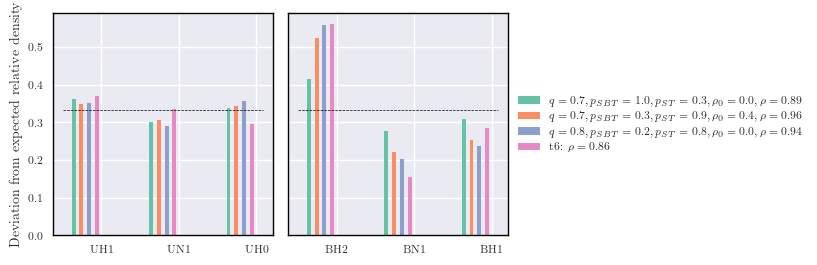

In [415]:
"""Many points
"""


save_ = True
fun_prepare_data = prepare_data4
linewidth = 0.5
addon = "_lvl3"
orientation = 'h' # 'v' or 'h'
which_ticks = 'zero' #'zero', 'normal'
which_group = 0#there can be `group_size` bars (8 at max). If data has more, which to show. If `add_real_data == True`, then there should be 7 at max. 
group_size = 7
add_real_data = True
show_error = False
show_rho = True

real_data = real_datasets[school_id]
# reverse = True

width = 345
figsize = set_size(width)
# figsize = (figsize[0] * 1.7, figsize[1])

# sim_data = mean_data.copy()
# sim_data_std = std_data.copy()
# real_data = results_realnet.copy()
# if reverse:
#     order = results_realnet.columns.tolist()
#     order.reverse()
#     real_data = results_realnet[order]
    
#     order = mean_data.columns.tolist()
#     order.reverse()
#     sim_data = sim_data[order]
#     std_data_std = std_data[order]

# triads = ['tr2', 'tr6', 'tr5', 'tr1']
all_sets = [n1_triads, n2_triads]

if orientation == 'v':
    figsize = (figsize[0] , figsize[1] * 1.5)
elif orientation == 'h':
    figsize = (figsize[0]*1.8 , figsize[1])

if fun_prepare_data == prepare_data5:
    line_level = 0
else:
    line_level = 1/3


if orientation == 'v':
    fig, axes = plt.subplots(2, 1, figsize=figsize, sharey=True)
elif orientation == 'h':
    fig, axes = plt.subplots(1, 2, figsize=figsize, sharey=True)
# fig, axes = plt.subplots(1, 1, figsize=figsize, sharey=True)

# Simulated nets
colors = sns.color_palette("Set2").as_hex()[:20]
# sim_labels = [r'$q={q:.2f}$'.format(q=q) for q in sim_data.columns.values]
# print(sim_labels)

triads_set = n1_triads
ydata, yerr = fun_prepare_data(df2_rho_gs[school_id].iloc[inds],  triads_set, 
                               std_data = df2_rho_gs[school_id].iloc[inds], addon = addon)

ydata = ydata[ydata.columns[group_size*which_group:group_size*(which_group+1)]]
if show_error:
    yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]
    yerr = yerr.loc[:,~ydata.columns.duplicated()].copy() 
else:
    yerr = None
ydata = ydata.loc[:,~ydata.columns.duplicated()].copy() 
# yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]

if add_real_data:
    real_net_data, _ = fun_prepare_data(real_data,  triads_set)
else:
    real_net_data = None

if show_rho:
    rhos = df2_rho_gs[school_id].iloc[inds].rho.values[group_size*which_group:group_size*(which_group+1)]
    epi_rho = real_data.rho.values[0]
else:
    rhos = None
    epi_rho = None

title = r'$\Delta_1$'
plot_bar_nets(axes[0], ydata, yerr, triads_set, None, labels = None, 
              line_level = line_level, linewidth = linewidth, colors=colors, 
              width = 0.15, smallest_edge = True, m = 0.5, legend_elem = 4, 
              real_net_data = real_net_data, additional_label_data = rhos, real_net_additional_label_data = epi_rho)
# plot_bar_simulatednets(ax=axes[sim_pos, 1], triads_set=n2_triads, title='n2', labels=sim_labels, colors=colors)
triads_set = n2_triads
ydata, yerr = fun_prepare_data(df2_rho_gs[school_id].iloc[inds],  triads_set, 
                               std_data = df2_rho_gs[school_id].iloc[inds], addon = addon)

ydata = ydata[ydata.columns[group_size*which_group:group_size*(which_group+1)]]
if show_error:
    yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]
    yerr = yerr.loc[:,~ydata.columns.duplicated()].copy() 
else:
    yerr = None
ydata = ydata.loc[:,~ydata.columns.duplicated()].copy()
# yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]

if add_real_data:
    real_net_data, _ = fun_prepare_data(real_data,  triads_set)
else:
    real_net_data = None

title = r'$\Delta_2$'

plot_bar_nets(axes[1], ydata, yerr, triads_set, None, 
              labels = None, line_level = line_level, 
              linewidth = linewidth, colors=colors, 
              width = 0.15, smallest_edge = True, m = 0.5, legend_elem = 4, 
              real_net_data = real_net_data, additional_label_data = rhos, real_net_additional_label_data = epi_rho)


# fix tick rotations
for ax in axes.flatten():
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)
# fix tick labels
for ax in axes.flatten():
    ax.set_xticklabels([triad_names_map[tick.get_text()] for tick in ax.get_xticklabels()])
# drop double legend
for i in range(2):
#     axes[i, 1].get_legend().remove()
#     axes[i,1].set_ylabel('')
    # set legend to left top corner
    if i==1:
        axes[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axes[i].set_ylabel('')
    
ticks = axes[i].get_yticklabels()
ticks = axes[i].get_yticks()
# print(ticks)
if which_ticks == "normal":
    ticks2 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]) - 1/3
    axes[1].set_yticks(ticks2)
    # axes[i,0].set_yticks(ticks - 0.1)
    axes[i].set_yticklabels([r'{tick:.1f}'.format(tick=tick+1/3) for tick in ticks2])
# else:
#     axes[1].set_yticks([-0.2, -0.1, 0, 0.1, 0.2])
    
    
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
# plt.xlabel("common X")
plt.ylabel("Deviation from expected relative density")

fname = 'barplots_spanish_highschools'
# fname = fname + "_down"
fname = fname + "_" + real_data.index[0]
fname = fname + "_" + orientation
fname = fname + "_" + which_ticks

fname = fname + "_" + str(which_group)

if show_error:
    fname = fname + "_err"
if add_real_data:
    fname = fname + "_real"
if show_rho:
    fname = fname + "_rho"

# if reverse is True:
#     fname = fname + "_rev"

if linewidth is None:
    fname = fname + "_noline"

fig.tight_layout()
plt.show()
if save_:
    fname = fname + ".pdf"
    fig.savefig(fname, format='pdf', bbox_inches='tight') 

In [126]:
fname

'barplots_spanish_highschools_t11_10_h_zero_0_real_rho'

### Showing results for all schools/classes

In [25]:

def plot_bar_nets2(ax, ydatas, yerrs, triads_set, title, labels_s, 
                  line_level = 1/3, linewidth = 2, colors=None, 
                  width = 0.15, smallest_edge = False, m = 1,
                  legend_elem = 3, real_net_datas = None, additional_label_datas = None, real_net_additional_label_datas = None):
    """Difference between `plot_bar_nets2` and `plot_bar_nets` is that 
    this function allows two different datasets to be plotted in the same barplot

    Args:
        ax (_type_): _description_
        ydatas (_type_): _description_
        yerrs (_type_): _description_
        triads_set (_type_): _description_
        title (_type_): _description_
        labels_s (_type_): _description_
        line_level (_type_, optional): _description_. Defaults to 1/3.
        linewidth (int, optional): _description_. Defaults to 2.
        colors (_type_, optional): _description_. Defaults to None.
        width (float, optional): _description_. Defaults to 0.15.
        smallest_edge (bool, optional): _description_. Defaults to False.
        m (int, optional): _description_. Defaults to 1.
        legend_elem (int, optional): _description_. Defaults to 3.
        real_net_datas (_type_, optional): _description_. Defaults to None.
        additional_label_datas (_type_, optional): _description_. Defaults to None.
        real_net_additional_label_datas (_type_, optional): _description_. Defaults to None.
    """
    
    n_simulated_s = [ydata.copy() for ydata in ydatas]
    if yerrs is not None:
        n_errs = [yerr.copy() for yerr in yerrs]
    else:
        n_errs = [None for ydata in ydatas]
    if real_net_datas is not None:
        data_names = [real_net_data.columns[0] for real_net_data in real_net_datas]
        real_datas = [[val[0] for val in real_net_data.values] for real_net_data in real_net_datas]
        for i in range(len(data_names)):
            n_simulated_s[i][data_names[i]] = real_datas[i]
        if yerrs is not None:
            real_data_stds = [np.full(len(n_simulated.index), np.nan) for n_simulated in n_simulated_s]
            for i in range(len(data_names)):
                n_errs[i][data_names[i]] = real_data_stds[i]
    
    lens = [len(n_simulated.columns) for n_simulated in n_simulated_s]
    assert np.sum(lens) <= len(colors) + 0.5
    
    multiplier = 0
    color_id = 0
    for data_i, n_simulated in enumerate(n_simulated_s):
        x = np.arange(len(n_simulated.index))*3-1.5
        if real_net_datas is not None:
            real_net_data = real_net_datas[data_i]
        else:
            real_net_data = None
        if real_net_additional_label_datas is not None:
            real_net_additional_label_data = real_net_additional_label_datas[data_i]
        else:
            real_net_additional_label_data = None
            
        if additional_label_datas is not None:
            additional_label_data = additional_label_datas[data_i]
        else:
            additional_label_data = None
        
        n_err = n_errs[data_i]
        
        for i, col in enumerate(n_simulated.columns):
            offset = multiplier*width*4
            
            if labels_s is not None:
                label = labels_s[data_i][i]
            else:
                # label = col
                # print(col)
                if len(col) == 3:
                    q, p, ps = col
                elif len(col) == 4:
                    _, q, p, ps = col
                elif len(col) == 5:
                    _, q, p, ps, step = col
                # elif len(col) == 1:
                #     if real_net_data is not None:
                #     else:
                #         raise ValueError("column contains array with only one value")
                else:
                    q, p, ps = col[:3]
                if (i + 1 == len(n_simulated.columns)) and (real_net_data is not None):
                    label = col[0]
                    if real_net_additional_label_data is not None:
                        # print(real_net_additional_label_data)
                        label += r": $\rho={rho}$".format(rho = round(real_net_additional_label_data, 2))
                elif legend_elem == 3:
                    label = r"$q={q},p_{{SBT}}={p},p_{{ST}}={ps}$".format(q=round(q,2),p=round(p,2),ps=round(ps,2))
                    if additional_label_data is not None:
                        label += r"$,\rho={rho}$".format(rho = round(additional_label_data[i], 2))
                elif legend_elem == 4:
                    rho_init = col[3]
                    label = r"$q={q},p_{{SBT}}={p},p_{{ST}}={ps},\rho_{{0}}={rho_init}$".format(q=round(q,2),p=round(p,2),ps=round(ps,2), rho_init=round(rho_init,2))
                    if additional_label_data is not None:
                        label += r"$,\rho={rho}$".format(rho = round(additional_label_data[i], 2))
                # print(lab)
            if n_err is not None:
                # print(n_err)
                # print(n_err[i])
                err = n_err[col[:4]]
                if np.any(np.isnan(err)):
                    err = None
            else:
                err = None
            
            # print("H")
            if smallest_edge:
                edgecolor = [colors[color_id] if val else 'none' for ind, val in enumerate(n_simulated[col] < 0.01)]
            else:
                edgecolor = ['none' for ind, val in enumerate(n_simulated[col])]
            # print(n_simulated[col].values)
            # print(colors[color_id])
            # print(err)
            # print(x+offset)
            # print(label)
            err = None
            rects = ax.bar(x=x+offset, height=n_simulated[col].values,
                        width=width, label=label, color=colors[color_id],
                        yerr=err,
                        edgecolor=edgecolor, linewidth=2)
            # ax.bar_label(rects, padding=3)
            # print("D")
            multiplier += m
            color_id += 1

    # print("F")
    ax.set_ylabel('Relative density')
    ax.set_title(title)
    if linewidth is not None:
        ax.hlines(y=line_level, xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], color='black', linewidth=linewidth, ls='--')
    # ax.legend(loc='best')
    ax.set_xticks(x + width*m+1., triads_set)
    

def plot_bar_nets22(ax, ydatas, yerrs, triads_set, title, labels_s, 
                  line_level = 1/3, linewidth = 2, colors=None, 
                  smallest_edge = False, 
                  legend_elem = 3, real_net_datas = None, 
                  additional_label_datas = None, real_net_additional_label_datas = None,
                  total_width = 0.8, single_width = 1.):
    """Difference between `plot_bar_nets22` and `plot_bar_nets` is that 
    this function allows two different datasets to be plotted in the same barplot
    
    Difference between `plot_bar_nets22` and `plot_bar_nets2` is that 
    this function is the updated version with improving displaying. 

    Args:
        ax (_type_): _description_
        ydatas (_type_): _description_
        yerrs (_type_): _description_
        triads_set (_type_): _description_
        title (_type_): _description_
        labels_s (_type_): _description_
        line_level (_type_, optional): _description_. Defaults to 1/3.
        linewidth (int, optional): _description_. Defaults to 2.
        colors (_type_, optional): _description_. Defaults to None.
        width (float, optional): _description_. Defaults to 0.15.
        smallest_edge (bool, optional): _description_. Defaults to False.
        m (int, optional): _description_. Defaults to 1.
        legend_elem (int, optional): _description_. Defaults to 3.
        real_net_datas (_type_, optional): _description_. Defaults to None.
        additional_label_datas (_type_, optional): _description_. Defaults to None.
        real_net_additional_label_datas (_type_, optional): _description_. Defaults to None.
    """
    
    n_simulated_s = [ydata.copy() for ydata in ydatas]
    if yerrs is not None:
        n_errs = [yerr.copy() for yerr in yerrs]
    else:
        n_errs = [None for ydata in ydatas]
    if real_net_datas is not None:
        data_names = [real_net_data.columns[0] for real_net_data in real_net_datas]
        real_datas = [[val[0] for val in real_net_data.values] for real_net_data in real_net_datas]
        for i in range(len(data_names)):
            n_simulated_s[i][data_names[i]] = real_datas[i]
        if yerrs is not None:
            real_data_stds = [np.full(len(n_simulated.index), np.nan) for n_simulated in n_simulated_s]
            for i in range(len(data_names)):
                n_errs[i][data_names[i]] = real_data_stds[i]
    
    lens = [len(n_simulated.columns) for n_simulated in n_simulated_s]
    assert np.sum(lens) <= len(colors) + 0.5
    
    multiplier = 0
    
    # we have len(triads_set) different groups of bars. In each group we have len(n_simulated.columns) bars. 
    # Bars should not be too close, and the bar groups should be separate. 
    
    # Number of bars per group
    n_bars_s = np.copy(lens)
    n_bars = np.sum(np.array(n_bars_s))
    
    # The width of a single bar
    bar_width = total_width / n_bars
    width = bar_width * single_width
    
    color_id = 0
    for data_i, n_simulated in enumerate(n_simulated_s):
        # x = np.arange(len(n_simulated.index))*3-1.5
        x = np.arange(len(triads_set))
        if real_net_datas is not None:
            real_net_data = real_net_datas[data_i]
        else:
            real_net_data = None
        if real_net_additional_label_datas is not None:
            real_net_additional_label_data = real_net_additional_label_datas[data_i]
        else:
            real_net_additional_label_data = None
            
        if additional_label_datas is not None:
            additional_label_data = additional_label_datas[data_i]
        else:
            additional_label_data = None
        
        n_err = n_errs[data_i]
        
        for i, col in enumerate(n_simulated.columns):
            # offset = multiplier*width*4
            x_offset = (multiplier) * bar_width
            
            if labels_s is not None:
                label = labels_s[data_i][i]
            else:
                # label = col
                # print(col)
                if len(col) == 3:
                    q, p, ps = col
                elif len(col) == 4:
                    _, q, p, ps = col
                elif len(col) == 5:
                    _, q, p, ps, step = col
                # elif len(col) == 1:
                #     if real_net_data is not None:
                #     else:
                #         raise ValueError("column contains array with only one value")
                else:
                    q, p, ps = col[:3]
                if (i + 1 == len(n_simulated.columns)) and (real_net_data is not None):
                    label = col[0]
                    if real_net_additional_label_data is not None:
                        # print(real_net_additional_label_data)
                        label += r": $\rho={rho}$".format(rho = round(real_net_additional_label_data, 2))
                elif legend_elem == 3:
                    label = r"$q={q},p_{{SBT}}={p},p_{{ST}}={ps}$".format(q=round(q,2),p=round(p,2),ps=round(ps,2))
                    if additional_label_data is not None:
                        label += r"$,\rho={rho}$".format(rho = round(additional_label_data[i], 2))
                elif legend_elem == 4:
                    rho_init = col[3]
                    label = r"$q={q},p_{{SBT}}={p},p_{{ST}}={ps},\rho_{{0}}={rho_init}$".format(q=round(q,2),p=round(p,2),ps=round(ps,2), rho_init=round(rho_init,2))
                    if additional_label_data is not None:
                        label += r"$,\rho={rho}$".format(rho = round(additional_label_data[i], 2))
                # print(lab)
            if n_err is not None:
                # print(n_err)
                # print(n_err[i])
                err = n_err[col[:4]]
                if np.any(np.isnan(err)):
                    err = None
            else:
                err = None
            
            # print("H")
            if smallest_edge:
                edgecolor = [colors[color_id] if val else 'none' for ind, val in enumerate(np.abs(n_simulated[col]) < 0.01)]
            else:
                edgecolor = ['none' for ind, val in enumerate(n_simulated[col])]
            # print(n_simulated[col].values)
            # print(colors[color_id])
            # print(err)
            # print(x+offset)
            # print(label)
            # print(np.abs(n_simulated[col]))
            # print(edgecolor)
            err = None
            rects = ax.bar(x=x+x_offset, height=n_simulated[col].values,
                        width=width, label=label, color=colors[color_id],
                        yerr=err,
                        edgecolor=edgecolor, linewidth=1)
            # ax.bar_label(rects, padding=3)
            # print("D")
            color_id += 1
            multiplier += 1

    # print("F")
    ax.set_ylabel('Relative density')
    ax.set_title(title)
    if linewidth is not None:
        ax.hlines(y=line_level, xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], color='black', linewidth=linewidth, ls='--')
    # ax.legend(loc='best')
    ax.set_xticks(x + bar_width*(n_bars-1)/2, triads_set)
    
def create_school_groups(sets, order = None, max_sets_per_plot = 8, reserve_space_real_data = True):
    """Based on chosen parameter sets to be plotted, groups of schools are chosen. 
    Each group is plotted in the same bar plot. The goal is to limit space and 
    make the plot readible. 
    The maximum number of bars in the plot is 8. 
    The sets in groups are ordered along the `order` if it is given. 

    Args:
        sets (dict or list): sets of parameters for each school. 
        order (list): order of schools
        max_sets_per_plot (int): maximum number of sets that can be shown in the plot. 
        reserve_space_real_data (bool): if this is true, for each dataset,
            one bar needs to be reserved for the true data. 
    """
    
    school_count = len(sets)
    if order is None:
        order = list(range(school_count))
    
    lens = [len(sets[id]) for id in range(school_count)]
    
    groups = []
    # group_datasets_count = 0
    group_set_counts = []
    group_set_count = 0
    group = []
    for id in order:
        if group_set_count + lens[id] <= max_sets_per_plot - (len(group) + 1) * reserve_space_real_data:
            "Sets are added to current group."
            group.append(id)
            group_set_count += lens[id]
        else:
            groups.append(group)
            group_set_counts.append(group_set_count)
            group = [id]
            group_set_count = lens[id]
    groups.append(group)
    group_set_counts.append(group_set_count)
    
    return groups, group_set_counts
    
            

#### $\rho$ not capped

In [37]:
# Choosing closest to 6 triads trans

chosen_inds = np.array([inds_g3[0:3] for inds_g3 in inds_gs3])

error_vals = [df2_rho_g.iloc[inds].closest_to_six_triads_transformed.values for df2_rho_g, inds in zip(df2_rho_gs, chosen_inds)]

for id in range(len(error_vals)):
    nans = np.isnan(error_vals[id])
    if np.any(nans):
        inds = np.where(np.logical_not(nans))[0]
        error_vals[id] = error_vals[id][inds]
        chosen_inds[id] = chosen_inds[id][inds]

error_vals

[array([0.00029122, 0.00042321, 0.00044923]),
 array([0.00487702, 0.00489861, 0.00536993]),
 array([0.00222176, 0.00402422, 0.0067748 ]),
 array([0.00146002, 0.00079616, 0.0020175 ]),
 array([0.00391133, 0.00315804, 0.00396966]),
 array([0.00112941, 0.00076577, 0.00167084]),
 array([0.00188344, 0.00123035, 0.00396135]),
 array([0.00364865, 0.0016318 , 0.00397668]),
 array([0.00125698, 0.00180248, 0.00209278]),
 array([0.00805754, 0.00643303, 0.00868445]),
 array([0.00598838, 0.00717106, 0.00755846]),
 array([0.0009397 , 0.0007858 , 0.00292301]),
 array([0.00413068, 0.0045133 , 0.00483276]),
 array([0.00015479, 0.00030089, 0.00032191]),
 array([0.00045126, 0.00037265, 0.00052842]),
 array([0.00246351, 0.002679  , 0.00276853]),
 array([0.00210294, 0.00197303, 0.00218896]),
 array([0.00016891, 0.00018981, 0.00019361]),
 array([0.00232465, 0.00214331, 0.00246097]),
 array([0.00249959, 0.00129964, 0.00265324]),
 array([0.00669308, 0.00264741, 0.00673121]),
 array([0.00528311, 0.00528814, 0.

In [39]:
error_vals_min = [np.min(err_vals) for err_vals in error_vals]
error_vals_min_all = np.copy(error_vals_min)
school_order = np.argsort(error_vals_min)
school_order

array([24, 13, 17,  0, 23, 14, 28, 29,  5, 11,  3, 26,  6,  8, 19, 31, 22,
        7, 25, 32, 16, 18,  2, 15, 20, 27,  4, 12, 30,  1, 21, 10,  9])

In [40]:
chosen_inds[19:]

array([[  25, 5465,  408],
       [1668, 8347, 2685],
       [1516, 3016,   16],
       [4983, 5170, 4530],
       [2382, 3260, 2013],
       [2612, 3687, 3229],
       [4879, 4137, 4356],
       [2980, 2981, 1356],
       [4890, 2935, 2372],
       [1733, 3450, 3409],
       [1650, 1150, 2244],
       [3768, 2196, 4523],
       [2702,  710, 2269],
       [2866, 2344, 1530]])

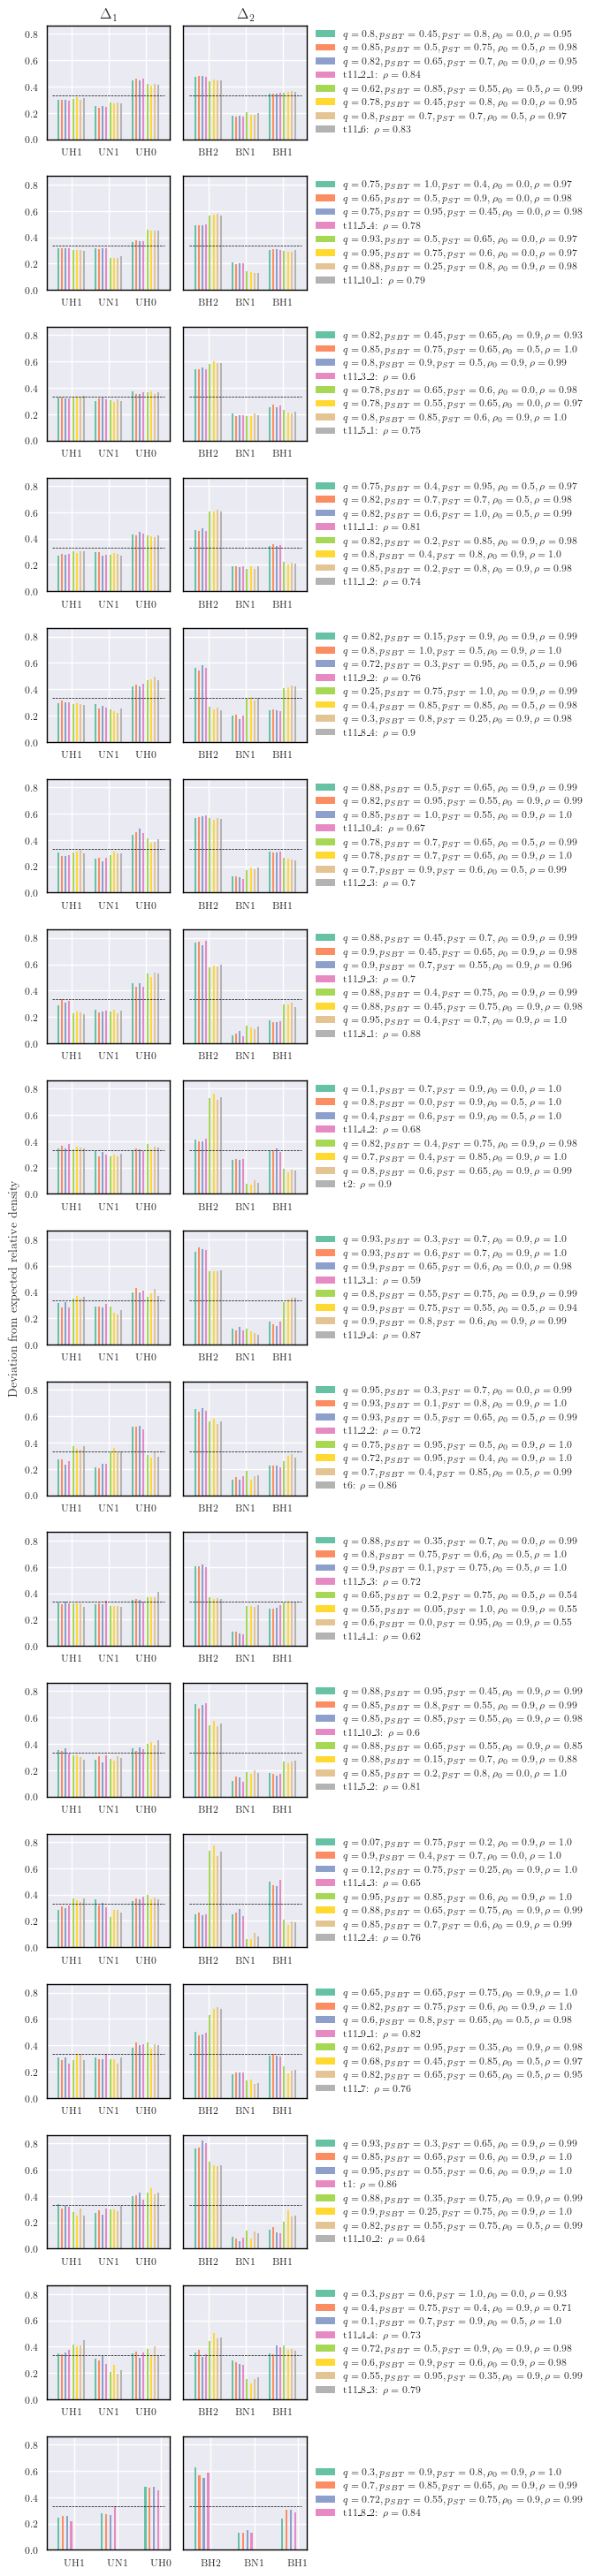

In [43]:

"""Showing results for all schools/classes
"""

save_ = True
fun_prepare_data = prepare_data4
linewidth = 0.5
addon = "_lvl4"
# orientation = 'h' # 'v' or 'h'
which_ticks = 'zero' #'zero', 'normal'
which_group = 0 #there can be `group_size` bars (8 at max). If data has more, which to show. If `add_real_data == True`, then there should be 7 at max. 
group_size = 7
add_real_data = True
show_error = True
show_rho = True

if fun_prepare_data == prepare_data5:
    line_level = 0
else:
    line_level = 1/3


school_groups, _ = create_school_groups(chosen_inds, school_order)

# wiki_pos = 0
# slash_pos = 1

width = 345
figsize = set_size(width)
figsize = (figsize[0] * 1.5 , figsize[1]*10)
fig, axes = plt.subplots(len(school_groups), 2, figsize=figsize, sharey=True)

all_sets = [n1_triads, n2_triads]

# Simulated nets
colors = sns.color_palette("Set2").as_hex()[:20]

triads_order = [n1_triads, n2_triads]
for triad_id, triads_set in enumerate(triads_order):
    for group_id, group in enumerate(school_groups):
        ydatas = []
        yerrs = []
        real_net_datas = None
        additional_label_datas = None
        real_net_additional_label_datas = None
        for school_id in group:
        # for triads_set in n1_triads:
            ydata, yerr = fun_prepare_data(df2_rho_gs[school_id].iloc[chosen_inds[school_id]],  triads_set, 
                                std_data = df2_rho_gs[school_id].iloc[chosen_inds[school_id]], addon = addon)

            ydata = ydata[ydata.columns[group_size*which_group:group_size*(which_group+1)]]
            if show_error:
                yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]
                yerr = yerr.loc[:,~ydata.columns.duplicated()].copy() 
            else:
                yerr = None
            ydata = ydata.loc[:,~ydata.columns.duplicated()].copy()
            
            ydatas.append(ydata)
            yerrs.append(yerr)

            if add_real_data:
                real_net_data, _ = fun_prepare_data(real_datasets_all[school_id],  triads_set)
                if real_net_datas is None:
                    real_net_datas = []
                real_net_datas.append(real_net_data)
            # else:
            #     real_net_data = None

            if show_rho:
                rhos = df2_rho_gs[school_id].iloc[chosen_inds[school_id]].rho.values
                data_rho = real_datasets_all[school_id].rho.values[0]
                
                if additional_label_datas is None:
                    additional_label_datas = []
                additional_label_datas.append(rhos)
                
                if real_net_additional_label_datas is None:
                    real_net_additional_label_datas = []
                real_net_additional_label_datas.append(data_rho)
            # else:
            #     rhos = None
            #     wiki_rho = None

        if group_id == 0:
            title = r'$\Delta_{k}$'.format(k = triad_id + 1)
        else:
            title = None
        plot_bar_nets2(axes[group_id, triad_id], ydatas, yerrs, triads_set, title, 
                    labels_s = None, line_level = line_level, 
                    linewidth = linewidth, colors=colors, 
                    width = 0.15, smallest_edge = True, m = 0.5, legend_elem = 4, 
                    real_net_datas = real_net_datas, additional_label_datas = additional_label_datas, 
                    real_net_additional_label_datas = real_net_additional_label_datas)

# fix tick rotations
for ax in axes.flatten():
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)
# fix tick labels
for ax in axes.flatten():
    ax.set_xticklabels([triad_names_map[tick.get_text()] for tick in ax.get_xticklabels()])
# drop double legend
for i in range(len(school_groups)):
    # axes[i, 1].get_legend().remove()
    # axes[i,1].set_ylabel('')
    # set legend to left top corner
    # if i==1:
    axes[i, 1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axes[i,1].set_ylabel('')
    axes[i,0].set_ylabel('')
    
# ticks = axes[i,0].get_yticklabels()
# ticks = axes[i,0].get_yticks()
# if which_ticks == "normal":
#     ticks2 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]) - 1/3
#     axes[1].set_yticks(ticks2)
#     # axes[i,0].set_yticks(ticks - 0.1)
#     axes[i].set_yticklabels([r'{tick:.1f}'.format(tick=tick+1/3) for tick in ticks2])
# else:
#     axes[1].set_yticks([-0.2, -0.1, 0, 0.1, 0.2])
    
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
# plt.xlabel("common X")
plt.ylabel("Deviation from expected relative density")

save_fig_path = Path("figs")
fname = 'barplots_sim_real_spanish_schoolclass_controldown_summary_2'
fname = fname + "_" + which_ticks
if linewidth is None:
    fname = fname + "_noline"
if show_error:
    fname = fname + "_err"
if show_rho:
    fname = fname + "_rho"

fig.tight_layout()
plt.show()
if save_:
    fname = fname + ".pdf"
    fig.savefig(save_fig_path / fname, dpi = 600, format='pdf', bbox_inches='tight') 

#### $\rho$ capped $\pm$ 0.2

In [44]:
# Choosing closest to 6 triads trans

chosen_inds = np.array([inds_g3[0:3] for inds_g3 in inds_gs20])

error_vals = [df2_rho_g.iloc[inds].closest_to_six_triads_transformed.values for df2_rho_g, inds in zip(df2_rho_gs, chosen_inds)]

for id in range(len(error_vals)):
    nans = np.isnan(error_vals[id])
    if np.any(nans):
        inds = np.where(np.logical_not(nans))[0]
        error_vals[id] = error_vals[id][inds]
        chosen_inds[id] = chosen_inds[id][inds]

error_vals

[array([0.00029122, 0.00042321, 0.00070798]),
 array([0.0231408 , 0.02531431, 0.02605451]),
 array([0.04700954, 0.04216289, 0.0418149 ]),
 array([0.00622786, 0.00660736, 0.00621402]),
 array([0.00470444, 0.004961  , 0.00413832]),
 array([0.00224047, 0.00227304, 0.00254875]),
 array([0.02487829, 0.02783951, 0.02796119]),
 array([0.0016318 , 0.00445624, 0.00544715]),
 array([0.00381949, 0.00388613, 0.00451204]),
 array([0.01085432, 0.01279098, 0.01460432]),
 array([0.00717106, 0.0087778 , 0.01009298]),
 array([0.00530265, 0.0067839 , 0.00775211]),
 array([0.00483276, 0.00666148, 0.00605756]),
 array([0.00030089, 0.00032191, 0.00059614]),
 array([0.00224247, 0.00218075, 0.00265672]),
 array([0.002679  , 0.00246351, 0.00279686]),
 array([0.02217103, 0.01973379, 0.02283135]),
 array([0.00016891, 0.00018981, 0.00019361]),
 array([0.00214331, 0.00232465, 0.00246097]),
 array([0.00290058, 0.00303989, 0.00321405]),
 array([0.03883425, 0.0396325 , 0.04064077]),
 array([0.00528311, 0.00528814, 0.

In [45]:
error_vals_min = [np.min(err_vals) for err_vals in error_vals]
error_vals_min20 = np.copy(error_vals_min)
school_order = np.argsort(error_vals_min)
school_order

array([24, 17,  0, 13, 28,  7, 29, 18, 14,  5, 15, 26, 19, 31,  8,  4, 12,
       21, 11, 23, 32, 27, 25,  3, 10, 30,  9, 16,  1,  6, 20, 22,  2])

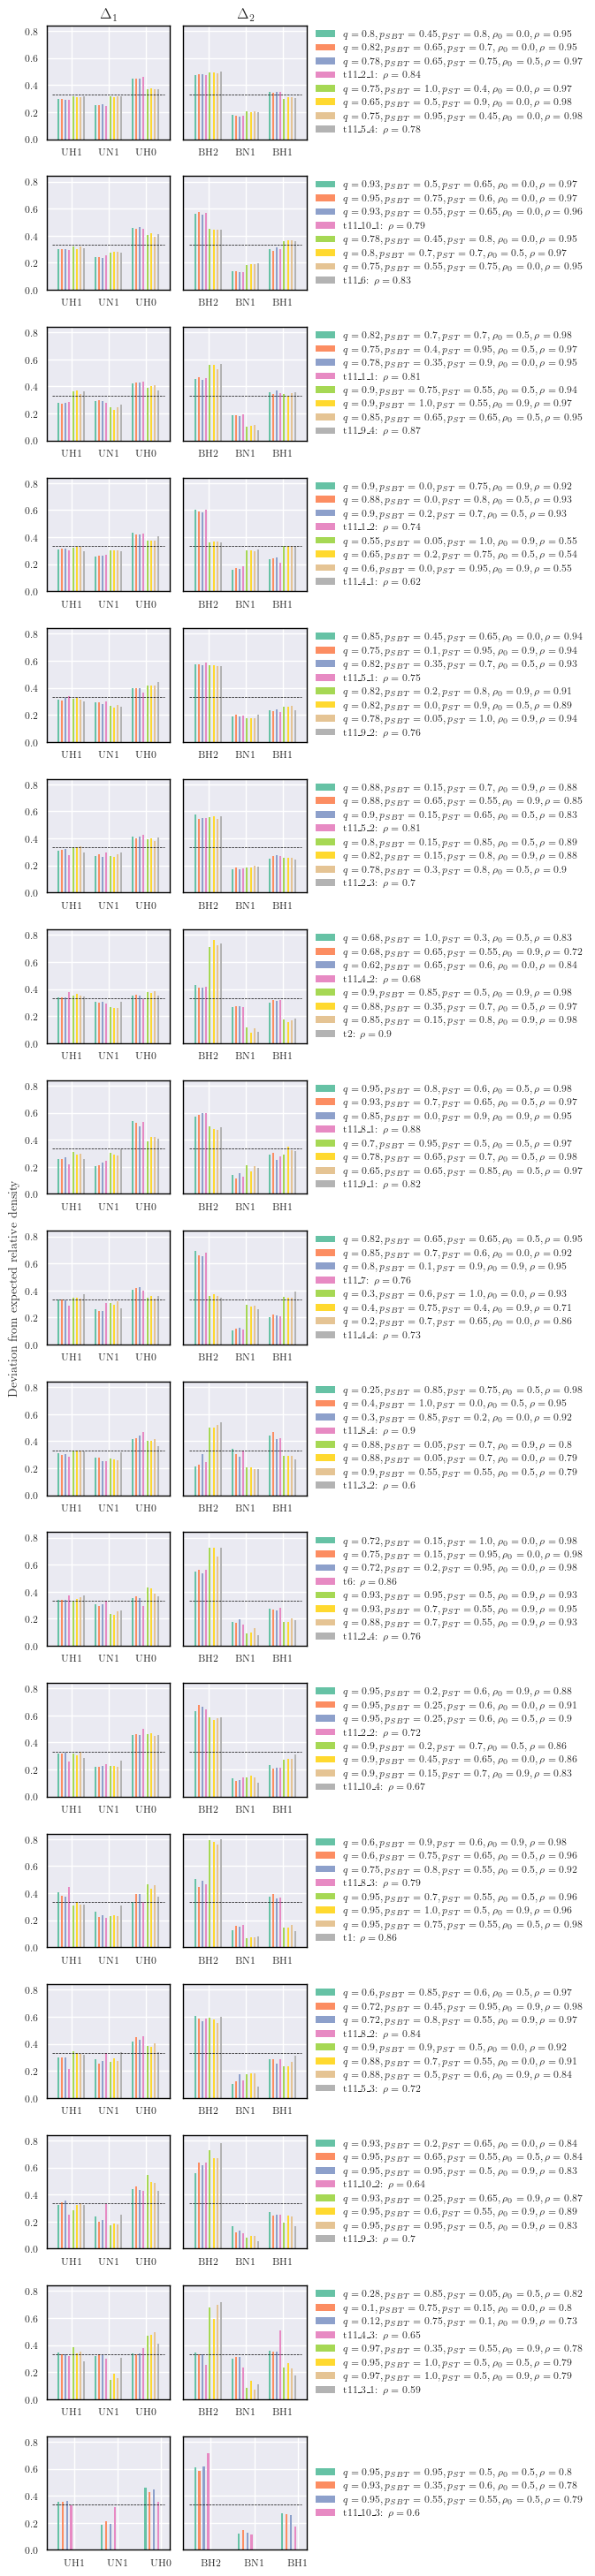

In [46]:

"""Showing results for all schools/classes
"""

save_ = True
fun_prepare_data = prepare_data4
linewidth = 0.5
addon = "_lvl4"
# orientation = 'h' # 'v' or 'h'
which_ticks = 'zero' #'zero', 'normal'
which_group = 0 #there can be `group_size` bars (8 at max). If data has more, which to show. If `add_real_data == True`, then there should be 7 at max. 
group_size = 7
add_real_data = True
show_error = True
show_rho = True

if fun_prepare_data == prepare_data5:
    line_level = 0
else:
    line_level = 1/3


school_groups, _ = create_school_groups(chosen_inds, school_order)

# wiki_pos = 0
# slash_pos = 1

width = 345
figsize = set_size(width)
figsize = (figsize[0] * 1.5 , figsize[1]*10)
fig, axes = plt.subplots(len(school_groups), 2, figsize=figsize, sharey=True)

all_sets = [n1_triads, n2_triads]

# Simulated nets
colors = sns.color_palette("Set2").as_hex()[:20]

triads_order = [n1_triads, n2_triads]
for triad_id, triads_set in enumerate(triads_order):
    for group_id, group in enumerate(school_groups):
        ydatas = []
        yerrs = []
        real_net_datas = None
        additional_label_datas = None
        real_net_additional_label_datas = None
        for school_id in group:
        # for triads_set in n1_triads:
            ydata, yerr = fun_prepare_data(df2_rho_gs[school_id].iloc[chosen_inds[school_id]],  triads_set, 
                                std_data = df2_rho_gs[school_id].iloc[chosen_inds[school_id]], addon = addon)

            ydata = ydata[ydata.columns[group_size*which_group:group_size*(which_group+1)]]
            if show_error:
                yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]
                yerr = yerr.loc[:,~ydata.columns.duplicated()].copy() 
            else:
                yerr = None
            ydata = ydata.loc[:,~ydata.columns.duplicated()].copy()
            
            ydatas.append(ydata)
            yerrs.append(yerr)

            if add_real_data:
                real_net_data, _ = fun_prepare_data(real_datasets_all[school_id],  triads_set)
                if real_net_datas is None:
                    real_net_datas = []
                real_net_datas.append(real_net_data)
            # else:
            #     real_net_data = None

            if show_rho:
                rhos = df2_rho_gs[school_id].iloc[chosen_inds[school_id]].rho.values
                data_rho = real_datasets_all[school_id].rho.values[0]
                
                if additional_label_datas is None:
                    additional_label_datas = []
                additional_label_datas.append(rhos)
                
                if real_net_additional_label_datas is None:
                    real_net_additional_label_datas = []
                real_net_additional_label_datas.append(data_rho)
            # else:
            #     rhos = None
            #     wiki_rho = None

        if group_id == 0:
            title = r'$\Delta_{k}$'.format(k = triad_id + 1)
        else:
            title = None
        plot_bar_nets2(axes[group_id, triad_id], ydatas, yerrs, triads_set, title, 
                    labels_s = None, line_level = line_level, 
                    linewidth = linewidth, colors=colors, 
                    width = 0.15, smallest_edge = True, m = 0.5, legend_elem = 4, 
                    real_net_datas = real_net_datas, additional_label_datas = additional_label_datas, 
                    real_net_additional_label_datas = real_net_additional_label_datas)

# fix tick rotations
for ax in axes.flatten():
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)
# fix tick labels
for ax in axes.flatten():
    ax.set_xticklabels([triad_names_map[tick.get_text()] for tick in ax.get_xticklabels()])
# drop double legend
for i in range(len(school_groups)):
    # axes[i, 1].get_legend().remove()
    # axes[i,1].set_ylabel('')
    # set legend to left top corner
    # if i==1:
    axes[i, 1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axes[i,1].set_ylabel('')
    axes[i,0].set_ylabel('')
    
# ticks = axes[i,0].get_yticklabels()
# ticks = axes[i,0].get_yticks()
# if which_ticks == "normal":
#     ticks2 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]) - 1/3
#     axes[1].set_yticks(ticks2)
#     # axes[i,0].set_yticks(ticks - 0.1)
#     axes[i].set_yticklabels([r'{tick:.1f}'.format(tick=tick+1/3) for tick in ticks2])
# else:
#     axes[1].set_yticks([-0.2, -0.1, 0, 0.1, 0.2])
    
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
# plt.xlabel("common X")
plt.ylabel("Deviation from expected relative density")

save_fig_path = Path("figs")
fname = 'barplots_sim_real_spanish_schoolclass_controldown_summary20_2'
fname = fname + "_" + which_ticks
if linewidth is None:
    fname = fname + "_noline"
if show_error:
    fname = fname + "_err"
if show_rho:
    fname = fname + "_rho"

fig.tight_layout()
plt.show()
if save_:
    fname = fname + ".pdf"
    fig.savefig(save_fig_path / fname, dpi = 600, format='pdf', bbox_inches='tight') 

#### $\rho$ capped $\pm$ 0.1

In [47]:
# Choosing closest to 6 triads trans

chosen_inds = np.array([inds_g3[0:3] for inds_g3 in inds_gs10])

error_vals = [df2_rho_g.iloc[inds].closest_to_six_triads_transformed.values for df2_rho_g, inds in zip(df2_rho_gs, chosen_inds)]

for id in range(len(error_vals)):
    nans = np.isnan(error_vals[id])
    if np.any(nans):
        inds = np.where(np.logical_not(nans))[0]
        error_vals[id] = error_vals[id][inds]
        chosen_inds[id] = chosen_inds[id][inds]

error_vals

[array([0.00237082, 0.00328322, 0.00362585]),
 array([0.04689245, 0.04978414, 0.0450841 ]),
 array([0.07377086, 0.07563312, 0.07159762]),
 array([0.01043802, 0.01042758, 0.01078251]),
 array([0.00552577, 0.00700103, 0.00709074]),
 array([0.00398402, 0.00380383, 0.00426219]),
 array([0.0332857 , 0.04088278, 0.04172842]),
 array([0.00544715, 0.00445624, 0.0016318 ]),
 array([0.00381949, 0.00388613, 0.00451204]),
 array([0.01799635, 0.01844375, 0.0167514 ]),
 array([0.01253674, 0.01204061, 0.01023241]),
 array([0.00530265, 0.0067839 , 0.00775211]),
 array([0.01901387, 0.01903202, 0.02026237]),
 array([0.00263552, 0.00272573, 0.00304649]),
 array([0.00843818, 0.00937767, 0.00942437]),
 array([0.00279686, 0.002679  , 0.00246351]),
 array([0.02778753, 0.02372568, 0.02645642]),
 array([0.00212706, 0.002223  , 0.00227547]),
 array([0.00214331, 0.00232465, 0.00246097]),
 array([0.00365077, 0.00303989, 0.00354551]),
 array([0.04183931, 0.04064077, 0.04211848]),
 array([0.00745074, 0.00724512, 0.

In [48]:
error_vals_min = [np.min(err_vals) for err_vals in error_vals]
error_vals_min10 = np.copy(error_vals_min)
school_order = np.argsort(error_vals_min)
school_order

array([24,  7, 17, 18,  0, 15, 13, 19,  5, 31,  8, 21, 11,  4, 28, 26, 29,
       14, 32, 27, 25, 10,  3, 23,  9, 30, 12, 16,  6, 20,  1,  2, 22])

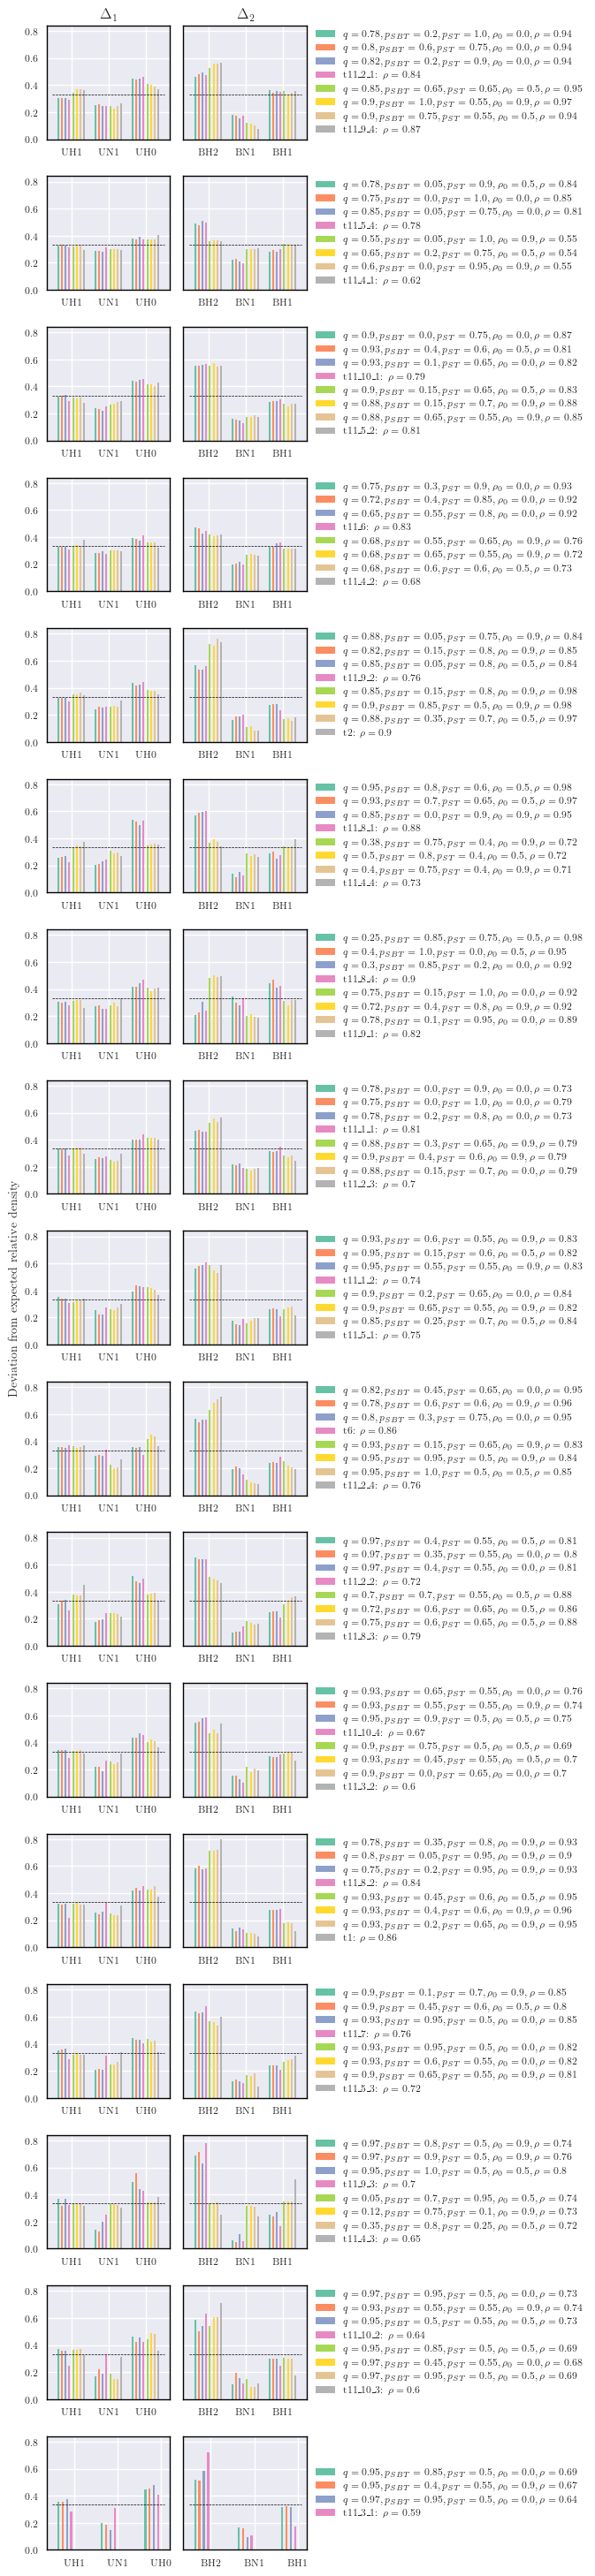

In [49]:

"""Showing results for all schools/classes
"""

save_ = True
fun_prepare_data = prepare_data4
linewidth = 0.5
addon = "_lvl4"
# orientation = 'h' # 'v' or 'h'
which_ticks = 'zero' #'zero', 'normal'
which_group = 0 #there can be `group_size` bars (8 at max). If data has more, which to show. If `add_real_data == True`, then there should be 7 at max. 
group_size = 7
add_real_data = True
show_error = True
show_rho = True

if fun_prepare_data == prepare_data5:
    line_level = 0
else:
    line_level = 1/3


school_groups, _ = create_school_groups(chosen_inds, school_order)

# wiki_pos = 0
# slash_pos = 1

width = 345
figsize = set_size(width)
figsize = (figsize[0] * 1.5 , figsize[1]*10)
fig, axes = plt.subplots(len(school_groups), 2, figsize=figsize, sharey=True)

all_sets = [n1_triads, n2_triads]

# Simulated nets
colors = sns.color_palette("Set2").as_hex()[:20]

triads_order = [n1_triads, n2_triads]
for triad_id, triads_set in enumerate(triads_order):
    for group_id, group in enumerate(school_groups):
        ydatas = []
        yerrs = []
        real_net_datas = None
        additional_label_datas = None
        real_net_additional_label_datas = None
        for school_id in group:
        # for triads_set in n1_triads:
            ydata, yerr = fun_prepare_data(df2_rho_gs[school_id].iloc[chosen_inds[school_id]],  triads_set, 
                                std_data = df2_rho_gs[school_id].iloc[chosen_inds[school_id]], addon = addon)

            ydata = ydata[ydata.columns[group_size*which_group:group_size*(which_group+1)]]
            if show_error:
                yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]
                yerr = yerr.loc[:,~ydata.columns.duplicated()].copy() 
            else:
                yerr = None
            ydata = ydata.loc[:,~ydata.columns.duplicated()].copy()
            
            ydatas.append(ydata)
            yerrs.append(yerr)

            if add_real_data:
                real_net_data, _ = fun_prepare_data(real_datasets_all[school_id],  triads_set)
                if real_net_datas is None:
                    real_net_datas = []
                real_net_datas.append(real_net_data)
            # else:
            #     real_net_data = None

            if show_rho:
                rhos = df2_rho_gs[school_id].iloc[chosen_inds[school_id]].rho.values
                data_rho = real_datasets_all[school_id].rho.values[0]
                
                if additional_label_datas is None:
                    additional_label_datas = []
                additional_label_datas.append(rhos)
                
                if real_net_additional_label_datas is None:
                    real_net_additional_label_datas = []
                real_net_additional_label_datas.append(data_rho)
            # else:
            #     rhos = None
            #     wiki_rho = None

        if group_id == 0:
            title = r'$\Delta_{k}$'.format(k = triad_id + 1)
        else:
            title = None
        plot_bar_nets2(axes[group_id, triad_id], ydatas, yerrs, triads_set, title, 
                    labels_s = None, line_level = line_level, 
                    linewidth = linewidth, colors=colors, 
                    width = 0.15, smallest_edge = True, m = 0.5, legend_elem = 4, 
                    real_net_datas = real_net_datas, additional_label_datas = additional_label_datas, 
                    real_net_additional_label_datas = real_net_additional_label_datas)

# fix tick rotations
for ax in axes.flatten():
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)
# fix tick labels
for ax in axes.flatten():
    ax.set_xticklabels([triad_names_map[tick.get_text()] for tick in ax.get_xticklabels()])
# drop double legend
for i in range(len(school_groups)):
    # axes[i, 1].get_legend().remove()
    # axes[i,1].set_ylabel('')
    # set legend to left top corner
    # if i==1:
    axes[i, 1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axes[i,1].set_ylabel('')
    axes[i,0].set_ylabel('')
    
# ticks = axes[i,0].get_yticklabels()
# ticks = axes[i,0].get_yticks()
# if which_ticks == "normal":
#     ticks2 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]) - 1/3
#     axes[1].set_yticks(ticks2)
#     # axes[i,0].set_yticks(ticks - 0.1)
#     axes[i].set_yticklabels([r'{tick:.1f}'.format(tick=tick+1/3) for tick in ticks2])
# else:
#     axes[1].set_yticks([-0.2, -0.1, 0, 0.1, 0.2])
    
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
# plt.xlabel("common X")
plt.ylabel("Deviation from expected relative density")

save_fig_path = Path("figs")
fname = 'barplots_sim_real_spanish_schoolclass_controldown_summary10_2'
fname = fname + "_" + which_ticks
if linewidth is None:
    fname = fname + "_noline"
if show_error:
    fname = fname + "_err"
if show_rho:
    fname = fname + "_rho"

fig.tight_layout()
plt.show()
if save_:
    fname = fname + ".pdf"
    fig.savefig(save_fig_path / fname, dpi = 600, format='pdf', bbox_inches='tight') 

#### barplots 6 triads rel

In [50]:
# Choosing closest to 6 triads rel

chosen_inds = np.array([inds_g3[9:12] for inds_g3 in inds_gs3])

error_vals = [df2_rho_g.iloc[inds].closest_to_six_triads_relative.values for df2_rho_g, inds in zip(df2_rho_gs, chosen_inds)]

for id in range(len(error_vals)):
    nans = np.isnan(error_vals[id])
    if np.any(nans):
        inds = np.where(np.logical_not(nans))[0]
        error_vals[id] = error_vals[id][inds]
        chosen_inds[id] = chosen_inds[id][inds]

error_vals

error_vals_min = [np.min(err_vals) for err_vals in error_vals]
error_vals_minrel = np.copy(error_vals_min)
school_order = np.argsort(error_vals_min)
# school_order
# error_vals

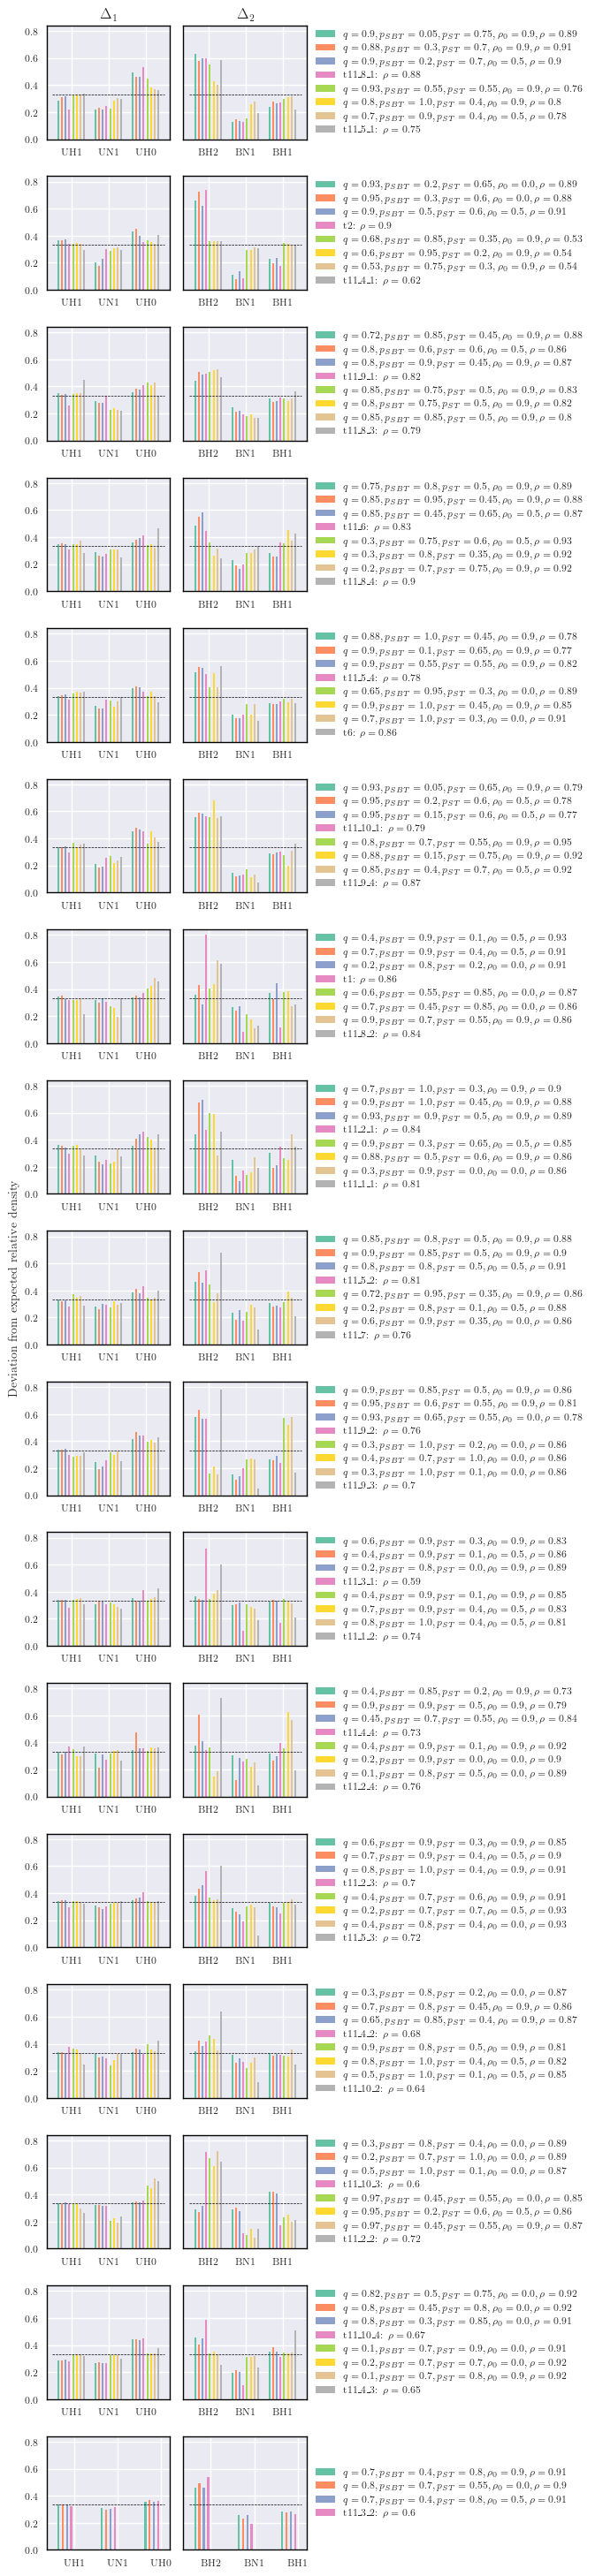

In [51]:

"""Showing results for all schools/classes
"""

save_ = True
fun_prepare_data = prepare_data4
linewidth = 0.5
addon = "_lvl4"
# orientation = 'h' # 'v' or 'h'
which_ticks = 'zero' #'zero', 'normal'
which_group = 0 #there can be `group_size` bars (8 at max). If data has more, which to show. If `add_real_data == True`, then there should be 7 at max. 
group_size = 7
add_real_data = True
show_error = True
show_rho = True

if fun_prepare_data == prepare_data5:
    line_level = 0
else:
    line_level = 1/3


school_groups, _ = create_school_groups(chosen_inds, school_order)

# wiki_pos = 0
# slash_pos = 1

width = 345
figsize = set_size(width)
figsize = (figsize[0] * 1.5 , figsize[1]*10)
fig, axes = plt.subplots(len(school_groups), 2, figsize=figsize, sharey=True)

all_sets = [n1_triads, n2_triads]

# Simulated nets
colors = sns.color_palette("Set2").as_hex()[:20]

triads_order = [n1_triads, n2_triads]
for triad_id, triads_set in enumerate(triads_order):
    for group_id, group in enumerate(school_groups):
        ydatas = []
        yerrs = []
        real_net_datas = None
        additional_label_datas = None
        real_net_additional_label_datas = None
        for school_id in group:
        # for triads_set in n1_triads:
            ydata, yerr = fun_prepare_data(df2_rho_gs[school_id].iloc[chosen_inds[school_id]],  triads_set, 
                                std_data = df2_rho_gs[school_id].iloc[chosen_inds[school_id]], addon = addon)

            ydata = ydata[ydata.columns[group_size*which_group:group_size*(which_group+1)]]
            if show_error:
                yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]
                yerr = yerr.loc[:,~ydata.columns.duplicated()].copy() 
            else:
                yerr = None
            ydata = ydata.loc[:,~ydata.columns.duplicated()].copy()
            
            ydatas.append(ydata)
            yerrs.append(yerr)

            if add_real_data:
                real_net_data, _ = fun_prepare_data(real_datasets_all[school_id],  triads_set)
                if real_net_datas is None:
                    real_net_datas = []
                real_net_datas.append(real_net_data)
            # else:
            #     real_net_data = None

            if show_rho:
                rhos = df2_rho_gs[school_id].iloc[chosen_inds[school_id]].rho.values
                data_rho = real_datasets_all[school_id].rho.values[0]
                
                if additional_label_datas is None:
                    additional_label_datas = []
                additional_label_datas.append(rhos)
                
                if real_net_additional_label_datas is None:
                    real_net_additional_label_datas = []
                real_net_additional_label_datas.append(data_rho)
            # else:
            #     rhos = None
            #     wiki_rho = None

        if group_id == 0:
            title = r'$\Delta_{k}$'.format(k = triad_id + 1)
        else:
            title = None
        plot_bar_nets2(axes[group_id, triad_id], ydatas, yerrs, triads_set, title, 
                    labels_s = None, line_level = line_level, 
                    linewidth = linewidth, colors=colors, 
                    width = 0.15, smallest_edge = True, m = 0.5, legend_elem = 4, 
                    real_net_datas = real_net_datas, additional_label_datas = additional_label_datas, 
                    real_net_additional_label_datas = real_net_additional_label_datas)

# fix tick rotations
for ax in axes.flatten():
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)
# fix tick labels
for ax in axes.flatten():
    ax.set_xticklabels([triad_names_map[tick.get_text()] for tick in ax.get_xticklabels()])
# drop double legend
for i in range(len(school_groups)):
    # axes[i, 1].get_legend().remove()
    # axes[i,1].set_ylabel('')
    # set legend to left top corner
    # if i==1:
    axes[i, 1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axes[i,1].set_ylabel('')
    axes[i,0].set_ylabel('')
    
# ticks = axes[i,0].get_yticklabels()
# ticks = axes[i,0].get_yticks()
# if which_ticks == "normal":
#     ticks2 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]) - 1/3
#     axes[1].set_yticks(ticks2)
#     # axes[i,0].set_yticks(ticks - 0.1)
#     axes[i].set_yticklabels([r'{tick:.1f}'.format(tick=tick+1/3) for tick in ticks2])
# else:
#     axes[1].set_yticks([-0.2, -0.1, 0, 0.1, 0.2])
    
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
# plt.xlabel("common X")
plt.ylabel("Deviation from expected relative density")

save_fig_path = Path("figs")
fname = 'barplots_sim_real_spanish_schoolclass_controldown_summary_relerror_2'
fname = fname + "_" + which_ticks
if linewidth is None:
    fname = fname + "_noline"
if show_error:
    fname = fname + "_err"
if show_rho:
    fname = fname + "_rho"

fig.tight_layout()
plt.show()
if save_:
    fname = fname + ".pdf"
    fig.savefig(save_fig_path / fname, dpi = 600, format='pdf', bbox_inches='tight') 

In [52]:
print(error_vals_min_all)
print(error_vals_min20)
print(error_vals_min10)
print(error_vals_minrel)
error_vals_min20

[0.00029122 0.00487702 0.00222176 0.00079616 0.00315804 0.00076577
 0.00123035 0.0016318  0.00125698 0.00643303 0.00598838 0.0007858
 0.00413068 0.00015479 0.00037265 0.00246351 0.00197303 0.00016891
 0.00214331 0.00129964 0.00264741 0.00528311 0.00161229 0.00031143
 0.00012523 0.00185029 0.00104743 0.00314992 0.00044951 0.00058045
 0.00440835 0.00131167 0.00187255]
[0.00029122 0.0231408  0.0418149  0.00621402 0.00413832 0.00224047
 0.02487829 0.0016318  0.00381949 0.01085432 0.00717106 0.00530265
 0.00483276 0.00030089 0.00218075 0.00246351 0.01973379 0.00016891
 0.00214331 0.00290058 0.03883425 0.00528311 0.04038047 0.00563543
 0.00014139 0.00615063 0.00282913 0.00606145 0.00044951 0.00188462
 0.01022698 0.00381561 0.00596061]
[0.00237082 0.0450841  0.07159762 0.01042758 0.00552577 0.00380383
 0.0332857  0.0016318  0.00381949 0.0167514  0.01023241 0.00530265
 0.01901387 0.00263552 0.00843818 0.00246351 0.02372568 0.00212706
 0.00214331 0.00303989 0.04064077 0.00528814 0.07779024 0.01

array([0.00029122, 0.0231408 , 0.0418149 , 0.00621402, 0.00413832,
       0.00224047, 0.02487829, 0.0016318 , 0.00381949, 0.01085432,
       0.00717106, 0.00530265, 0.00483276, 0.00030089, 0.00218075,
       0.00246351, 0.01973379, 0.00016891, 0.00214331, 0.00290058,
       0.03883425, 0.00528311, 0.04038047, 0.00563543, 0.00014139,
       0.00615063, 0.00282913, 0.00606145, 0.00044951, 0.00188462,
       0.01022698, 0.00381561, 0.00596061])

#### barplots 6 triads trans rho

In [53]:
# Choosing closest to 6 triads trans and rho

chosen_inds = np.array([inds_g3[3:6] for inds_g3 in inds_gs3])

error_vals = [df2_rho_g.iloc[inds].closest_to_six_triads_transformed.values for df2_rho_g, inds in zip(df2_rho_gs, chosen_inds)]

for id in range(len(error_vals)):
    nans = np.isnan(error_vals[id])
    if np.any(nans):
        inds = np.where(np.logical_not(nans))[0]
        error_vals[id] = error_vals[id][inds]
        chosen_inds[id] = chosen_inds[id][inds]

error_vals

error_vals_min = [np.min(err_vals) for err_vals in error_vals]
error_vals_minrho = np.copy(error_vals_min)
school_order = np.argsort(error_vals_min)
# school_order
# error_vals

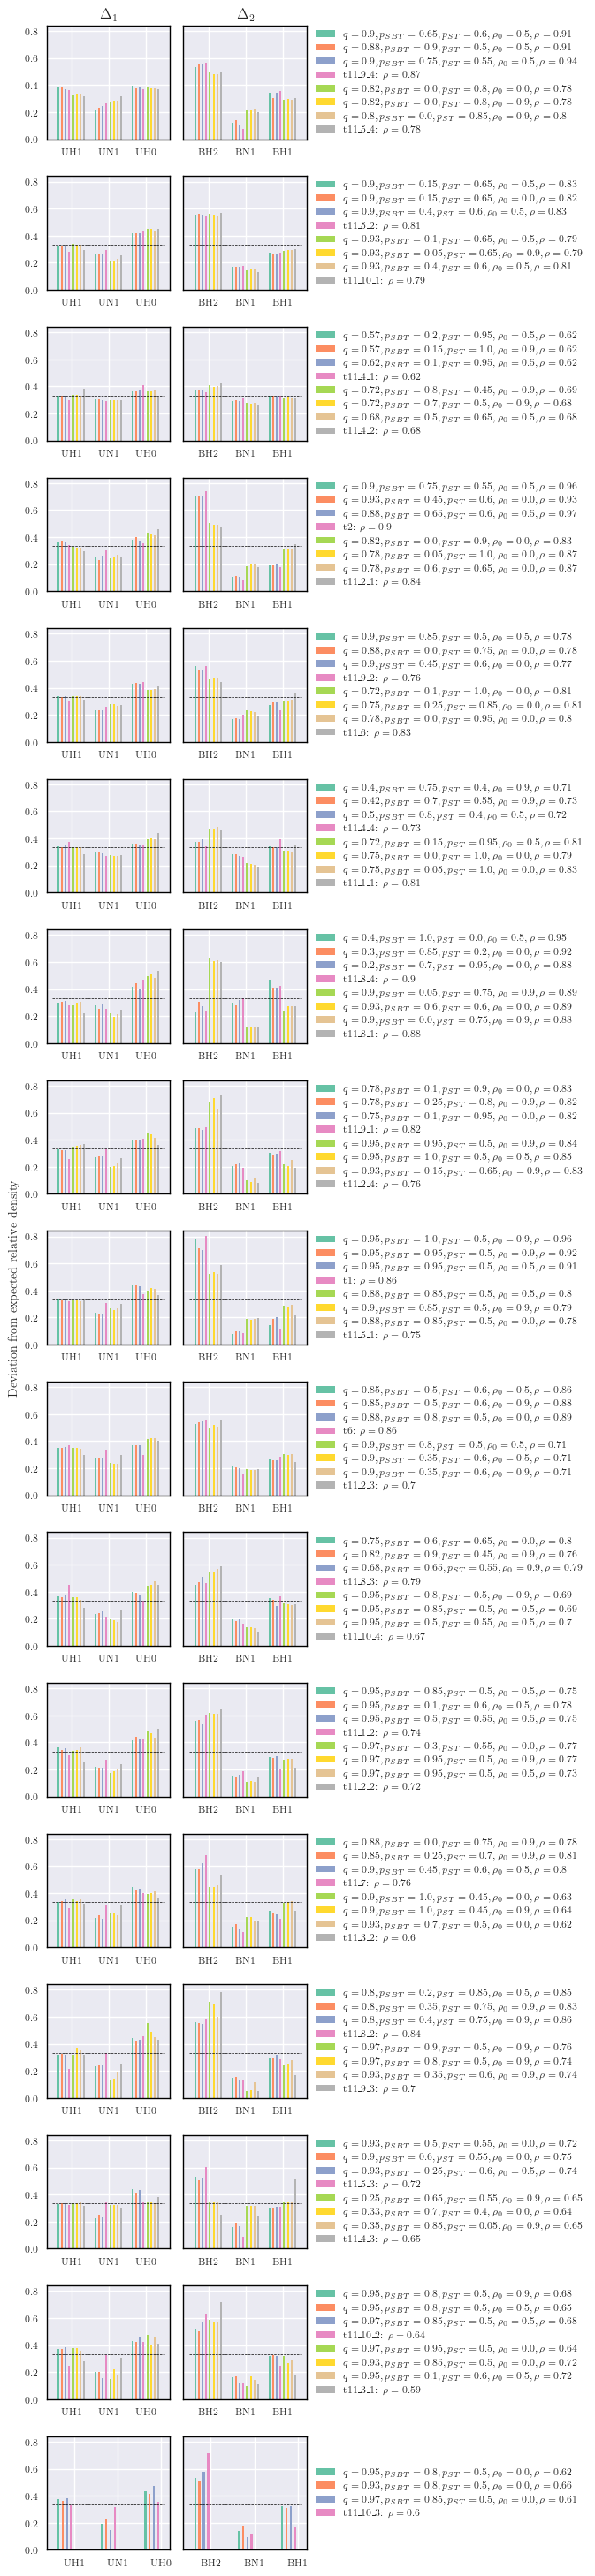

In [54]:

"""Showing results for all schools/classes
"""

save_ = True
fun_prepare_data = prepare_data4
linewidth = 0.5
addon = "_lvl4"
# orientation = 'h' # 'v' or 'h'
which_ticks = 'zero' #'zero', 'normal'
which_group = 0 #there can be `group_size` bars (8 at max). If data has more, which to show. If `add_real_data == True`, then there should be 7 at max. 
group_size = 7
add_real_data = True
show_error = True
show_rho = True

if fun_prepare_data == prepare_data5:
    line_level = 0
else:
    line_level = 1/3


school_groups, _ = create_school_groups(chosen_inds, school_order)

# wiki_pos = 0
# slash_pos = 1

width = 345
figsize = set_size(width)
figsize = (figsize[0] * 1.5 , figsize[1]*10)
fig, axes = plt.subplots(len(school_groups), 2, figsize=figsize, sharey=True)

all_sets = [n1_triads, n2_triads]

# Simulated nets
colors = sns.color_palette("Set2").as_hex()[:20]

triads_order = [n1_triads, n2_triads]
for triad_id, triads_set in enumerate(triads_order):
    for group_id, group in enumerate(school_groups):
        ydatas = []
        yerrs = []
        real_net_datas = None
        additional_label_datas = None
        real_net_additional_label_datas = None
        for school_id in group:
        # for triads_set in n1_triads:
            ydata, yerr = fun_prepare_data(df2_rho_gs[school_id].iloc[chosen_inds[school_id]],  triads_set, 
                                std_data = df2_rho_gs[school_id].iloc[chosen_inds[school_id]], addon = addon)

            ydata = ydata[ydata.columns[group_size*which_group:group_size*(which_group+1)]]
            if show_error:
                yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]
                yerr = yerr.loc[:,~ydata.columns.duplicated()].copy() 
            else:
                yerr = None
            ydata = ydata.loc[:,~ydata.columns.duplicated()].copy()
            
            ydatas.append(ydata)
            yerrs.append(yerr)

            if add_real_data:
                real_net_data, _ = fun_prepare_data(real_datasets_all[school_id],  triads_set)
                if real_net_datas is None:
                    real_net_datas = []
                real_net_datas.append(real_net_data)
            # else:
            #     real_net_data = None

            if show_rho:
                rhos = df2_rho_gs[school_id].iloc[chosen_inds[school_id]].rho.values
                data_rho = real_datasets_all[school_id].rho.values[0]
                
                if additional_label_datas is None:
                    additional_label_datas = []
                additional_label_datas.append(rhos)
                
                if real_net_additional_label_datas is None:
                    real_net_additional_label_datas = []
                real_net_additional_label_datas.append(data_rho)
            # else:
            #     rhos = None
            #     wiki_rho = None

        if group_id == 0:
            title = r'$\Delta_{k}$'.format(k = triad_id + 1)
        else:
            title = None
        plot_bar_nets2(axes[group_id, triad_id], ydatas, yerrs, triads_set, title, 
                    labels_s = None, line_level = line_level, 
                    linewidth = linewidth, colors=colors, 
                    width = 0.15, smallest_edge = True, m = 0.5, legend_elem = 4, 
                    real_net_datas = real_net_datas, additional_label_datas = additional_label_datas, 
                    real_net_additional_label_datas = real_net_additional_label_datas)

# fix tick rotations
for ax in axes.flatten():
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)
# fix tick labels
for ax in axes.flatten():
    ax.set_xticklabels([triad_names_map[tick.get_text()] for tick in ax.get_xticklabels()])
# drop double legend
for i in range(len(school_groups)):
    # axes[i, 1].get_legend().remove()
    # axes[i,1].set_ylabel('')
    # set legend to left top corner
    # if i==1:
    axes[i, 1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axes[i,1].set_ylabel('')
    axes[i,0].set_ylabel('')
    
# ticks = axes[i,0].get_yticklabels()
# ticks = axes[i,0].get_yticks()
# if which_ticks == "normal":
#     ticks2 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]) - 1/3
#     axes[1].set_yticks(ticks2)
#     # axes[i,0].set_yticks(ticks - 0.1)
#     axes[i].set_yticklabels([r'{tick:.1f}'.format(tick=tick+1/3) for tick in ticks2])
# else:
#     axes[1].set_yticks([-0.2, -0.1, 0, 0.1, 0.2])
    
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
# plt.xlabel("common X")
plt.ylabel("Deviation from expected relative density")

save_fig_path = Path("figs")
fname = 'barplots_sim_real_spanish_schoolclass_controldown_summary_transrho_2'
fname = fname + "_" + which_ticks
if linewidth is None:
    fname = fname + "_noline"
if show_error:
    fname = fname + "_err"
if show_rho:
    fname = fname + "_rho"

fig.tight_layout()
plt.show()
if save_:
    fname = fname + ".pdf"
    fig.savefig(save_fig_path / fname, dpi = 600, format='pdf', bbox_inches='tight') 

#### Saving errors

In [55]:
print(error_vals_min_all)
print(error_vals_min20)
print(error_vals_min10)
print(error_vals_minrel)
print(error_vals_minrho)
error_vals_min20

[0.00029122 0.00487702 0.00222176 0.00079616 0.00315804 0.00076577
 0.00123035 0.0016318  0.00125698 0.00643303 0.00598838 0.0007858
 0.00413068 0.00015479 0.00037265 0.00246351 0.00197303 0.00016891
 0.00214331 0.00129964 0.00264741 0.00528311 0.00161229 0.00031143
 0.00012523 0.00185029 0.00104743 0.00314992 0.00044951 0.00058045
 0.00440835 0.00131167 0.00187255]
[0.00029122 0.0231408  0.0418149  0.00621402 0.00413832 0.00224047
 0.02487829 0.0016318  0.00381949 0.01085432 0.00717106 0.00530265
 0.00483276 0.00030089 0.00218075 0.00246351 0.01973379 0.00016891
 0.00214331 0.00290058 0.03883425 0.00528311 0.04038047 0.00563543
 0.00014139 0.00615063 0.00282913 0.00606145 0.00044951 0.00188462
 0.01022698 0.00381561 0.00596061]
[0.00237082 0.0450841  0.07159762 0.01042758 0.00552577 0.00380383
 0.0332857  0.0016318  0.00381949 0.0167514  0.01023241 0.00530265
 0.01901387 0.00263552 0.00843818 0.00246351 0.02372568 0.00212706
 0.00214331 0.00303989 0.04064077 0.00528814 0.07779024 0.01

array([0.00029122, 0.0231408 , 0.0418149 , 0.00621402, 0.00413832,
       0.00224047, 0.02487829, 0.0016318 , 0.00381949, 0.01085432,
       0.00717106, 0.00530265, 0.00483276, 0.00030089, 0.00218075,
       0.00246351, 0.01973379, 0.00016891, 0.00214331, 0.00290058,
       0.03883425, 0.00528311, 0.04038047, 0.00563543, 0.00014139,
       0.00615063, 0.00282913, 0.00606145, 0.00044951, 0.00188462,
       0.01022698, 0.00381561, 0.00596061])

In [56]:
df_errors = pd.DataFrame({"school": datanames, "error_min": error_vals_min_all, "error_min20": error_vals_min20, "error_min10": error_vals_min10, 
              "error_rel": error_vals_minrel, "error_rho": error_vals_minrho})

df_errors

school  error_min  error_min20  error_min10  error_rel  error_rho
0   t11_10_1   0.000291     0.000291     0.002371   1.273797   0.003283
1   t11_10_2   0.004877     0.023141     0.045084   2.395820   0.050914
2   t11_10_3   0.002222     0.041815     0.071598   2.518557   0.075768
3   t11_10_4   0.000796     0.006214     0.010428   2.735871   0.013253
4    t11_9_1   0.003158     0.004138     0.005526   0.924182   0.008655
5    t11_9_2   0.000766     0.002240     0.003804   1.756734   0.004874
6    t11_9_3   0.001230     0.024878     0.033286   1.792786   0.033286
7    t11_9_4   0.001632     0.001632     0.001632   1.276234   0.001632
8    t11_8_1   0.001257     0.003819     0.003819   0.689189   0.007915
9    t11_8_2   0.006433     0.010854     0.016751   1.544802   0.020588
10   t11_8_3   0.005988     0.007171     0.010232   1.036285   0.012618
11   t11_8_4   0.000786     0.005303     0.005303   1.227409   0.006784
12     t11_7   0.004131     0.004833     0.019014   1.739962   0.019032
13     t11_6   0.000155     0.000301     0.002636   1.091412   0.004994
14   t11_5_1   0.000373     0.002181     0.008438   0.835555   0.010951
15   t11_5_2   0.002464     0.002464     0.002464   1.723395   0.002797
16   t11_5_3   0.001973     0.019734     0.023726   2.212697   0.034702
17   t11_5_4   0.000169     0.000169     0.002127   1.249232   0.002407
18   t11_4_1   0.002143     0.002143     0.002143   0.880881   0.003349
19   t11_4_2   0.001300     0.002901     0.003040   2.394481   0.003901
20   t11_4_3   0.002647     0.038834     0.040641   2.754883   0.044372
21   t11_4_4   0.005283     0.005283     0.005288   1.954780   0.005288
22   t11_3_1   0.001612     0.040380     0.077790   1.807397   0.051832
23   t11_3_2   0.000311     0.005635     0.013335   2.796923   0.019116
24   t11_2_1   0.000125     0.000141     0.000546   1.570078   0.004533
25   t11_2_2   0.001850     0.006151     0.009636   2.563413   0.015504
26   t11_2_3   0.001047     0.002829     0.006635   2.062675   0.012395
27   t11_2_4   0.003150     0.006061     0.009567   1.962104   0.009567
28   t11_1_1   0.000450     0.000450     0.006412   1.689466   0.006412
29   t11_1_2   0.000580     0.001885     0.007878   1.824303   0.014216
30        t1   0.004408     0.010227     0.018276   1.322679   0.010227
31        t2   0.001312     0.003816     0.003816   0.873818   0.004510
32        t6   0.001873     0.005961     0.009270   1.269444   0.012085

In [57]:
df_errors.to_csv(Path("spanish-schools-classes-bestfits-errors_2.csv"))

#### Best fit params

In [25]:
inds_smallests_all = get_smallest_inds(df2_rho_gs, error_functions, non_nan_cols)
inds_smallests_all

|                          |     q |    p |   ps |   rho_init |   repetitions |   rho_lvl |   rho_lvl_std |   rho_lvl_valid |   rho_sim_std |   rho_lvl2 |   rho_lvl2_std |   rho_lvl2_valid |   rho_sim_std2 |   rho_lvl3 |   rho_lvl3_std |   rho_lvl3_valid |   rho_sim_std3 |   rho_lvl_exp |   rho_lvl4 |   rho_lvl4_std |   rho_lvl4_valid |   rho_sim_std4 |     tr0_lvl |   tr0_lvl_std |   tr0_sim_std |    tr1_lvl |   tr1_lvl_std |   tr1_sim_std |     tr2_lvl |   tr2_lvl_std |   tr2_sim_std |   tr3_lvl |   tr3_lvl_std |   tr3_sim_std |    tr4_lvl |   tr4_lvl_std |   tr4_sim_std |   tr5_lvl |   tr5_lvl_std |   tr5_sim_std |   tr6_lvl |   tr6_lvl_std |   tr6_sim_std |   tr7_lvl |   tr7_lvl_std |   tr7_sim_std |    tr0_lvl3 |   tr0_lvl3_std |   tr0_sim_std3 |   tr1_lvl3 |   tr1_lvl3_std |   tr1_sim_std3 |    tr2_lvl3 |   tr2_lvl3_std |   tr2_sim_std3 |   tr3_lvl3 |   tr3_lvl3_std |   tr3_sim_std3 |   tr4_lvl3 |   tr4_lvl3_std |   tr4_sim_std3 |   tr5_lvl3 |   tr5_lvl3_std |   tr5_sim_std3 |   

KeyboardInterrupt: 

In [91]:
error_functions[[0]]

TypeError: list indices must be integers or slices, not list

In [58]:
inds_closests_all, inds_closests_all2 = get_closest_to_best_inds(df2_rho_gs, error_functions, 1.1, non_nan_cols)

[1, 1, 3, 9]
|                          |     q |    p |   ps |   rho_init |   repetitions |   rho_lvl |   rho_lvl_std |   rho_lvl_valid |   rho_sim_std |   rho_lvl2 |   rho_lvl2_std |   rho_lvl2_valid |   rho_sim_std2 |   rho_lvl3 |   rho_lvl3_std |   rho_lvl3_valid |   rho_sim_std3 |   rho_lvl_exp |   rho_lvl4 |   rho_lvl4_std |   rho_lvl4_valid |   rho_sim_std4 |     tr0_lvl |   tr0_lvl_std |   tr0_sim_std |    tr1_lvl |   tr1_lvl_std |   tr1_sim_std |     tr2_lvl |   tr2_lvl_std |   tr2_sim_std |   tr3_lvl |   tr3_lvl_std |   tr3_sim_std |    tr4_lvl |   tr4_lvl_std |   tr4_sim_std |   tr5_lvl |   tr5_lvl_std |   tr5_sim_std |   tr6_lvl |   tr6_lvl_std |   tr6_sim_std |   tr7_lvl |   tr7_lvl_std |   tr7_sim_std |    tr0_lvl3 |   tr0_lvl3_std |   tr0_sim_std3 |   tr1_lvl3 |   tr1_lvl3_std |   tr1_sim_std3 |    tr2_lvl3 |   tr2_lvl3_std |   tr2_sim_std3 |   tr3_lvl3 |   tr3_lvl3_std |   tr3_sim_std3 |   tr4_lvl3 |   tr4_lvl3_std |   tr4_sim_std3 |   tr5_lvl3 |   tr5_lvl3_std |   tr5_

In [59]:
best_params_values = get_param_ranges_dev(df2_rho_gs, inds_closests_all2, error_id = 0)
best_params_values = [best_param_values[0] for best_param_values in best_params_values]
best_params_values = [[round(value, 10) for value in best_param_values] for best_param_values in best_params_values]
best_params_values[:5]

[[0.925, 0.5, 0.65, 0.025, 0.05, 0.05],
 [0.8875, 0.3, 0.75, 0.0375, 0.1, 0.05],
 [0.875, 0.95, 0.45, 0.025, 0.05, 0.05],
 [0.825, 0.95, 0.55, 0.025, 0.05, 0.05],
 [0.825, 0.75, 0.6, 0.025, 0.05, 0.05]]

In [60]:
df_bestparams = pd.DataFrame(best_params_values,columns=["q", "psbt", "pst", "dev_q", "dev_psbt", "dev_pst"])
df_bestparams["school"] = datanames
df_bestparams["err_all"] = error_vals_min_all
df_bestparams.set_index("school", inplace=True, drop = True)
df_bestparams.head(3)

q  psbt   pst   dev_q  dev_psbt  dev_pst   err_all
school                                                           
t11_10_1  0.9250  0.50  0.65  0.0250      0.05     0.05  0.000291
t11_10_2  0.8875  0.30  0.75  0.0375      0.10     0.05  0.004877
t11_10_3  0.8750  0.95  0.45  0.0250      0.05     0.05  0.002222

In [61]:
df_bestparams.to_csv(Path("spanish-schools-classes-bestfits-all-2.csv"))

In [62]:
best_params_values_rho = get_param_ranges_dev(df2_rho_gs, inds_closests_all2, error_id = 1)
best_params_values_rho = [best_param_values[0] for best_param_values in best_params_values_rho]
best_params_values_rho = [[round(value, 10) for value in best_param_values] for best_param_values in best_params_values_rho]
best_params_values_rho[:5]

[[0.925, 0.05, 0.65, 0.025, 0.05, 0.05],
 [0.95, 0.8, 0.5, 0.025, 0.05, 0.05],
 [0.9607142857, 0.8, 0.5071428571, 0.05, 0.3, 0.075],
 [0.95, 0.5625, 0.5375, 0.025, 0.425, 0.1],
 [0.7636363636, 0.1181818182, 0.9045454545, 0.0625, 0.175, 0.15]]

In [63]:
df_bestparams_rho = pd.DataFrame(best_params_values_rho,columns=["q", "psbt", "pst", "dev_q", "dev_psbt", "dev_pst"])
df_bestparams_rho["school"] = datanames
df_bestparams_rho["errrho"] = error_vals_minrho
df_bestparams_rho.set_index("school", inplace=True, drop = True)
df_bestparams_rho.to_csv(Path("spanish-schools-classes-bestfits-rho-2.csv"))
df_bestparams_rho.head(3)

q  psbt       pst  dev_q  dev_psbt  dev_pst    errrho
school                                                                
t11_10_1  0.925000  0.05  0.650000  0.025      0.05    0.050  0.003283
t11_10_2  0.950000  0.80  0.500000  0.025      0.05    0.050  0.050914
t11_10_3  0.960714  0.80  0.507143  0.050      0.30    0.075  0.075768

In [64]:
best_params_values_rel = get_param_ranges_dev(df2_rho_gs, inds_closests_all2, error_id = 3)
best_params_values_rel = [best_param_values[0] for best_param_values in best_params_values_rel]
best_params_values_rel = [[round(value, 10) for value in best_param_values] for best_param_values in best_params_values_rel]
best_params_values_rel[:5]

[[0.9444444444, 0.3666666667, 0.5833333333, 0.04375, 0.5, 0.125],
 [0.7, 0.925, 0.325, 0.2625, 0.15, 0.275],
 [0.3888888889, 0.7777777778, 0.5555555556, 0.35, 0.25, 0.525],
 [0.7512254902, 0.5588235294, 0.6735294118, 0.475, 0.55, 0.575],
 [0.8, 0.9, 0.45, 0.025, 0.05, 0.05]]

In [65]:
df_bestparams_rel = pd.DataFrame(best_params_values_rel,columns=["q", "psbt", "pst", "dev_q", "dev_psbt", "dev_pst"])
df_bestparams_rel["school"] = datanames
df_bestparams_rel["errrho"] = error_vals_minrel
df_bestparams_rel.set_index("school", inplace=True, drop = True)
df_bestparams_rel.to_csv(Path("spanish-schools-classes-bestfits-rel-2.csv"))
df_bestparams_rel.head(3)

q      psbt       pst    dev_q  dev_psbt  dev_pst    errrho
school                                                                      
t11_10_1  0.944444  0.366667  0.583333  0.04375      0.50    0.125  1.273797
t11_10_2  0.700000  0.925000  0.325000  0.26250      0.15    0.275  2.395820
t11_10_3  0.388889  0.777778  0.555556  0.35000      0.25    0.525  2.518557

In [66]:
inds_closests20, inds_closests20_2 = get_closest_to_best_inds(df2_rho_gs, error_functions, 1.1, non_nan_cols, min_rho, max_rho, verbose = False)


In [67]:
best_params_values20 = get_param_ranges_dev(df2_rho_gs, inds_closests20_2, error_id = 0)
best_params_values20 = [best_param_values[0] for best_param_values in best_params_values20]
best_params_values20 = [[round(value, 10) for value in best_param_values] for best_param_values in best_params_values20]
best_params_values20[:5]

[[0.925, 0.5, 0.65, 0.025, 0.05, 0.05],
 [0.9375, 0.425, 0.6, 0.0375, 0.275, 0.1],
 [0.9375, 0.45, 0.575, 0.0375, 0.15, 0.075],
 [0.905, 0.29, 0.68, 0.0375, 0.275, 0.125],
 [0.65, 0.65, 0.85, 0.025, 0.05, 0.05]]

In [68]:
df_bestparams20 = pd.DataFrame(best_params_values20,columns=["q", "psbt", "pst", "dev_q", "dev_psbt", "dev_pst"])
df_bestparams20["school"] = datanames
df_bestparams20["err20"] = error_vals_min20
df_bestparams20.set_index("school", inplace=True, drop = True)
df_bestparams20.to_csv(Path("spanish-schools-classes-bestfits20-2.csv"))
df_bestparams20.head(3)

q   psbt    pst   dev_q  dev_psbt  dev_pst     err20
school                                                             
t11_10_1  0.9250  0.500  0.650  0.0250     0.050    0.050  0.000291
t11_10_2  0.9375  0.425  0.600  0.0375     0.275    0.100  0.023141
t11_10_3  0.9375  0.450  0.575  0.0375     0.150    0.075  0.041815

In [26]:
error_functions

[<function __main__.closest_to_six_triads_transformed(original_data, model_data, is_data_transformed=False)>,
 <function __main__.closest_to_six_triads_rho_transformed(original_data, model_data, is_data_transformed=False, rho_factor=5)>,
 <function __main__.closest_to_six_triads(original_data, model_data)>,
 <function __main__.closest_to_six_triads_relative(original_data, model_data)>]

In [27]:
inds_closests10, inds_closests10_2 = get_closest_to_best_inds(df2_rho_gs, [error_functions[0]], 1.1, non_nan_cols, lambda x: min_rho(x, 0.1), lambda x: max_rho(x, 0.1), verbose = False)



In [28]:
import pickle

In [31]:
file = open("spanish_schools_closest_to_best.pkl", 'wb')
pickle.dump(inds_closests10, file)

In [32]:
with open('spanish_schools_closest_to_best.pkl', 'rb') as f:
    inds_closests10 = pickle.load(f)

# inds_closests10_copy == inds_closests10

True

In [38]:
# pd.DataFrame(inds_closests10)
# specific_schools[21]
# np.savetxt(Path(outputs_dir))
np.array([np.array(close) for close in inds_closests10])
# np.savetxt("spanish_schools_closest_to_best.txt", inds_closests10)

/tmp/ipykernel_88913/2746752448.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([np.array(close) for close in inds_closests10])


array([array([3057]), array([5372, 6317]),
       array([5308, 6016, 6425, 6750]),
       array([4265, 4521, 4551, 4582, 5389, 5422]), array([4893]),
       array([3418, 4508]), array([5685]), array([3150]),
       array([3591, 4227]), array([2038, 2505]), array([3858]),
       array([1754]), array([6725, 6892, 7796]), array([2709, 3153]),
       array([4611]), array([3293, 3543]), array([4160]),
       array([3264, 3776, 3928, 5367]), array([1766, 4108]),
       array([3039]),
       array([ 124,  518,  590,  600,  606,  620, 1125, 1141, 1143, 1619, 1628,
              2173, 2676, 4581, 4753, 6200, 6656, 6743, 7066, 7253, 7300])     ,
       array([3016]), array([5984, 6716]), array([4593]), array([2032]),
       array([5581]), array([5176]), array([4982]),
       array([1623, 2111, 2112, 2142, 2154]), array([4305]),
       array([3846]), array([3142, 4645]), array([3167, 4199])],
      dtype=object)

IndexError: string index out of range

In [70]:
best_params_values10 = get_param_ranges_dev(df2_rho_gs, inds_closests10_2, error_id = 0)
best_params_values10 = [best_param_values[0] for best_param_values in best_params_values10]
best_params_values10 = [[round(value, 10) for value in best_param_values] for best_param_values in best_params_values10]
best_params_values10[:5]

[[0.9, 0.0, 0.75, 0.025, 0.05, 0.05],
 [0.9625, 0.725, 0.525, 0.0375, 0.275, 0.075],
 [0.95625, 0.7625, 0.5125, 0.05, 0.3, 0.075],
 [0.9333333333, 0.625, 0.55, 0.0375, 0.475, 0.125],
 [0.75, 0.15, 1.0, 0.025, 0.05, 0.05]]

In [71]:
df_bestparams10 = pd.DataFrame(best_params_values10,columns=["q", "psbt", "pst", "dev_q", "dev_psbt", "dev_pst"])
df_bestparams10["school"] = datanames
df_bestparams10["err10"] = error_vals_min10
df_bestparams10.set_index("school", inplace=True, drop = True)
df_bestparams10.to_csv(Path("spanish-schools-classes-bestfits10-2.csv"))
df_bestparams10.head(3)

q    psbt     pst   dev_q  dev_psbt  dev_pst     err10
school                                                                
t11_10_1  0.90000  0.0000  0.7500  0.0250     0.050    0.050  0.002371
t11_10_2  0.96250  0.7250  0.5250  0.0375     0.275    0.075  0.045084
t11_10_3  0.95625  0.7625  0.5125  0.0500     0.300    0.075  0.071598

### Average best results

In [33]:
inds_closests10

[[3057],
 [5372, 6317],
 [5308, 6016, 6425, 6750],
 [4265, 4521, 4551, 4582, 5389, 5422],
 [4893],
 [3418, 4508],
 [5685],
 [3150],
 [3591, 4227],
 [2038, 2505],
 [3858],
 [1754],
 [6725, 6892, 7796],
 [2709, 3153],
 [4611],
 [3293, 3543],
 [4160],
 [3264, 3776, 3928, 5367],
 [1766, 4108],
 [3039],
 [124,
  518,
  590,
  600,
  606,
  620,
  1125,
  1141,
  1143,
  1619,
  1628,
  2173,
  2676,
  4581,
  4753,
  6200,
  6656,
  6743,
  7066,
  7253,
  7300],
 [3016],
 [5984, 6716],
 [4593],
 [2032],
 [5581],
 [5176],
 [4982],
 [1623, 2111, 2112, 2142, 2154],
 [4305],
 [3846],
 [3142, 4645],
 [3167, 4199]]

In [53]:
df_temp = df2_rho_gs[0].iloc[inds_closests10[0]]
df_temp.columns

Index(['q', 'p', 'ps', 'rho_init', 'repetitions', 'rho_lvl', 'rho_lvl_std',
       'rho_lvl_valid', 'rho_sim_std', 'rho_lvl2', 'rho_lvl2_std',
       'rho_lvl2_valid', 'rho_sim_std2', 'rho_lvl3', 'rho_lvl3_std',
       'rho_lvl3_valid', 'rho_sim_std3', 'rho_lvl_exp', 'rho_lvl4',
       'rho_lvl4_std', 'rho_lvl4_valid', 'rho_sim_std4', 'tr0_lvl',
       'tr0_lvl_std', 'tr0_sim_std', 'tr1_lvl', 'tr1_lvl_std', 'tr1_sim_std',
       'tr2_lvl', 'tr2_lvl_std', 'tr2_sim_std', 'tr3_lvl', 'tr3_lvl_std',
       'tr3_sim_std', 'tr4_lvl', 'tr4_lvl_std', 'tr4_sim_std', 'tr5_lvl',
       'tr5_lvl_std', 'tr5_sim_std', 'tr6_lvl', 'tr6_lvl_std', 'tr6_sim_std',
       'tr7_lvl', 'tr7_lvl_std', 'tr7_sim_std', 'tr0_lvl3', 'tr0_lvl3_std',
       'tr0_sim_std3', 'tr1_lvl3', 'tr1_lvl3_std', 'tr1_sim_std3', 'tr2_lvl3',
       'tr2_lvl3_std', 'tr2_sim_std3', 'tr3_lvl3', 'tr3_lvl3_std',
       'tr3_sim_std3', 'tr4_lvl3', 'tr4_lvl3_std', 'tr4_sim_std3', 'tr5_lvl3',
       'tr5_lvl3_std', 'tr5_sim_std3', 'tr6_lvl

In [36]:
df_temp = df2_rho_gs[1].iloc[inds_closests10[1]]
df_temp

q     p    ps  rho_init  repetitions   rho_lvl  \
0.950 0.50 0.55 0.5  0.950  0.50  0.55       0.5            1  0.731473   
0.975 0.95 0.50 0.0  0.975  0.95  0.50       0.0            1  0.735273   

                     rho_lvl_std  rho_lvl_valid  rho_sim_std  rho_lvl2  ...  \
0.950 0.50 0.55 0.5          0.0              1     0.027176  0.726936  ...   
0.975 0.95 0.50 0.0          0.0              1     0.027702  0.737132  ...   

                          tr2       tr3       tr4       tr5       tr6  \
0.950 0.50 0.55 0.5  0.024640  0.129886  0.048045  0.067892  0.165564   
0.975 0.95 0.50 0.0  0.017892  0.130393  0.049030  0.058449  0.161119   

                          tr7  closest_to_six_triads_transformed  \
0.950 0.50 0.55 0.5  0.446850                           0.045084   
0.975 0.95 0.50 0.0  0.454049                           0.046892   

                     closest_to_six_triads_rho_transformed  \
0.950 0.50 0.55 0.5                               0.060591   
0.975 0.95 0.50 0.0                               0.062104   

                     closest_to_six_triads  closest_to_six_triads_relative  
0.950 0.50 0.55 0.5               0.023252                        3.426879  
0.975 0.95 0.50 0.0               0.021033                        3.649009  

[2 rows x 107 columns]

In [37]:
df_temp.aggregate(['mean', 'std', 'sum'])

q         p        ps  rho_init  repetitions   rho_lvl  \
mean  0.962500  0.725000  0.525000  0.250000          1.0  0.733373   
std   0.017678  0.318198  0.035355  0.353553          0.0  0.002687   
sum   1.925000  1.450000  1.050000  0.500000          2.0  1.466746   

      rho_lvl_std  rho_lvl_valid  rho_sim_std  rho_lvl2  ...       tr2  \
mean          0.0            1.0     0.027439  0.732034  ...  0.021266   
std           0.0            0.0     0.000372  0.007210  ...  0.004772   
sum           0.0            2.0     0.054878  1.464069  ...  0.042532   

           tr3       tr4       tr5       tr6       tr7  \
mean  0.130140  0.048538  0.063170  0.163342  0.450450   
std   0.000359  0.000696  0.006677  0.003143  0.005091   
sum   0.260280  0.097075  0.126341  0.326683  0.900899   

      closest_to_six_triads_transformed  \
mean                           0.045988   
std                            0.001279   
sum                            0.091977   

      closest_to_six_triads_rho_transformed  closest_to_six_triads  \
mean                               0.061348               0.022143   
std                                0.001070               0.001569   
sum                                0.122695               0.044285   

      closest_to_six_triads_relative  
mean                        3.537944  
std                         0.157069  
sum                         7.075888  

[3 rows x 107 columns]

In [69]:
df_temp.columns[90:110]

Index(['tr6_sim_std4', 'tr7_lvl4', 'tr7_lvl4_std', 'tr7_sim_std4', 'rho',
       'tr0', 'tr1', 'tr2', 'tr3', 'tr4', 'tr5', 'tr6', 'tr7',
       'closest_to_six_triads_transformed',
       'closest_to_six_triads_rho_transformed', 'closest_to_six_triads',
       'closest_to_six_triads_relative'],
      dtype='object')

In [38]:
def add_method_err(err, met_err):
    return np.sqrt(err**2 / 3 + met_err**2)

In [127]:
columns = ['q', 'p', 'ps', 'rho',
       'tr0', 'tr1', 'tr2', 'tr3', 'tr4', 'tr5', 'tr6', 'tr7',]

df_temp_mean = df_temp.aggregate(['mean'])[columns]
df_temp_mean["school"] = datanames[1]
df_temp_mean.set_index("school", inplace = True, drop=True)

df_temp_std = df_temp.aggregate(['std'])[columns]
df_temp_std["school"] = datanames[1]
df_temp_std.set_index("school", inplace = True, drop=True)

df_temp_std.columns = [col + "_std" for col in df_temp_std]

# print(df_temp_std.q_std)
df_temp_std.q_std = add_method_err(0.025/2, df_temp_std.q_std)
df_temp_std.p_std = add_method_err(0.05/2, df_temp_std.p_std)
df_temp_std.ps_std = add_method_err(0.05/2, df_temp_std.ps_std)

df_temp_sum = df_temp.aggregate(['sum'])[['repetitions']]
df_temp_sum["school"] = datanames[1]
df_temp_sum.set_index("school", inplace = True, drop=True)

pd.concat([df_temp_mean, df_temp_std, df_temp_sum], axis = 1)

q      p     ps       rho       tr0       tr1       tr2  \
school                                                                   
t11_10_2  0.9625  0.725  0.525  0.731951  0.031651  0.091444  0.021266   

              tr3       tr4      tr5  ...   rho_std   tr0_std   tr1_std  \
school                                ...                                 
t11_10_2  0.13014  0.048538  0.06317  ...  0.000596  0.001639  0.006807   

           tr2_std   tr3_std   tr4_std   tr5_std   tr6_std   tr7_std  \
school                                                                 
t11_10_2  0.004772  0.000359  0.000696  0.006677  0.003143  0.005091   

          repetitions  
school                 
t11_10_2            2  

[1 rows x 25 columns]

In [128]:
df_temp_std

q_std     p_std    ps_std   rho_std   tr0_std   tr1_std  \
school                                                                 
t11_10_2  0.021651  0.319179  0.043301  0.000596  0.001639  0.006807   

           tr2_std   tr3_std   tr4_std   tr5_std   tr6_std   tr7_std  
school                                                                
t11_10_2  0.004772  0.000359  0.000696  0.006677  0.003143  0.005091

In [39]:
def add_method_err(err, met_err):
    return np.sqrt(err**2 / 3 + met_err**2)

def ave_std(series):
    """When we have a series of std. And for another series we take the mean, 
    then we would like to know what is the std dev of the new result. 
    And std dev will include std devs of partial results. This
    function will calculate this. 

    Args:
        series (_type_): _description_
    """
    return np.sqrt(np.sum(series ** 2)) / len(series)

def average_best_results(df2, inds_closest10, dataname, q_grid = 0.025, p_grid = 0.5, ps_grid = 0.5, which_rho = 4):
   columns = ['q', 'p', 'ps', 'rho',
       'tr0', 'tr1', 'tr2', 'tr3', 'tr4', 'tr5', 'tr6', 'tr7',]

   df_temp = df2.iloc[inds_closest10]
   df_temp_mean = df_temp.aggregate(['mean'])[columns]
   df_temp_mean["school"] = dataname
   df_temp_mean.set_index("school", inplace = True, drop=True)
   
#    df_temp_mean.columns = [col + "_mean" for col in df_temp_mean]

   df_temp_std = df_temp.aggregate(['std'])[columns]
   df_temp_std["school"] = dataname
   df_temp_std.set_index("school", inplace = True, drop=True)

   df_temp_std.columns = [col + "_std" for col in df_temp_std]
   
   part_cols = [col + "_sim_std" + str(which_rho) for col in columns[3:]]
   df_temp_std_partials = df_temp.aggregate([ave_std])[part_cols]

   # print(df_temp_std.q_std)
   df_temp_std.q_std = add_method_err(q_grid / 2, df_temp_std.q_std) if not any(np.isnan(df_temp_std.q_std) ) else add_method_err(q_grid / 2, 0)
   df_temp_std.p_std = add_method_err(p_grid / 2, df_temp_std.p_std) if not any(np.isnan(df_temp_std.p_std) ) else add_method_err(p_grid / 2, 0)
   df_temp_std.ps_std = add_method_err(ps_grid / 2, df_temp_std.ps_std) if not any(np.isnan(df_temp_std.ps_std) ) else add_method_err(ps_grid / 2, 0)
   
   for col, pcol in zip(columns[3:], part_cols):
       df_temp_std[col + "_std"] = df_temp_std_partials[pcol].values
    

   df_temp_sum = df_temp.aggregate(['sum'])[['repetitions']]
   df_temp_sum["school"] = dataname
   df_temp_sum.set_index("school", inplace = True, drop=True)

   return pd.concat([df_temp_mean, df_temp_std, df_temp_sum], axis = 1)
      

In [40]:
df_bests = [average_best_results(df2, inds_closest10, dataname) for (df2, inds_closest10, dataname) in zip(df2_rho_gs, inds_closests10, datanames)]

In [41]:
pd.concat(df_bests)

q         p        ps       rho       tr0       tr1  \
school                                                                 
t11_10_1  0.900000  0.000000  0.750000  0.873860  0.004580  0.027000   
t11_10_2  0.962500  0.725000  0.525000  0.731951  0.031651  0.091444   
t11_10_3  0.956250  0.762500  0.512500  0.678185  0.046147  0.119032   
t11_10_4  0.933333  0.625000  0.550000  0.755349  0.025068  0.081036   
t11_9_1   0.750000  0.150000  1.000000  0.921573  0.000891  0.008887   
t11_9_2   0.850000  0.100000  0.775000  0.844948  0.007948  0.041151   
t11_9_3   0.975000  0.800000  0.500000  0.742375  0.047138  0.129795   
t11_9_4   0.900000  0.750000  0.550000  0.935037  0.001804  0.013196   
t11_8_1   0.937500  0.750000  0.625000  0.972693  0.000391  0.003387   
t11_8_2   0.762500  0.275000  0.875000  0.927659  0.002664  0.018114   
t11_8_3   0.750000  0.600000  0.650000  0.883739  0.008122  0.022059   
t11_8_4   0.250000  0.850000  0.750000  0.979838  0.000036  0.000766   
t11_7     0.908333  0.500000  0.600000  0.832807  0.012658  0.060417   
t11_6     0.737500  0.350000  0.875000  0.923562  0.001352  0.009873   
t11_5_1   0.900000  0.200000  0.650000  0.836195  0.008704  0.047882   
t11_5_2   0.875000  0.400000  0.625000  0.864513  0.006121  0.033125   
t11_5_3   0.925000  0.600000  0.550000  0.819952  0.013094  0.054013   
t11_5_4   0.787500  0.150000  0.825000  0.845166  0.006153  0.032712   
t11_4_1   0.600000  0.125000  0.875000  0.545514  0.095908  0.122969   
t11_4_2   0.675000  0.650000  0.550000  0.719011  0.031248  0.074181   
t11_4_3   0.147619  0.709524  0.445238  0.694793  0.035317  0.068703   
t11_4_4   0.400000  0.750000  0.400000  0.711524  0.037209  0.071076   
t11_3_1   0.962500  0.900000  0.500000  0.664119  0.055430  0.127441   
t11_3_2   0.900000  0.750000  0.500000  0.693100  0.039494  0.092601   
t11_2_1   0.775000  0.200000  1.000000  0.943539  0.000466  0.005503   
t11_2_2   0.975000  0.400000  0.550000  0.811392  0.011292  0.058482   
t11_2_3   0.875000  0.300000  0.650000  0.788500  0.015285  0.057482   
t11_2_4   0.950000  1.000000  0.500000  0.854725  0.008330  0.051878   
t11_1_1   0.770000  0.070000  0.890000  0.749953  0.019347  0.065433   
t11_1_2   0.925000  0.600000  0.550000  0.831733  0.008763  0.044512   
t1        0.925000  0.450000  0.600000  0.952785  0.001004  0.010412   
t2        0.875000  0.500000  0.650000  0.976869  0.000314  0.004706   
t6        0.800000  0.525000  0.625000  0.951607  0.001001  0.008311   

               tr2       tr3       tr4       tr5  ...   rho_std   tr0_std  \
school                                            ...                       
t11_10_1  0.007756  0.062953  0.014008  0.046471  ...  0.021034  0.002023   
t11_10_2  0.021266  0.130140  0.048538  0.063170  ...  0.019184  0.006102   
t11_10_3  0.026963  0.130599  0.064236  0.063624  ...  0.012519  0.005753   
t11_10_4  0.020771  0.111955  0.042769  0.066822  ...  0.009858  0.002731   
t11_9_1   0.003647  0.033412  0.005782  0.029956  ...  0.009831  0.000348   
t11_9_2   0.012871  0.081448  0.020285  0.062451  ...  0.020638  0.002473   
t11_9_3   0.010878  0.098350  0.047165  0.037083  ...  0.029739  0.015242   
t11_9_4   0.002364  0.035896  0.008060  0.023950  ...  0.016122  0.001409   
t11_8_1   0.000710  0.011020  0.001730  0.008970  ...  0.008539  0.000351   
t11_8_2   0.004477  0.031664  0.008644  0.025664  ...  0.018790  0.001899   
t11_8_3   0.007353  0.039840  0.016340  0.024942  ...  0.032887  0.004984   
t11_8_4   0.001253  0.006519  0.001606  0.005802  ...  0.010160  0.000187   
t11_7     0.012187  0.080022  0.023144  0.046888  ...  0.012806  0.002295   
t11_6     0.004271  0.041061  0.006923  0.035316  ...  0.013445  0.000584   
t11_5_1   0.012702  0.085211  0.021221  0.069901  ...  0.020225  0.002446   
t11_5_2   0.010823  0.073258  0.015555  0.064982  ...  0.032712  0.003495   
t11_5_3   0.015539  0.096086  0.027231  0.070927  ...  0.059283  0.009603   
t11_5_4   0.014467  0.086174  0.0

In [42]:
pd.concat(df_bests).to_hdf("spanish_ave_best3.h5", key = "df_bests")

In [26]:
df_bests_s = pd.read_hdf("spanish_ave_best3.h5")
# df_bests = [df_bests_s.iloc[ind:ind] for ind, row in df_bests_s.iterrows()]
df_bests = [df_bests_s.iloc[ind:ind+1] for ind in range(len(df_bests_s))]
df_bests[0]

q    p    ps      rho      tr0    tr1       tr2       tr3  \
school                                                                  
t11_10_1  0.9  0.0  0.75  0.87386  0.00458  0.027  0.007756  0.062953   

               tr4       tr5  ...   rho_std   tr0_std   tr1_std   tr2_std  \
school                        ...                                           
t11_10_1  0.014008  0.046471  ...  0.021034  0.002023  0.008118  0.002708   

           tr3_std   tr4_std   tr5_std   tr6_std  tr7_std  repetitions  
school                                                                  
t11_10_1  0.013946  0.004499  0.009069  0.014697  0.04844            1  

[1 rows x 25 columns]

In [22]:
len(df_bests_s)

33

In [12]:
df_bests[0].set_index(['q', 'p', 'ps'])

KeyError: 0

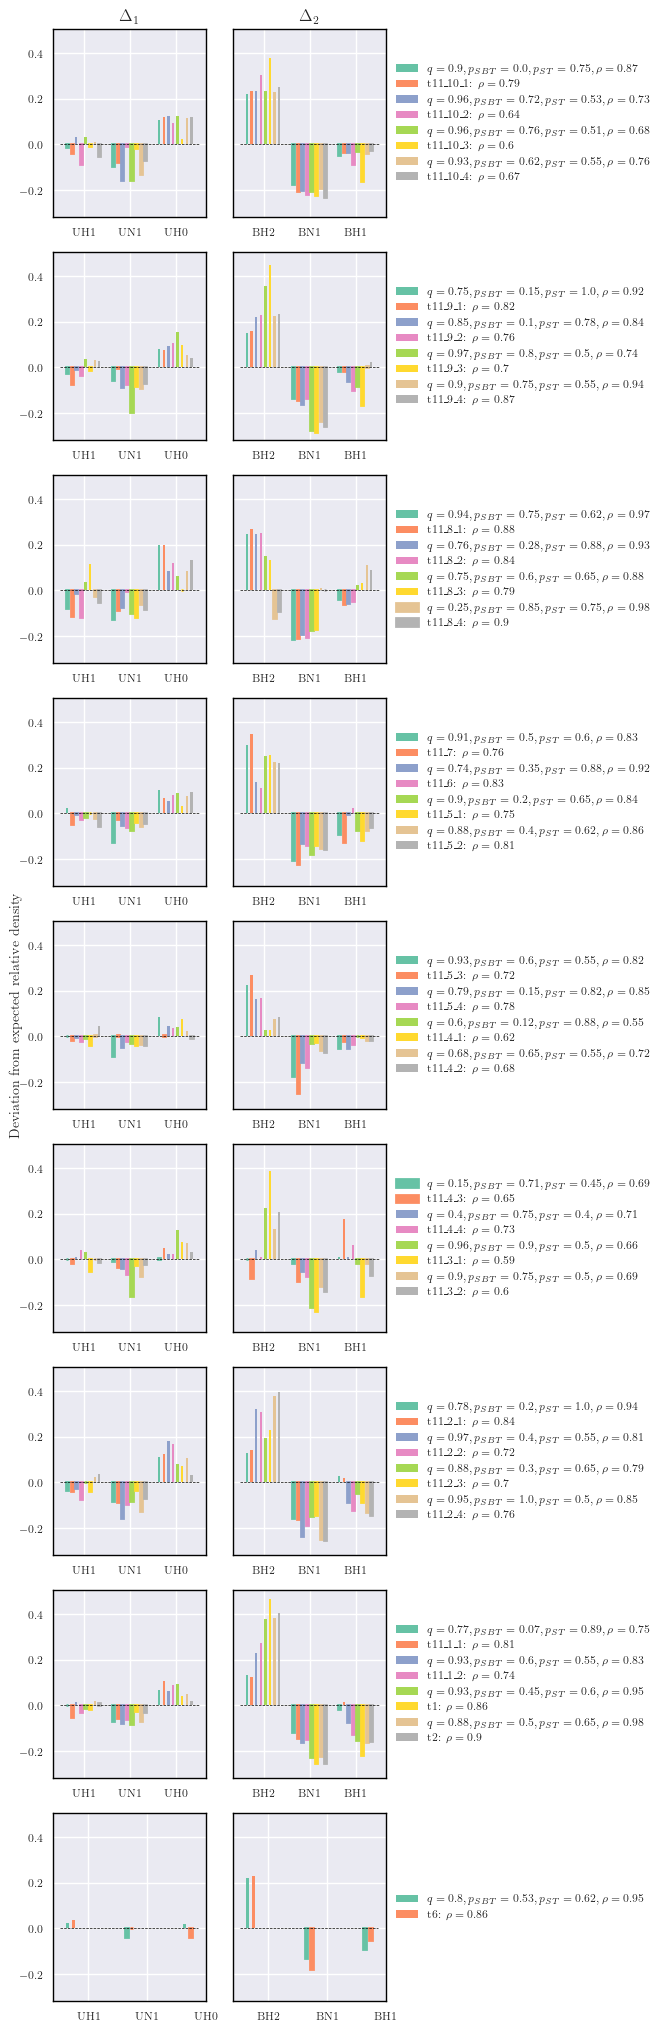

In [53]:

"""Showing results for all schools/classes
"""

save_ = False
fun_prepare_data = prepare_data5
linewidth = 0.5
addon = ""
# orientation = 'h' # 'v' or 'h'
which_ticks = 'zero' #'zero', 'normal'
which_group = 0 #there can be `group_size` bars (8 at max). If data has more, which to show. If `add_real_data == True`, then there should be 7 at max. 
group_size = 7
add_real_data = True
show_error = True
show_rho = True

if fun_prepare_data == prepare_data5:
    line_level = 0
else:
    line_level = 1/3


# school_groups, _ = create_school_groups(chosen_inds, school_order)
school_groups = [list(range(i*4, i*4+4)) for i in range(0,9) ]
school_groups[-1] = [32,]

# wiki_pos = 0
# slash_pos = 1

width = 345
figsize = set_size(width)
figsize = (figsize[0] * 1.5 , figsize[1]*7)
fig, axes = plt.subplots(9, 2, figsize=figsize, sharey=True)

all_sets = [n1_triads, n2_triads]

# Simulated nets
colors = sns.color_palette("Set2").as_hex()[:20]

triads_order = [n1_triads, n2_triads]
for triad_id, triads_set in enumerate(triads_order):
    for group_id, group in enumerate(school_groups):
        ydatas = []
        yerrs = []
        real_net_datas = None
        additional_label_datas = None
        real_net_additional_label_datas = None
        for school_id in group:
        # for triads_set in n1_triads:
            df_temp = df_bests[school_id].set_index(['q', 'p', 'ps'])
            ydata, yerr = fun_prepare_data(df_temp,  triads_set, 
                                std_data = df_temp, addon = addon)

            # ydata = ydata[ydata.columns[group_size*which_group:group_size*(which_group+1)]]
            if show_error:
                # yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]
                # yerr = yerr.loc[:,~ydata.columns.duplicated()].copy() 
                pass
            else:
                yerr = None
            # ydata = ydata.loc[:,~ydata.columns.duplicated()].copy()
            
            ydatas.append(ydata)
            yerrs.append(yerr)

            if add_real_data:
                real_net_data, _ = fun_prepare_data(real_datasets_all[school_id],  triads_set)
                if real_net_datas is None:
                    real_net_datas = []
                real_net_datas.append(real_net_data)
            # else:
            #     real_net_data = None

            if show_rho:
                rhos = df_temp.rho.values
                # rhos = df2_rho_gs[school_id].iloc[chosen_inds[school_id]].rho.values
                data_rho = real_datasets_all[school_id].rho.values[0]
                
                if additional_label_datas is None:
                    additional_label_datas = []
                additional_label_datas.append(rhos)
                
                if real_net_additional_label_datas is None:
                    real_net_additional_label_datas = []
                real_net_additional_label_datas.append(data_rho)
            # else:
            #     rhos = None
            #     wiki_rho = None

        if group_id == 0:
            title = r'$\Delta_{k}$'.format(k = triad_id + 1)
        else:
            title = None
        plot_bar_nets2(axes[group_id, triad_id], ydatas, yerrs, triads_set, title, 
                    labels_s = None, line_level = line_level, 
                    linewidth = linewidth, colors=colors, 
                    width = 0.15, smallest_edge = True, m = 0.5, legend_elem = 3, 
                    real_net_datas = real_net_datas, additional_label_datas = additional_label_datas, 
                    real_net_additional_label_datas = real_net_additional_label_datas)

# fix tick rotations
for ax in axes.flatten():
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)
# fix tick labels
for ax in axes.flatten():
    ax.set_xticklabels([triad_names_map[tick.get_text()] for tick in ax.get_xticklabels()])
# drop double legend
for i in range(len(school_groups)):
    # axes[i, 1].get_legend().remove()
    # axes[i,1].set_ylabel('')
    # set legend to left top corner
    # if i==1:
    axes[i, 1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axes[i,1].set_ylabel('')
    axes[i,0].set_ylabel('')
    
# ticks = axes[i,0].get_yticklabels()
# ticks = axes[i,0].get_yticks()
# if which_ticks == "normal":
#     ticks2 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]) - 1/3
#     axes[1].set_yticks(ticks2)
#     # axes[i,0].set_yticks(ticks - 0.1)
#     axes[i].set_yticklabels([r'{tick:.1f}'.format(tick=tick+1/3) for tick in ticks2])
# else:
#     axes[1].set_yticks([-0.2, -0.1, 0, 0.1, 0.2])
    
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
# plt.xlabel("common X")
plt.ylabel("Deviation from expected relative density")

save_fig_path = Path("figs")
fname = 'barplots_sim_bestreal_spanish_schoolclass_controldown_summary10_2'
fname = fname + "_" + which_ticks
if linewidth is None:
    fname = fname + "_noline"
if show_error:
    fname = fname + "_err"
if show_rho:
    fname = fname + "_rho"
if fun_prepare_data == prepare_data5:
    fname += "_prep5"

fig.tight_layout()
plt.show()
if save_:
    fname = fname + ".pdf"
    fig.savefig(save_fig_path / fname, dpi = 600, format='pdf', bbox_inches='tight') 

In [61]:
ydatas,real_net_datas

([q         0.8
  p       0.525
  ps      0.625
  tr1  0.220126
  tr2 -0.130062
  tr4 -0.090064],
 [           t6
  tr1  0.227747
  tr2 -0.178791
  tr4 -0.048956])

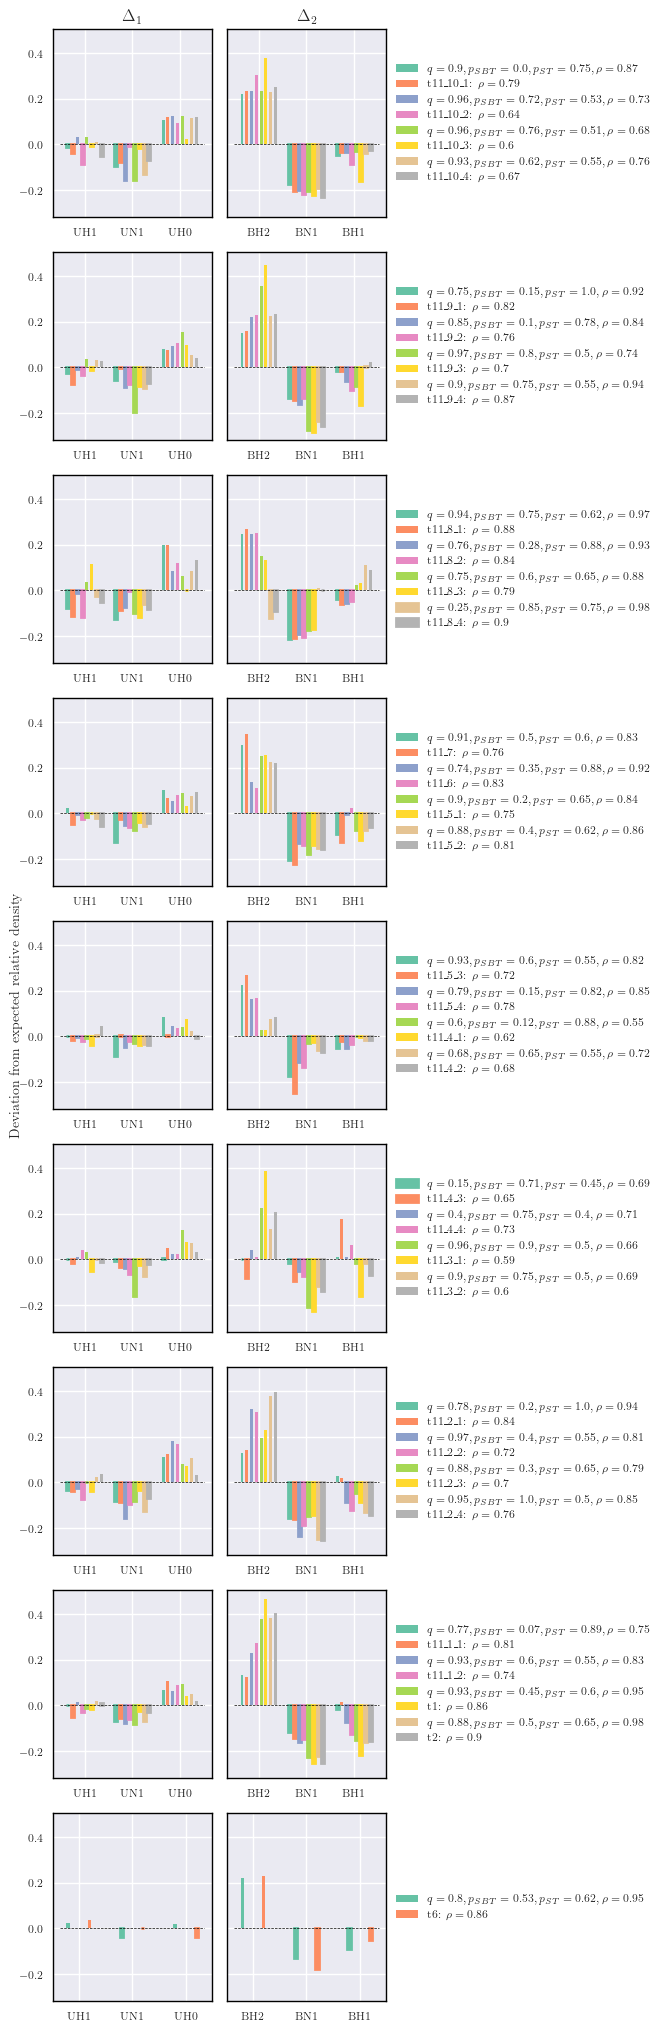

In [78]:

"""Showing results for all schools/classes
"""

save_ = False
fun_prepare_data = prepare_data5
linewidth = 0.5
addon = ""
# orientation = 'h' # 'v' or 'h'
which_ticks = 'zero' #'zero', 'normal'
which_group = 0 #there can be `group_size` bars (8 at max). If data has more, which to show. If `add_real_data == True`, then there should be 7 at max. 
group_size = 7
add_real_data = True
show_error = True
show_rho = True

plot_param_total_width = 0.8
plot_param_single_width = 0.4

if fun_prepare_data == prepare_data5:
    line_level = 0
else:
    line_level = 1/3


# school_groups, _ = create_school_groups(chosen_inds, school_order)
school_groups = [list(range(i*4, i*4+4)) for i in range(0,9) ]
school_groups[-1] = [32,]

# wiki_pos = 0
# slash_pos = 1

width = 345
figsize = set_size(width)
figsize = (figsize[0] * 1.5 , figsize[1]*7)
fig, axes = plt.subplots(9, 2, figsize=figsize, sharey=True)

all_sets = [n1_triads, n2_triads]

# Simulated nets
colors = sns.color_palette("Set2").as_hex()[:20]

triads_order = [n1_triads, n2_triads]
for triad_id, triads_set in enumerate(triads_order):
    for group_id, group in enumerate(school_groups):
        ydatas = []
        yerrs = []
        real_net_datas = None
        additional_label_datas = None
        real_net_additional_label_datas = None
        for school_id in group:
        # for triads_set in n1_triads:
            df_temp = df_bests[school_id].set_index(['q', 'p', 'ps'])
            ydata, yerr = fun_prepare_data(df_temp,  triads_set, 
                                std_data = df_temp, addon = addon)

            # ydata = ydata[ydata.columns[group_size*which_group:group_size*(which_group+1)]]
            if show_error:
                # yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]
                # yerr = yerr.loc[:,~ydata.columns.duplicated()].copy() 
                pass
            else:
                yerr = None
            # ydata = ydata.loc[:,~ydata.columns.duplicated()].copy()
            
            ydatas.append(ydata)
            yerrs.append(yerr)

            if add_real_data:
                real_net_data, _ = fun_prepare_data(real_datasets_all[school_id],  triads_set)
                if real_net_datas is None:
                    real_net_datas = []
                real_net_datas.append(real_net_data)
            # else:
            #     real_net_data = None

            if show_rho:
                rhos = df_temp.rho.values
                # rhos = df2_rho_gs[school_id].iloc[chosen_inds[school_id]].rho.values
                data_rho = real_datasets_all[school_id].rho.values[0]
                
                if additional_label_datas is None:
                    additional_label_datas = []
                additional_label_datas.append(rhos)
                
                if real_net_additional_label_datas is None:
                    real_net_additional_label_datas = []
                real_net_additional_label_datas.append(data_rho)
            # else:
            #     rhos = None
            #     wiki_rho = None

        if group_id == 0:
            title = r'$\Delta_{k}$'.format(k = triad_id + 1)
        else:
            title = None
        plot_bar_nets22(axes[group_id, triad_id], ydatas, yerrs, triads_set, title, 
                    labels_s = None, line_level = line_level, 
                    linewidth = linewidth, colors=colors, 
                    smallest_edge = True, total_width=plot_param_total_width, single_width=plot_param_single_width, legend_elem = 3, 
                    real_net_datas = real_net_datas, additional_label_datas = additional_label_datas, 
                    real_net_additional_label_datas = real_net_additional_label_datas)

# fix tick rotations
for ax in axes.flatten():
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)
# fix tick labels
for ax in axes.flatten():
    ax.set_xticklabels([triad_names_map[tick.get_text()] for tick in ax.get_xticklabels()])
# drop double legend
for i in range(len(school_groups)):
    # axes[i, 1].get_legend().remove()
    # axes[i,1].set_ylabel('')
    # set legend to left top corner
    # if i==1:
    axes[i, 1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axes[i,1].set_ylabel('')
    axes[i,0].set_ylabel('')
    
# ticks = axes[i,0].get_yticklabels()
# ticks = axes[i,0].get_yticks()
# if which_ticks == "normal":
#     ticks2 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]) - 1/3
#     axes[1].set_yticks(ticks2)
#     # axes[i,0].set_yticks(ticks - 0.1)
#     axes[i].set_yticklabels([r'{tick:.1f}'.format(tick=tick+1/3) for tick in ticks2])
# else:
#     axes[1].set_yticks([-0.2, -0.1, 0, 0.1, 0.2])
    
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
# plt.xlabel("common X")
plt.ylabel("Deviation from expected relative density")


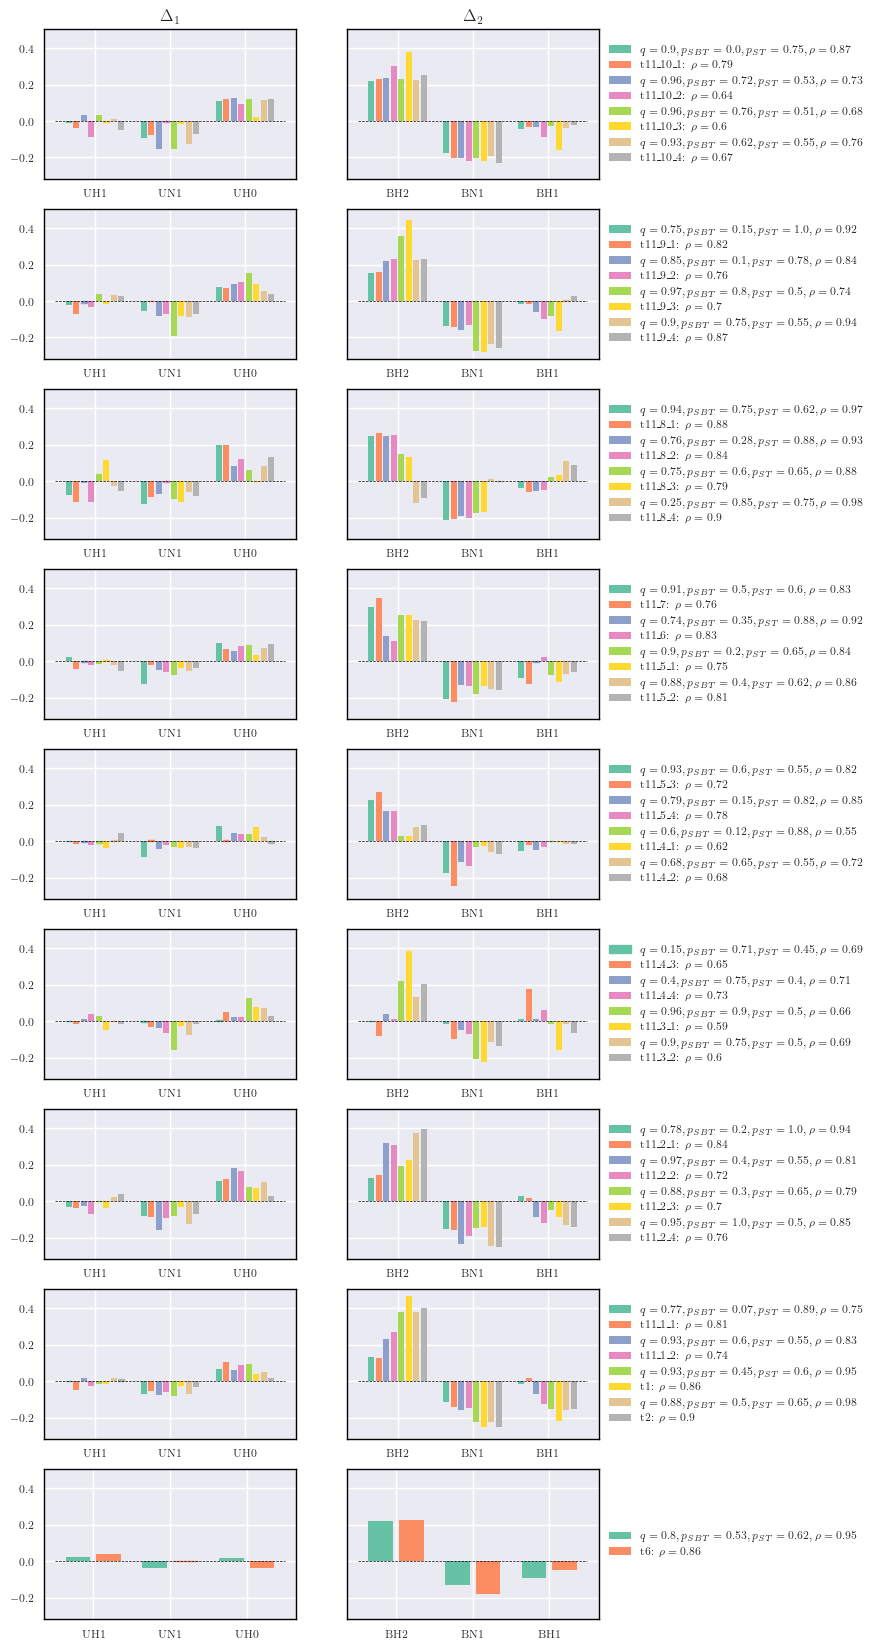

In [98]:

"""Showing results for all schools/classes
"""

save_ = False
fun_prepare_data = prepare_data5
linewidth = 0.5
addon = ""
# orientation = 'h' # 'v' or 'h'
which_ticks = 'zero' #'zero', 'normal'
which_group = 0 #there can be `group_size` bars (8 at max). If data has more, which to show. If `add_real_data == True`, then there should be 7 at max. 
group_size = 7
add_real_data = True
show_error = True
show_rho = True

plot_param_total_width = 0.8
plot_param_single_width = 0.8

if fun_prepare_data == prepare_data5:
    line_level = 0
else:
    line_level = 1/3


# school_groups, _ = create_school_groups(chosen_inds, school_order)
school_groups = [list(range(i*4, i*4+4)) for i in range(0,9) ]
school_groups[-1] = [32,]

# wiki_pos = 0
# slash_pos = 1

width = 345
figsize = set_size(width)
figsize = (figsize[0] * 1.5 , figsize[1]*7)
fig, axes = plt.subplots(9, 2, figsize=figsize, sharey=True)

all_sets = [n1_triads, n2_triads]

# Simulated nets
colors = sns.color_palette("Set2").as_hex()[:20]

triads_order = [n1_triads, n2_triads]
for triad_id, triads_set in enumerate(triads_order):
    for group_id, group in enumerate(school_groups):
        ydatas = []
        yerrs = []
        real_net_datas = None
        additional_label_datas = None
        real_net_additional_label_datas = None
        for school_id in group:
        # for triads_set in n1_triads:
            df_temp = df_bests[school_id].set_index(['q', 'p', 'ps'])
            ydata, yerr = fun_prepare_data(df_temp,  triads_set, 
                                std_data = df_temp, addon = addon)

            # ydata = ydata[ydata.columns[group_size*which_group:group_size*(which_group+1)]]
            if show_error:
                # yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]
                # yerr = yerr.loc[:,~ydata.columns.duplicated()].copy() 
                pass
            else:
                yerr = None
            # ydata = ydata.loc[:,~ydata.columns.duplicated()].copy()
            
            ydatas.append(ydata)
            yerrs.append(yerr)

            if add_real_data:
                real_net_data, _ = fun_prepare_data(real_datasets_all[school_id],  triads_set)
                if real_net_datas is None:
                    real_net_datas = []
                real_net_datas.append(real_net_data)
            # else:
            #     real_net_data = None

            if show_rho:
                rhos = df_temp.rho.values
                # rhos = df2_rho_gs[school_id].iloc[chosen_inds[school_id]].rho.values
                data_rho = real_datasets_all[school_id].rho.values[0]
                
                if additional_label_datas is None:
                    additional_label_datas = []
                additional_label_datas.append(rhos)
                
                if real_net_additional_label_datas is None:
                    real_net_additional_label_datas = []
                real_net_additional_label_datas.append(data_rho)
            # else:
            #     rhos = None
            #     wiki_rho = None

        if group_id == 0:
            title = r'$\Delta_{k}$'.format(k = triad_id + 1)
        else:
            title = None
        plot_bar_nets22(axes[group_id, triad_id], ydatas, yerrs, triads_set, title, 
                    labels_s = None, line_level = line_level, 
                    linewidth = linewidth, colors=colors, 
                    smallest_edge = True, total_width=plot_param_total_width, single_width=plot_param_single_width, legend_elem = 3, 
                    real_net_datas = real_net_datas, additional_label_datas = additional_label_datas, 
                    real_net_additional_label_datas = real_net_additional_label_datas)

# fix tick rotations
for ax in axes.flatten():
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)
# fix tick labels
for ax in axes.flatten():
    ax.set_xticklabels([triad_names_map[tick.get_text()] for tick in ax.get_xticklabels()])
# drop double legend
for i in range(len(school_groups)):
    # axes[i, 1].get_legend().remove()
    # axes[i,1].set_ylabel('')
    # set legend to left top corner
    # if i==1:
    axes[i, 1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axes[i,1].set_ylabel('')
    axes[i,0].set_ylabel('')
    
    
# fig.add_subplot(111, frameon=False)
# # hide tick and tick label of the big axes
# plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
# plt.grid(False)
# # plt.xlabel("common X")
# plt.ylabel("Deviation from expected relative density")

# save_fig_path = Path("figs")
# fname = 'barplots_sim_bestreal_spanish_schoolclass_controldown_summary10_2'
# fname = fname + "_" + which_ticks
# if linewidth is None:
#     fname = fname + "_noline"
# if show_error:
#     fname = fname + "_err"
# if show_rho:
#     fname = fname + "_rho"
# if fun_prepare_data == prepare_data5:
#     fname += "_prep5"

# fig.tight_layout()
# plt.show()
# if save_:
#     fname = fname + ".pdf"
#     fig.savefig(save_fig_path / fname, dpi = 600, format='pdf', bbox_inches='tight') 

In [27]:

"""Showing results for all schools/classes
Separate figures saved
"""

save_ = False
fun_prepare_data = prepare_data5
linewidth = 0.5
addon = ""
# orientation = 'h' # 'v' or 'h'
# which_ticks = 'zero' #'zero', 'normal'
which_group = 0 #there can be `group_size` bars (8 at max). If data has more, which to show. If `add_real_data == True`, then there should be 7 at max. 
group_size = 7
add_real_data = True
show_error = True
show_rho = True



if fun_prepare_data == prepare_data5:
    line_level = 0
else:
    line_level = 1/3


# school_groups, _ = create_school_groups(chosen_inds, school_order)
school_groups = [list(range(i*4, i*4+4)) for i in range(0,9) ]
school_groups[-2] = [28,29,]
school_groups[-1] = [30,31,32,]

# wiki_pos = 0
# slash_pos = 1


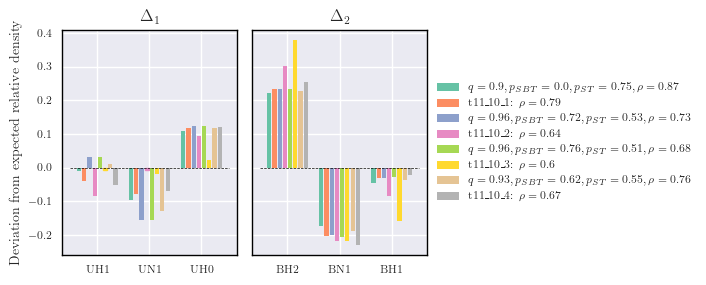

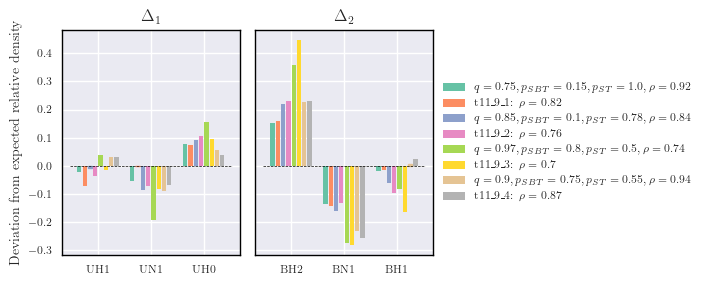

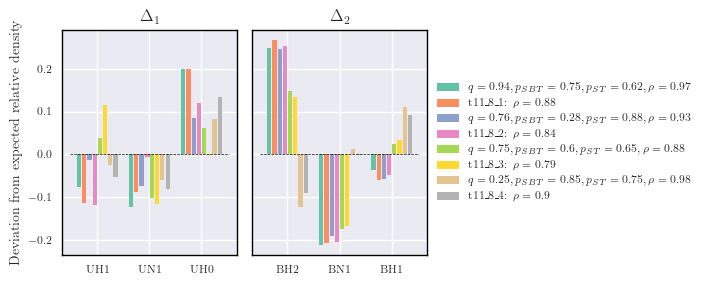

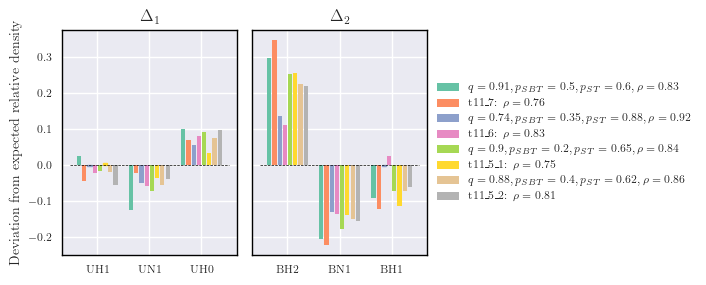

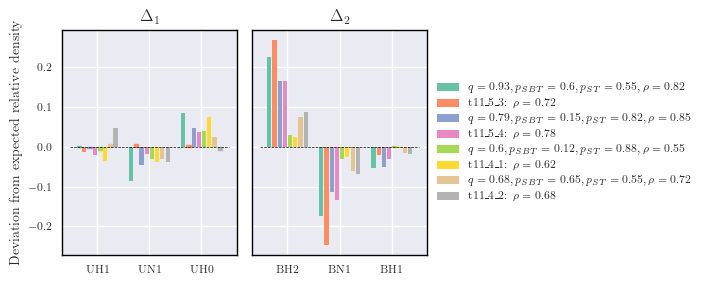

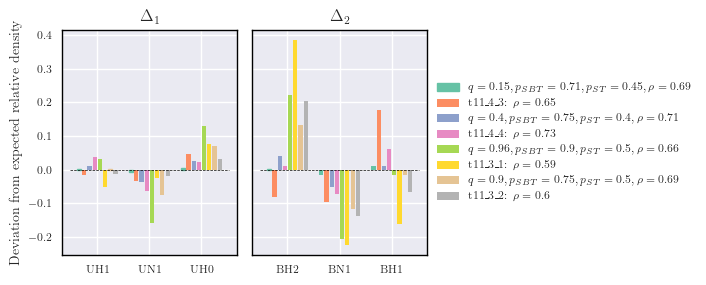

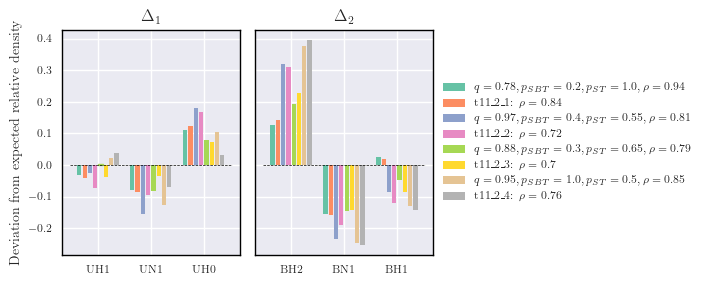

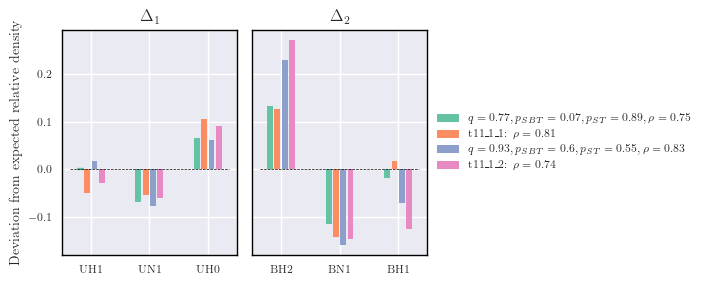

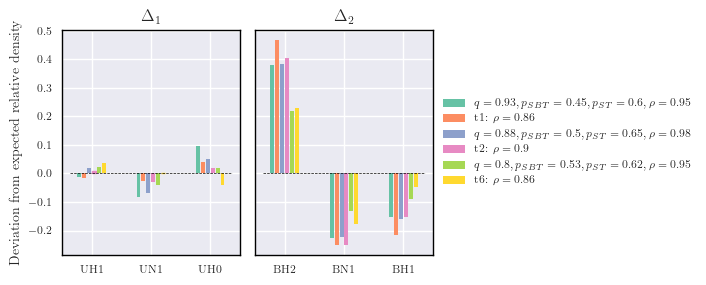

In [35]:
save_ = True

all_sets = [n1_triads, n2_triads]

# Simulated nets
colors = sns.color_palette("Set2").as_hex()[:20]

triads_order = [n1_triads, n2_triads]

for group_id, group in enumerate(school_groups):
    width = 345
    figsize = set_size(width)
    figsize = (figsize[0] * 1.5 , figsize[1])
    fig, axes = plt.subplots(1, 2, figsize=figsize, sharey=True)
    
    if len(group) == 4:
        plot_param_total_width = 0.8
        plot_param_single_width = 0.8
    else:
        plot_param_total_width = 0.5
        plot_param_single_width = 0.8
    
    for triad_id, triads_set in enumerate(triads_order):
        ydatas = []
        yerrs = []
        real_net_datas = None
        additional_label_datas = None
        real_net_additional_label_datas = None
        for school_id in group:
        
        # for triads_set in n1_triads:
            df_temp = df_bests[school_id].set_index(['q', 'p', 'ps'])
            ydata, yerr = fun_prepare_data(df_temp,  triads_set, 
                                std_data = df_temp, addon = addon)

            # ydata = ydata[ydata.columns[group_size*which_group:group_size*(which_group+1)]]
            if show_error:
                # yerr = yerr[yerr.columns[group_size*which_group:group_size*(which_group+1)]]
                # yerr = yerr.loc[:,~ydata.columns.duplicated()].copy() 
                pass
            else:
                yerr = None
            # ydata = ydata.loc[:,~ydata.columns.duplicated()].copy()
            
            ydatas.append(ydata)
            yerrs.append(yerr)

            if add_real_data:
                real_net_data, _ = fun_prepare_data(real_datasets_all[school_id],  triads_set)
                if real_net_datas is None:
                    real_net_datas = []
                real_net_datas.append(real_net_data)
            # else:
            #     real_net_data = None

            if show_rho:
                rhos = df_temp.rho.values
                # rhos = df2_rho_gs[school_id].iloc[chosen_inds[school_id]].rho.values
                data_rho = real_datasets_all[school_id].rho.values[0]
                
                if additional_label_datas is None:
                    additional_label_datas = []
                additional_label_datas.append(rhos)
                
                if real_net_additional_label_datas is None:
                    real_net_additional_label_datas = []
                real_net_additional_label_datas.append(data_rho)
            # else:
            #     rhos = None
            #     wiki_rho = None

        # if group_id == 0:
        title = r'$\Delta_{k}$'.format(k = triad_id + 1)
        # else:
        #     title = None
        plot_bar_nets22(axes[triad_id], ydatas, yerrs, triads_set, title, 
                    labels_s = None, line_level = line_level, 
                    linewidth = linewidth, colors=colors, 
                    smallest_edge = True, total_width=plot_param_total_width, single_width=plot_param_single_width, legend_elem = 3, 
                    real_net_datas = real_net_datas, additional_label_datas = additional_label_datas, 
                    real_net_additional_label_datas = real_net_additional_label_datas)

    # fix tick rotations
    for ax in axes.flatten():
        for tick in ax.get_xticklabels():
            tick.set_rotation(0)
    # fix tick labels
    for ax in axes.flatten():
        ax.set_xticklabels([triad_names_map[tick.get_text()] for tick in ax.get_xticklabels()])
    # drop double legend
    # for i in range(len(school_groups)):
        # axes[i, 1].get_legend().remove()
        # axes[i,1].set_ylabel('')
        # set legend to left top corner
        # if i==1:
    axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axes[1].set_ylabel('')
    axes[0].set_ylabel('Deviation from expected relative density')
    

    save_fig_path = Path("figs")
    fname = 'barplots_sim_bestreal_spanish_schoolclass_controldown_summary10_2'
    fname = fname + "_" + str(group_id)
    if linewidth is None:
        fname = fname + "_noline"
    if show_error:
        fname = fname + "_err"
    if show_rho:
        fname = fname + "_rho"
    if fun_prepare_data == prepare_data5:
        fname += "_prep5"

    fig.tight_layout()
    plt.show()
    if save_:
        fname = fname + ".pdf"
        fig.savefig(save_fig_path / fname, dpi = 600, format='pdf', bbox_inches='tight') 

In [31]:
len(ydatas)

6